#oi

In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

In [ ]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

# import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")
pd.set_option('display.max_colwidth', 80)
import matplotlib.patheffects as path_effects
# import nltk
# import numpy as np
import seaborn as sns
import gensim
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Jaguar

## Pos

In [ ]:
df_jaguar_pos = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/jaguar_pos.csv')

In [ ]:
df_jaguar_pos

Unnamed: 0                  Review_Date        Author_Name  \
0             0   on 05/07/15 14:32 PM (PDT)           rick161    
1             2   on 06/07/11 19:03 PM (PDT)         tomeyeman    
2             3   on 05/05/11 12:27 PM (PDT)        remsenburg    
3             4   on 04/15/10 08:49 AM (PDT)            Sutzme    
4             8   on 08/13/07 12:27 PM (PDT)           greyfox    
..          ...                          ...                ...   
770        1876   on 01/11/18 09:07 AM (PST)      James Reeves    
771        1878   on 06/01/17 12:14 PM (PDT)         Hollywood    
772        1879   on 09/20/16 07:49 AM (PDT)        Mic Jaguar    
773        1882   on 08/10/18 19:39 PM (PDT)     Lance Bowling    
774        1884   on 07/09/18 18:29 PM (PDT)  MinnesotaNiceMom    

                                                                  Vehicle_Title  \
0                                     1999 Jaguar XK-Series Coupe XK8 2dr Coupe   
1                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
2                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
3                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
4                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
..                                                                          ...   
770               2016 Jaguar XF Sedan 35t Premium 4dr Sedan (3.0L 6cyl S/C 8A)   
771              2016 Jaguar XF Sedan 35t Prestige 4dr Sedan (3.0L 6cyl S/C 8A)   
772          2016 Jaguar XF Sedan 35t Prestige 4dr Sedan AWD (3.0L 6cyl S/C 8A)   
773  2018 Jaguar E-PACE SUV P300 R-Dynamic HSE 4dr SUV AWD (2.0L 4cyl Turbo 9A)   
774             2018 Jaguar E-PACE SUV P250 SE 4dr SUV AWD (2.0L 4cyl Turbo 9A)   

                                          Review_Title  \
0          Champagne motoring for fish 'n chips money.   
1                                            So-So car   
2          Great value, but requires some patience....   
3                                  Worth the headaches   
4                                              Reality   
..                                                 ...   
770                                 Great Little Kitty   
771  Falls short on the details that make a difference   
772                     Love my new XF - 2016 Redesign   
773     Best Compact SUV by a mile; simply outstanding   
774                                  Love this Jaguar!   

                                                                              Review  \
0     My '99 XK8 convertible is my dream car, after 40 years of Jags, BMWs, Merce...   
1     I traded a 98 Porsche Boxster for a 99 Jaguar XK8 a few years ago.son I did...   
2     As someone who has owned two other Jaguars, an XJ6 and an XJ8, that were pu...   
3     Bought this gem used with 21K miles on it. Good thing I had an extended war...   
4     Great looking but no real substance.  At 65000 miles, I have repaired timin...   
..                                                                               ...   
770   The room in the back seat is tight. If you are consistently transporting pe...   
771   Computer is very slow to load navigation and audio. Auto Start/Stop feature...   
772   So...I've owned pretty much every German brand, a few Japanese cars and two...   
773   Pros: Best looking, best handling in class and fun to drive. Stunning looks...   
774   Very sharp looking - I get compliments all of the time on my car. (My Husba...   

     Rating  \
0     5.000   
1     2.750   
2     4.000   
3     4.625   
4     3.375   
..      ...   
770   5.000   
771   3.000   
772   5.000   
773   4.000   
774   5.000   

                                                                         Full Review  \
0    Champagne motoring for fish 'n chips money. My '99 XK8 convertible is my dre...   
1    So-So car I traded a 98 Porsche Boxster for a 99 Jaguar XK8 a few years ago....   
2   

In [ ]:
df_jaguar_pos.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_jaguar_pos

Unnamed: 0  \
0             0   
1             2   
2             3   
3             4   
4             8   
..          ...   
770        1876   
771        1878   
772        1879   
773        1882   
774        1884   

                                                                  Vehicle_Title  \
0                                     1999 Jaguar XK-Series Coupe XK8 2dr Coupe   
1                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
2                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
3                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
4                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
..                                                                          ...   
770               2016 Jaguar XF Sedan 35t Premium 4dr Sedan (3.0L 6cyl S/C 8A)   
771              2016 Jaguar XF Sedan 35t Prestige 4dr Sedan (3.0L 6cyl S/C 8A)   
772          2016 Jaguar XF Sedan 35t Prestige 4dr Sedan AWD (3.0L 6cyl S/C 8A)   
773  2018 Jaguar E-PACE SUV P300 R-Dynamic HSE 4dr SUV AWD (2.0L 4cyl Turbo 9A)   
774             2018 Jaguar E-PACE SUV P250 SE 4dr SUV AWD (2.0L 4cyl Turbo 9A)   

     Rating  \
0     5.000   
1     2.750   
2     4.000   
3     4.625   
4     3.375   
..      ...   
770   5.000   
771   3.000   
772   5.000   
773   4.000   
774   5.000   

                                                                         Full Review  \
0    Champagne motoring for fish 'n chips money. My '99 XK8 convertible is my dre...   
1    So-So car I traded a 98 Porsche Boxster for a 99 Jaguar XK8 a few years ago....   
2    Great value, but requires some patience.... As someone who has owned two oth...   
3    Worth the headaches Bought this gem used with 21K miles on it. Good thing I ...   
4    Reality Great looking but no real substance.  At 65000 miles, I have repaire...   
..                                                                               ...   
770  Great Little Kitty The room in the back seat is tight. If you are consistent...   
771  Falls short on the details that make a difference Computer is very slow to l...   
772  Love my new XF - 2016 Redesign So...I've owned pretty much every German bran...   
773  Best Compact SUV by a mile; simply outstanding Pros: Best looking, best hand...   
774  Love this Jaguar! Very sharp looking - I get compliments all of the time on ...   

    sentiment  
0         pos  
1         pos  
2         pos  
3         pos  
4         pos  
..        ...  
770       pos  
771       pos  
772       pos  
773       pos  
774       pos  

[775 rows x 5 columns]

In [ ]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}


In [ ]:
#preprocess
import re
def text_preprocessing(text):

    # Convert words to lower case
    text = text.lower()

    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    return text

In [ ]:
def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

# Create a list of review by applying text_preprocessing function
df_jaguar_pos['Review_Clean_List'] = list(map(text_preprocessing, df_jaguar_pos['Full Review']))

# Return to string with to_string function
df_jaguar_pos['Review_Clean'] = list(map(to_string, df_jaguar_pos['Review_Clean_List']))

In [ ]:
df_jaguar_pos

Unnamed: 0  \
0             0   
1             2   
2             3   
3             4   
4             8   
..          ...   
770        1876   
771        1878   
772        1879   
773        1882   
774        1884   

                                                                  Vehicle_Title  \
0                                     1999 Jaguar XK-Series Coupe XK8 2dr Coupe   
1                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
2                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
3                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
4                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
..                                                                          ...   
770               2016 Jaguar XF Sedan 35t Premium 4dr Sedan (3.0L 6cyl S/C 8A)   
771              2016 Jaguar XF Sedan 35t Prestige 4dr Sedan (3.0L 6cyl S/C 8A)   
772          2016 Jaguar XF Sedan 35t Prestige 4dr Sedan AWD (3.0L 6cyl S/C 8A)   
773  2018 Jaguar E-PACE SUV P300 R-Dynamic HSE 4dr SUV AWD (2.0L 4cyl Turbo 9A)   
774             2018 Jaguar E-PACE SUV P250 SE 4dr SUV AWD (2.0L 4cyl Turbo 9A)   

     Rating  \
0     5.000   
1     2.750   
2     4.000   
3     4.625   
4     3.375   
..      ...   
770   5.000   
771   3.000   
772   5.000   
773   4.000   
774   5.000   

                                                                         Full Review  \
0    Champagne motoring for fish 'n chips money. My '99 XK8 convertible is my dre...   
1    So-So car I traded a 98 Porsche Boxster for a 99 Jaguar XK8 a few years ago....   
2    Great value, but requires some patience.... As someone who has owned two oth...   
3    Worth the headaches Bought this gem used with 21K miles on it. Good thing I ...   
4    Reality Great looking but no real substance.  At 65000 miles, I have repaire...   
..                                                                               ...   
770  Great Little Kitty The room in the back seat is tight. If you are consistent...   
771  Falls short on the details that make a difference Computer is very slow to l...   
772  Love my new XF - 2016 Redesign So...I've owned pretty much every German bran...   
773  Best Compact SUV by a mile; simply outstanding Pros: Best looking, best hand...   
774  Love this Jaguar! Very sharp looking - I get compliments all of the time on ...   

    sentiment  \
0         pos   
1         pos   
2         pos   
3         pos   
4         pos   
..        ...   
770       pos   
771       pos   
772       pos   
773       pos   
774       pos   

                                                                   Review_Clean_List  \
0    [champagne, motor, for, fish, chip, money, my, 99, xk8, convertible, be, my,...   
1    [so, so, car, trade, 98, porsche, boxster, for, 99, jaguar, xk8, few, years,...   
2    [great, value, but, require, some, patience, as, someone, who, have, own, tw...   
3    [worth, the, headaches, buy, this, gem, use, with, 21k, miles, on, it, good,...   
4    [reality, great, look, but, no, real, substance, at, 65000, miles, have, rep...   
..                                                                               ...   
770  [great, little, kitty, the, room, in, the, back, seat, be, tight, if, you, b...   
771  [fall, short, on, the, detail, that, make, difference, computer, be, very, s...   
772  [love, my, new, xf, 2016, redesign, so, ve, own, pretty, much, every, german...   
773  [best, compact, suv, by, mile, simply, outstanding, pros, best, look, best, ...   
774  [love, this, jaguar, very, sharp, look, get, compliment, all, of, the, time,...   

                                                                        Review_Clean  
0    champagne motor for fish chip money my 99 xk8 convertible be my dream car af...  
1    so so car trade 98 porsche boxster for 99 jaguar xk8 few years ago son do it...  
2    great value b

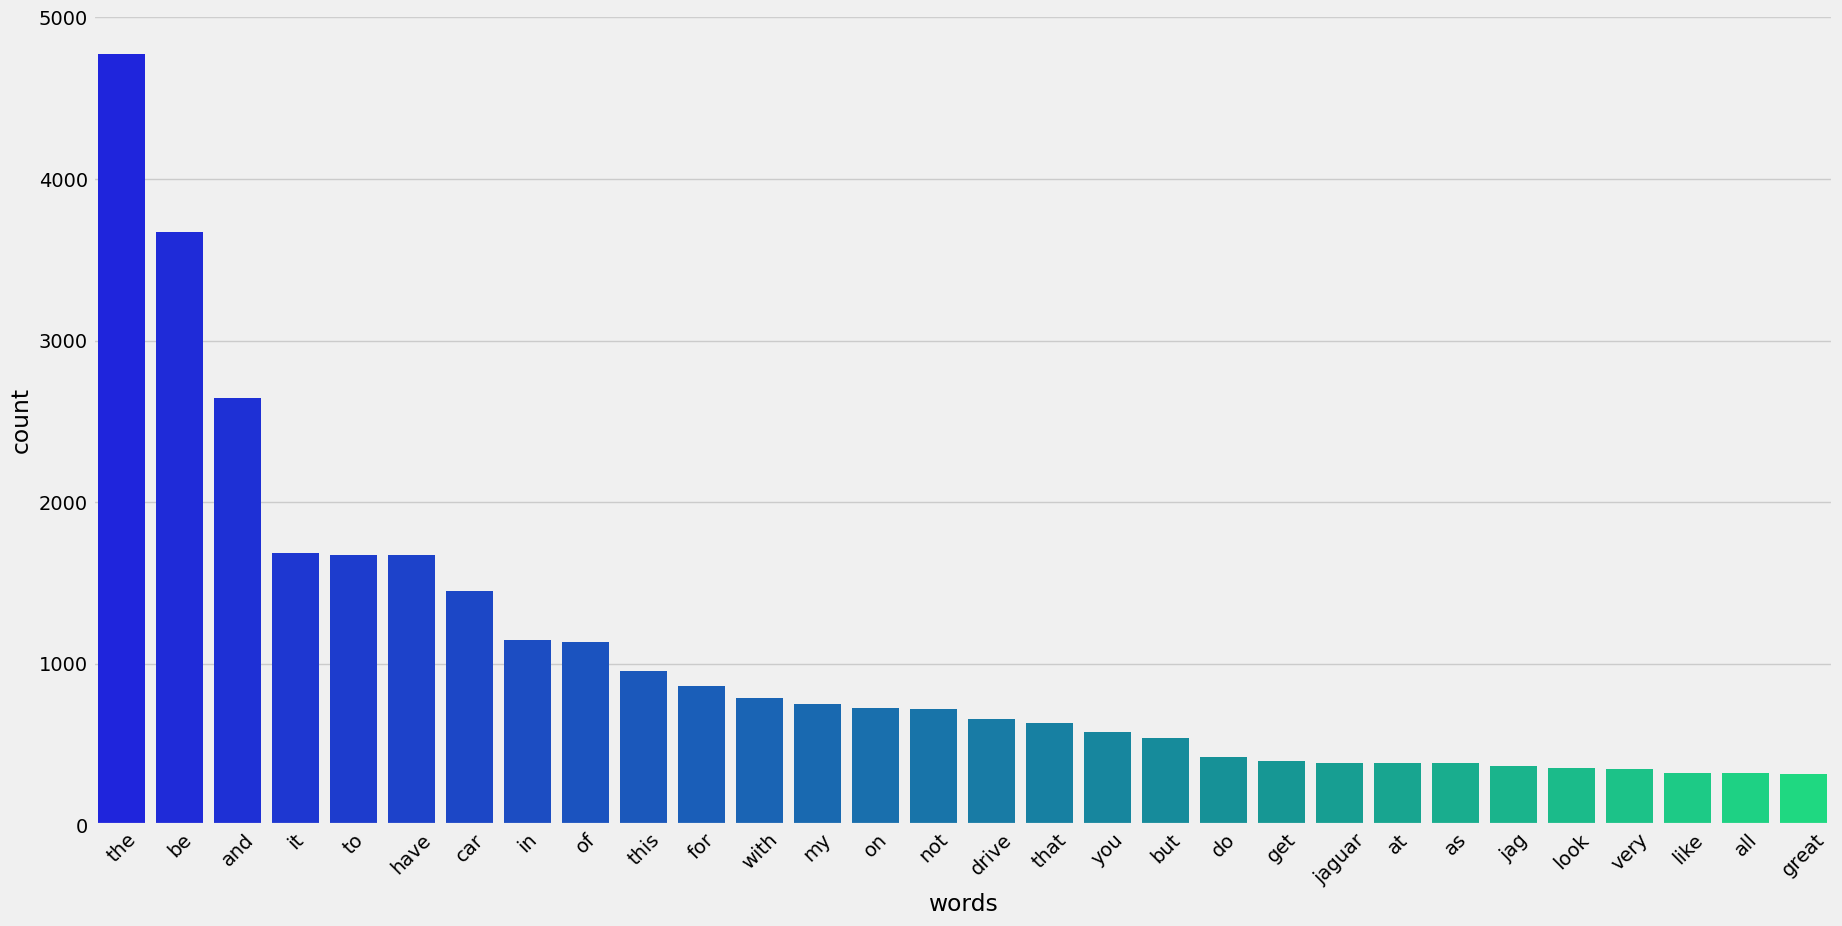

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words = ','.join(list(df_jaguar_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'get'),
  Text(3, 0, 'jaguar'),
  Text(4, 0, 'jag'),
  Text(5, 0, 'look'),
  Text(6, 0, 'like'),
  Text(7, 0, 'great'),
  Text(8, 0, 'buy'),
  Text(9, 0, 'love'),
  Text(10, 0, 'one'),
  Text(11, 0, 'type'),
  Text(12, 0, 'miles'),
  Text(13, 0, 'go'),
  Text(14, 0, 'handle'),
  Text(15, 0, 'seat'),
  Text(16, 0, 'make'),
  Text(17, 0, 'new'),
  Text(18, 0, 'would'),
  Text(19, 0, 'bmw'),
  Text(20, 0, 'time'),
  Text(21, 0, 'years'),
  Text(22, 0, 'back'),
  Text(23, 0, 'interior'),
  Text(24, 0, 'use'),
  Text(25, 0, 'better'),
  Text(26, 0, 'cars'),
  Text(27, 0, 'performance'),
  Text(28, 0, 'ride'),
  Text(29, 0, 'well')])

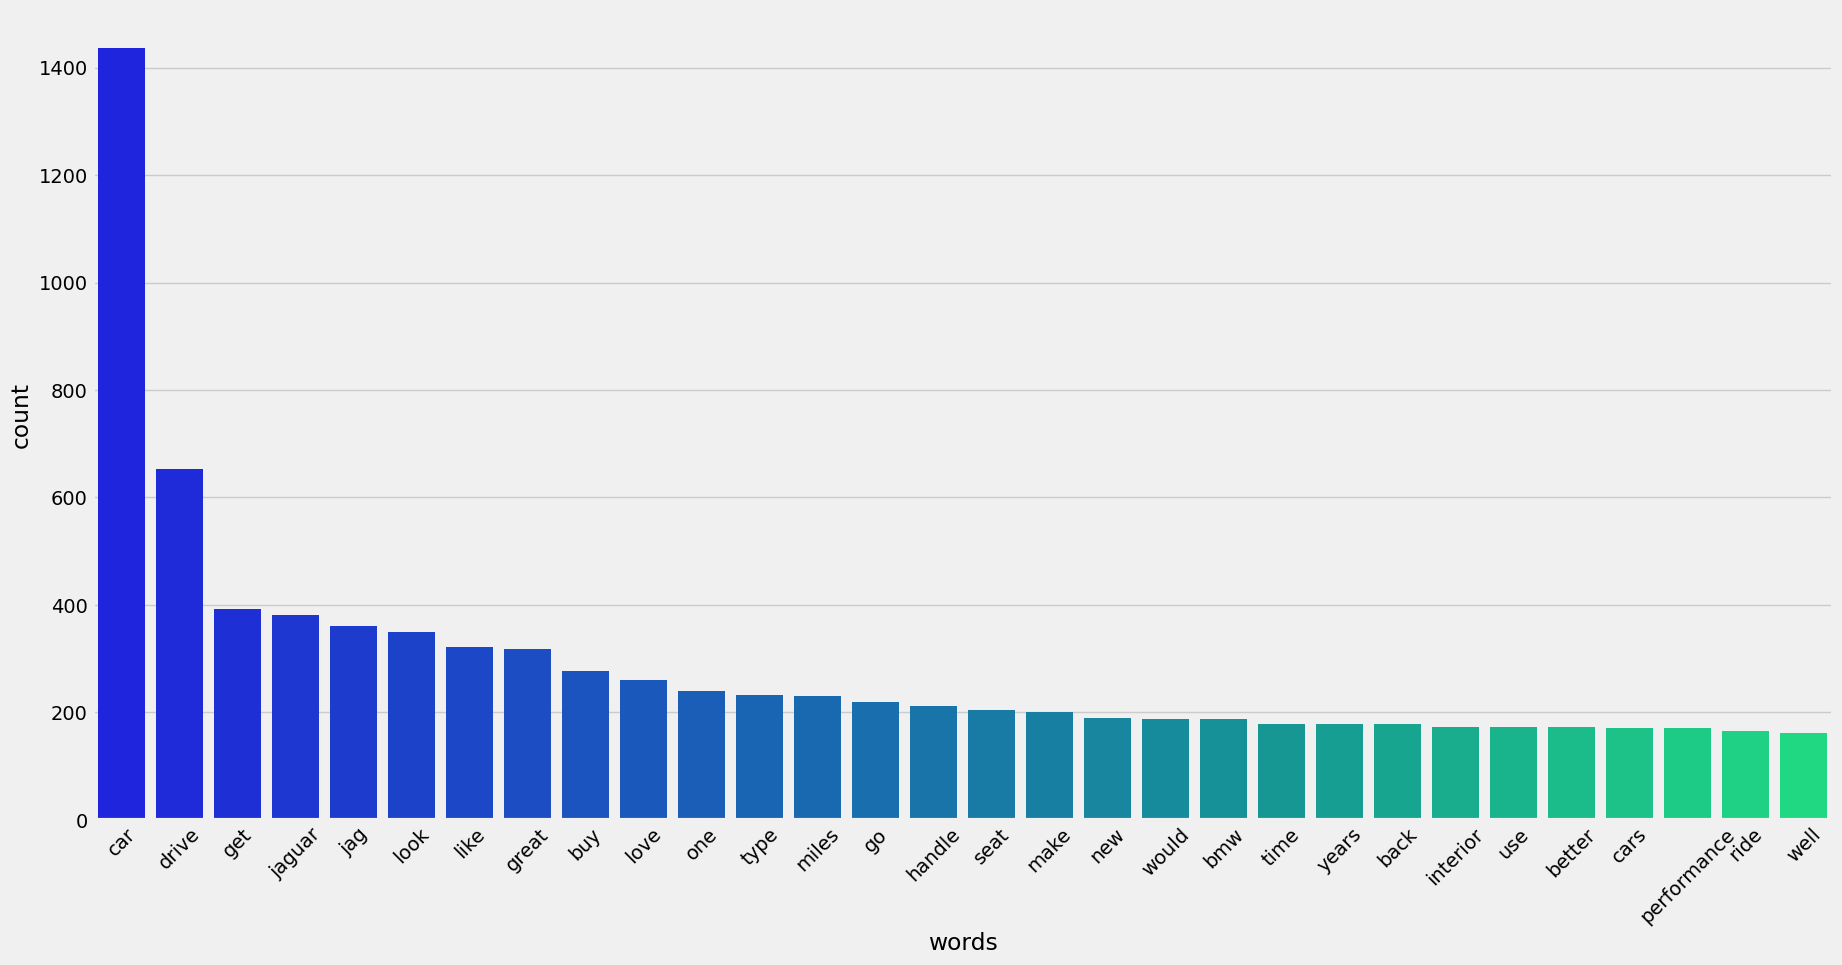

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_jaguar_pos['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_jaguar_pos['Review_Clean_List']]
df_jaguar_pos['Review_Clean'] = list(map(to_string, df_jaguar_pos['Review_Clean_List']))

# Join all word corpus
review_words = ','.join(list(df_jaguar_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_jaguar_pos

Unnamed: 0  \
0             0   
1             2   
2             3   
3             4   
4             8   
..          ...   
770        1876   
771        1878   
772        1879   
773        1882   
774        1884   

                                                                  Vehicle_Title  \
0                                     1999 Jaguar XK-Series Coupe XK8 2dr Coupe   
1                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
2                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
3                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
4                         1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
..                                                                          ...   
770               2016 Jaguar XF Sedan 35t Premium 4dr Sedan (3.0L 6cyl S/C 8A)   
771              2016 Jaguar XF Sedan 35t Prestige 4dr Sedan (3.0L 6cyl S/C 8A)   
772          2016 Jaguar XF Sedan 35t Prestige 4dr Sedan AWD (3.0L 6cyl S/C 8A)   
773  2018 Jaguar E-PACE SUV P300 R-Dynamic HSE 4dr SUV AWD (2.0L 4cyl Turbo 9A)   
774             2018 Jaguar E-PACE SUV P250 SE 4dr SUV AWD (2.0L 4cyl Turbo 9A)   

     Rating  \
0     5.000   
1     2.750   
2     4.000   
3     4.625   
4     3.375   
..      ...   
770   5.000   
771   3.000   
772   5.000   
773   4.000   
774   5.000   

                                                                         Full Review  \
0    Champagne motoring for fish 'n chips money. My '99 XK8 convertible is my dre...   
1    So-So car I traded a 98 Porsche Boxster for a 99 Jaguar XK8 a few years ago....   
2    Great value, but requires some patience.... As someone who has owned two oth...   
3    Worth the headaches Bought this gem used with 21K miles on it. Good thing I ...   
4    Reality Great looking but no real substance.  At 65000 miles, I have repaire...   
..                                                                               ...   
770  Great Little Kitty The room in the back seat is tight. If you are consistent...   
771  Falls short on the details that make a difference Computer is very slow to l...   
772  Love my new XF - 2016 Redesign So...I've owned pretty much every German bran...   
773  Best Compact SUV by a mile; simply outstanding Pros: Best looking, best hand...   
774  Love this Jaguar! Very sharp looking - I get compliments all of the time on ...   

    sentiment  \
0         pos   
1         pos   
2         pos   
3         pos   
4         pos   
..        ...   
770       pos   
771       pos   
772       pos   
773       pos   
774       pos   

                                                                   Review_Clean_List  \
0    [champagne, motor, fish, chip, money, 99, xk8, convertible, dream, car, 40, ...   
1    [car, trade, 98, porsche, boxster, 99, jaguar, xk8, years, ago, son, back, s...   
2    [great, value, require, patience, someone, two, jaguars, xj6, xj8, purchase,...   
3    [worth, headaches, buy, gem, use, 21k, miles, good, thing, extend, warranty,...   
4    [reality, great, look, real, substance, 65000, miles, repair, time, chain, g...   
..                                                                               ...   
770  [great, little, kitty, room, back, seat, tight, consistently, transport, peo...   
771  [fall, short, detail, make, difference, computer, slow, load, navigation, au...   
772  [love, new, xf, 2016, redesign, pretty, much, every, german, brand, japanese...   
773  [best, compact, suv, mile, simply, outstanding, pros, best, look, best, hand...   
774  [love, jaguar, sharp, look, get, compliment, time, car, husband, bmw, x5, ev...   

                                                                        Review_Clean  
0    champagne motor fish chip money 99 xk8 convertible dream car 40 years jag bm...  
1    car trade 98 porsche boxster 99 jaguar xk8 years ago son back seat kid ride ...  
2    great value r

In [ ]:
#transformer - for vectorization
#umap dim reduction
#hdbscan clustering
#c-tfidf - topic representation

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_jaguar_pos = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_jaguar_pos.fit_transform(df_jaguar_pos['Review_Clean'])

In [ ]:
topic_model_jaguar_pos.get_topic_info()

Topic  Count                        Name
0      -1    356      -1_car_drive_jag_great
1       0     63      0_jaguar_car_buy_miles
2       1     62      1_jaguar_car_look_like
3       2     52       2_miles_car_000_drive
4       3     33        3_cat_car_love_still
5       4     31       4_xj_xj8_style_jaguar
6       5     31        5_jag_love_car_drive
7       6     30      6_car_drive_jaguar_get
8       7     30        7_xkr_car_look_drive
9       8     27   8_time_light_problems_car
10      9     22  9_car_great_beautiful_best
11     10     20     10_car_system_like_seat
12     11     18       11_jag_drive_car_type

In [ ]:
topic_model_jaguar_pos.get_topic(7)

[('xkr', 0.05189438790114742),
 ('car', 0.041047966380679),
 ('look', 0.03914345103899798),
 ('drive', 0.036754450802645944),
 ('xk8', 0.030730399210850887),
 ('fun', 0.028273948959665916),
 ('coupe', 0.024459408705260206),
 ('go', 0.02403029564266347),
 ('better', 0.023998303309454593),
 ('get', 0.02365418100769481)]

In [ ]:
# Visualize top topic keywords
topic_model_jaguar_pos.visualize_barchart(top_n_topics=12)

In [ ]:
topic_model_jaguar_pos.visualize_topics()

In [ ]:
topic_model_jaguar_pos.visualize_hierarchy()

In [ ]:
topic_model_jaguar_pos.visualize_heatmap()

# Suzuki

## Pos

In [ ]:
#suzuki

In [ ]:
df_suzuki_pos = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/suzuki_pos.csv')

In [ ]:
df_suzuki_pos

Review_Date    Author_Name  \
0      on 09/02/09 14:37 PM (PDT)            rc    
1      on 03/29/08 22:22 PM (PDT)        vickid    
2      on 08/07/16 07:16 AM (PDT)        Shauna    
3      on 12/03/15 20:01 PM (PST)      Sansaloo    
4      on 05/16/12 16:36 PM (PDT)         dora5    
...                           ...            ...   
1312   on 02/27/10 17:10 PM (PST)  J D Reichert    
1313   on 01/24/10 09:34 AM (PST)         Tanya    
1314   on 01/17/10 15:27 PM (PST)          Pete    
1315   on 01/02/10 11:39 AM (PST)   formerreda3    
1316   on 12/15/09 18:52 PM (PST)       kccarco    

                                                            Vehicle_Title  \
0                 2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
1                 2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
2                 2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 5M)   
3     2006 Suzuki Reno Hatchback Convenience 4dr Hatchback (2.0L 4cyl 4A)   
4     2006 Suzuki Reno Hatchback Convenience 4dr Hatchback (2.0L 4cyl 4A)   
...                                                                   ...   
1312          2010 Suzuki Kizashi Sedan SLS 4dr Sedan AWD (2.4L 4cyl CVT)   
1313          2010 Suzuki Kizashi Sedan SLS 4dr Sedan AWD (2.4L 4cyl CVT)   
1314              2010 Suzuki Kizashi Sedan SLS 4dr Sedan (2.4L 4cyl CVT)   
1315               2010 Suzuki Kizashi Sedan GTS 4dr Sedan (2.4L 4cyl 6M)   
1316               2010 Suzuki Kizashi Sedan GTS 4dr Sedan (2.4L 4cyl 6M)   

                        Review_Title  \
0                      fun small car   
1                    Cool little car   
2                   2006 Suzuki Reno   
3           Worst mistake of my life   
4                   2006 Suzuki Reno   
...                              ...   
1312               First hand report   
1313                 Love My Kizashi   
1314      My New  CVT/SLS Kizashi !!   
1315  First three weeks of ownership   
1316         Great car for the money   

                                                                               Review  \
0      We bought this car with a sonata in mind but the price point was to much to...   
1      Good car for the price with a good warranty. Comfortable, good looking. Lot...   
2      I got an '06 Reno in October of '15. It had 51k miles. I was surprised to f...   
3      Bought this car and an emergency car in January 2014 after I totaled my las...   
4      I purchased my car in 2011 at 48,000 miles, and the biggest problem is that...   
...                                                                               ...   
1312   February 27, 2010 and I purchased a Suzuki Kizashi SLS on February 20 with ...   
1313   I learned about the Kizashi months ago from a friend.  I had a '08 SX4 Cros...   
1314   So Far So VERY Good...Performance & Speed sneeks up on you. 80MPH arrives w...   
1315   Having previously owned two VW Corrados, a VW Passat and an Audi A3 (among ...   
1316   Just took delivery of a GTS FWD 6- speed.  Cant believe its a Suzuki.  What...   

      Rating  \
0      4.625   
1      4.375   
2      3.000   
3      2.000   
4      4.125   
...      ...   
1312   4.875   
1313   4.875   
1314   4.875   
1315   4.375   
1316   4.875   

                                                                          Full Review  \
0     fun small car We bought this car with a sonata in mind but the price point w...   
1     Cool little car Good car for the price with a good warranty. Comfortable, go...   
2     2006 Suzuki Reno I got an '06 Reno in October of '15. It had 51k miles. I wa...   
3     Worst mistake of my life Bought this car and an emergency car in January 201...   
4     2006 Suzuki Reno I purchased my car in 2011 at 48,000 miles, and the biggest...   
...                                                                               ...   
1312  First hand report February 27, 2010 and I purchased a Suzuki Kizashi SLS on ...   
1313  Love My Kiz

In [ ]:
df_suzuki_pos.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_suzuki_pos

Vehicle_Title  \
0                 2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
1                 2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
2                 2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 5M)   
3     2006 Suzuki Reno Hatchback Convenience 4dr Hatchback (2.0L 4cyl 4A)   
4     2006 Suzuki Reno Hatchback Convenience 4dr Hatchback (2.0L 4cyl 4A)   
...                                                                   ...   
1312          2010 Suzuki Kizashi Sedan SLS 4dr Sedan AWD (2.4L 4cyl CVT)   
1313          2010 Suzuki Kizashi Sedan SLS 4dr Sedan AWD (2.4L 4cyl CVT)   
1314              2010 Suzuki Kizashi Sedan SLS 4dr Sedan (2.4L 4cyl CVT)   
1315               2010 Suzuki Kizashi Sedan GTS 4dr Sedan (2.4L 4cyl 6M)   
1316               2010 Suzuki Kizashi Sedan GTS 4dr Sedan (2.4L 4cyl 6M)   

      Rating  \
0      4.625   
1      4.375   
2      3.000   
3      2.000   
4      4.125   
...      ...   
1312   4.875   
1313   4.875   
1314   4.875   
1315   4.375   
1316   4.875   

                                                                          Full Review  \
0     fun small car We bought this car with a sonata in mind but the price point w...   
1     Cool little car Good car for the price with a good warranty. Comfortable, go...   
2     2006 Suzuki Reno I got an '06 Reno in October of '15. It had 51k miles. I wa...   
3     Worst mistake of my life Bought this car and an emergency car in January 201...   
4     2006 Suzuki Reno I purchased my car in 2011 at 48,000 miles, and the biggest...   
...                                                                               ...   
1312  First hand report February 27, 2010 and I purchased a Suzuki Kizashi SLS on ...   
1313  Love My Kizashi I learned about the Kizashi months ago from a friend.  I had...   
1314  My New  CVT/SLS Kizashi !! So Far So VERY Good...Performance & Speed sneeks ...   
1315  First three weeks of ownership Having previously owned two VW Corrados, a VW...   
1316  Great car for the money Just took delivery of a GTS FWD 6- speed.  Cant beli...   

     sentiment  
0          pos  
1          pos  
2          pos  
3          pos  
4          pos  
...        ...  
1312       pos  
1313       pos  
1314       pos  
1315       pos  
1316       pos  

[1317 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_suzuki_pos['Review_Clean_List'] = list(map(text_preprocessing, df_suzuki_pos['Full Review']))

# Return to string with to_string function
df_suzuki_pos['Review_Clean'] = list(map(to_string, df_suzuki_pos['Review_Clean_List']))

In [ ]:
df_suzuki_pos

Vehicle_Title  \
0                 2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
1                 2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
2                 2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 5M)   
3     2006 Suzuki Reno Hatchback Convenience 4dr Hatchback (2.0L 4cyl 4A)   
4     2006 Suzuki Reno Hatchback Convenience 4dr Hatchback (2.0L 4cyl 4A)   
...                                                                   ...   
1312          2010 Suzuki Kizashi Sedan SLS 4dr Sedan AWD (2.4L 4cyl CVT)   
1313          2010 Suzuki Kizashi Sedan SLS 4dr Sedan AWD (2.4L 4cyl CVT)   
1314              2010 Suzuki Kizashi Sedan SLS 4dr Sedan (2.4L 4cyl CVT)   
1315               2010 Suzuki Kizashi Sedan GTS 4dr Sedan (2.4L 4cyl 6M)   
1316               2010 Suzuki Kizashi Sedan GTS 4dr Sedan (2.4L 4cyl 6M)   

      Rating  \
0      4.625   
1      4.375   
2      3.000   
3      2.000   
4      4.125   
...      ...   
1312   4.875   
1313   4.875   
1314   4.875   
1315   4.375   
1316   4.875   

                                                                          Full Review  \
0     fun small car We bought this car with a sonata in mind but the price point w...   
1     Cool little car Good car for the price with a good warranty. Comfortable, go...   
2     2006 Suzuki Reno I got an '06 Reno in October of '15. It had 51k miles. I wa...   
3     Worst mistake of my life Bought this car and an emergency car in January 201...   
4     2006 Suzuki Reno I purchased my car in 2011 at 48,000 miles, and the biggest...   
...                                                                               ...   
1312  First hand report February 27, 2010 and I purchased a Suzuki Kizashi SLS on ...   
1313  Love My Kizashi I learned about the Kizashi months ago from a friend.  I had...   
1314  My New  CVT/SLS Kizashi !! So Far So VERY Good...Performance & Speed sneeks ...   
1315  First three weeks of ownership Having previously owned two VW Corrados, a VW...   
1316  Great car for the money Just took delivery of a GTS FWD 6- speed.  Cant beli...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
1312       pos   
1313       pos   
1314       pos   
1315       pos   
1316       pos   

                                                                    Review_Clean_List  \
0     [fun, small, car, we, buy, this, car, with, sonata, in, mind, but, the, pric...   
1     [cool, little, car, good, car, for, the, price, with, good, warranty, comfor...   
2     [2006, suzuki, reno, get, an, 06, reno, in, october, of, 15, it, have, 51k, ...   
3     [worst, mistake, of, my, life, buy, this, car, and, an, emergency, car, in, ...   
4     [2006, suzuki, reno, purchase, my, car, in, 2011, at, 48, 000, miles, and, t...   
...                                                                               ...   
1312  [first, hand, report, february, 27, 2010, and, purchase, suzuki, kizashi, sl...   
1313  [love, my, kizashi, learn, about, the, kizashi, months, ago, from, friend, h...   
1314  [my, new, cvt, sls, kizashi, so, far, so, very, good, performance, speed, sn...   
1315  [first, three, weeks, of, ownership, have, previously, own, two, vw, corrado...   
1316  [great, car, for, the, money, just, take, delivery, of, gts, fwd, speed, can...   

                                                                         Review_Clean  
0     fun small car we buy this car with sonata in mind but the price point be to ...  
1     cool little car good car for the price with good warranty comfortable good l...  
2     2006 suzuki reno get an 06 reno in october of 15 it have 51k miles be surpri...  
3     worst mistake of my life buy this car and an emergency car in january 2014 a...  
4     2006 suzuki reno purchase my car in 2011 at 48 000 miles and the biggest pro...  
...                                                        

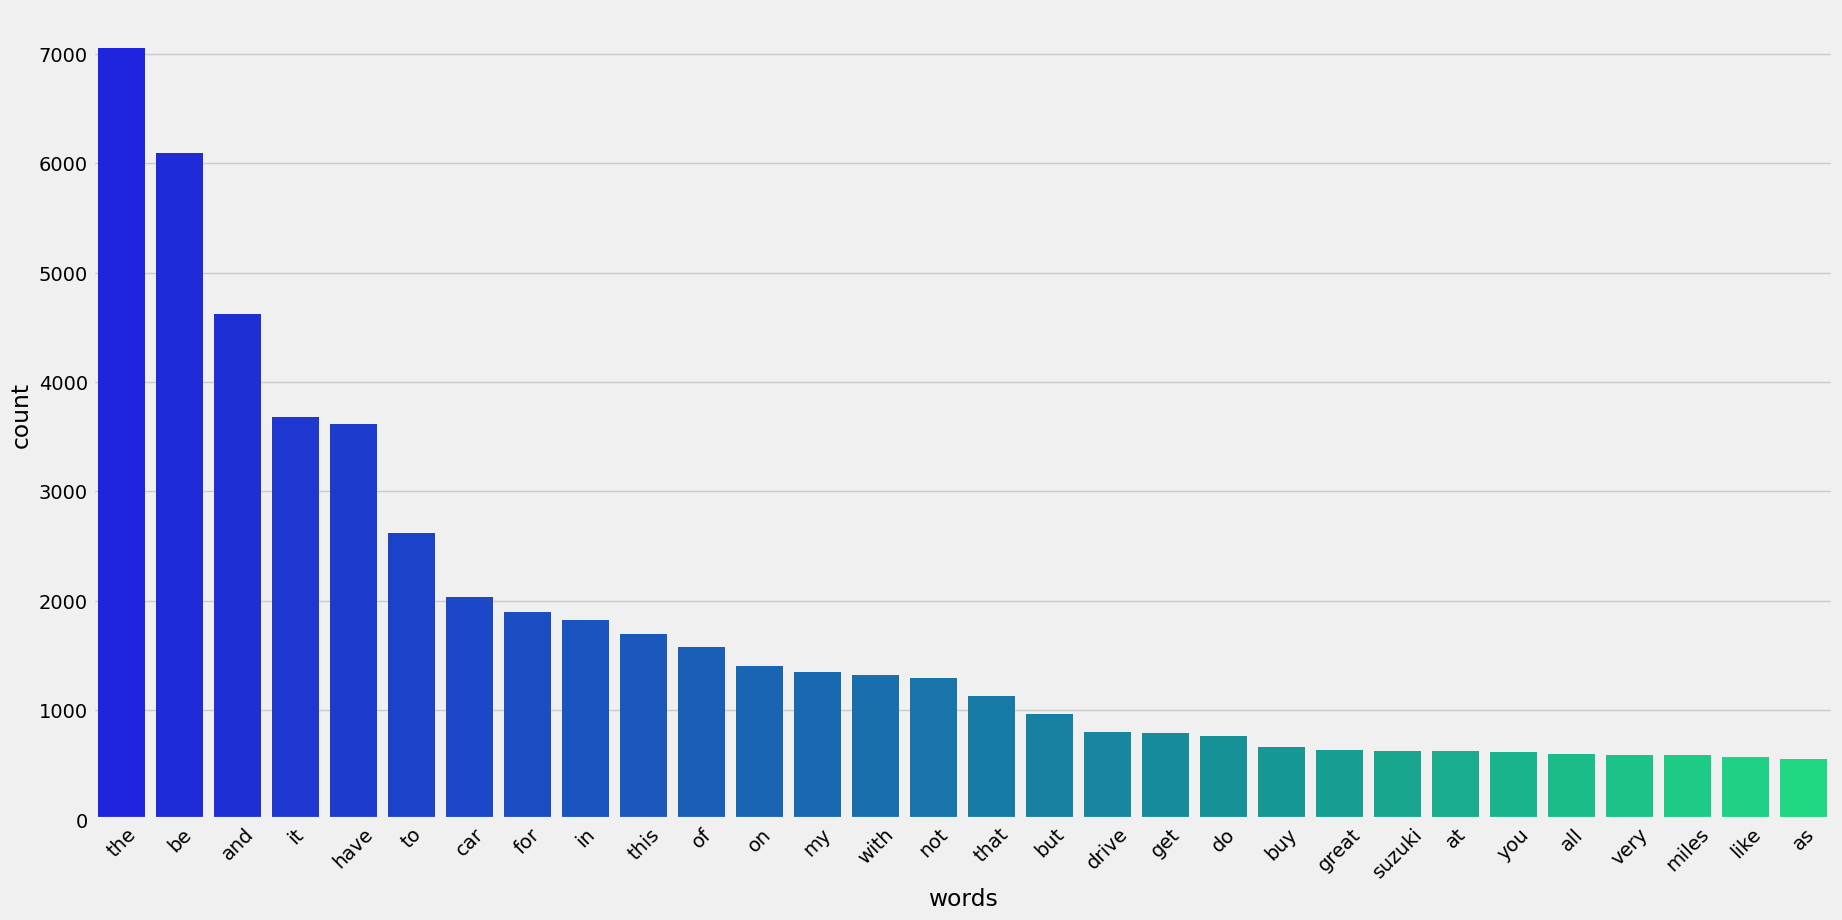

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_suzuki = ','.join(list(df_suzuki_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_suzuki = Counter(review_words_suzuki.split())
most_frequent = Counter_suzuki.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'get'),
  Text(3, 0, 'buy'),
  Text(4, 0, 'great'),
  Text(5, 0, 'suzuki'),
  Text(6, 0, 'miles'),
  Text(7, 0, 'like'),
  Text(8, 0, 'look'),
  Text(9, 0, 'go'),
  Text(10, 0, 'vehicle'),
  Text(11, 0, 'seat'),
  Text(12, 0, 'one'),
  Text(13, 0, 'engine'),
  Text(14, 0, 'new'),
  Text(15, 0, 'would'),
  Text(16, 0, '000'),
  Text(17, 0, 'suv'),
  Text(18, 0, 'good'),
  Text(19, 0, 'love'),
  Text(20, 0, 'little'),
  Text(21, 0, 'well'),
  Text(22, 0, 'handle'),
  Text(23, 0, 'replace'),
  Text(24, 0, 'gas'),
  Text(25, 0, 'still'),
  Text(26, 0, 'time'),
  Text(27, 0, 'use'),
  Text(28, 0, 'need'),
  Text(29, 0, 'better')])

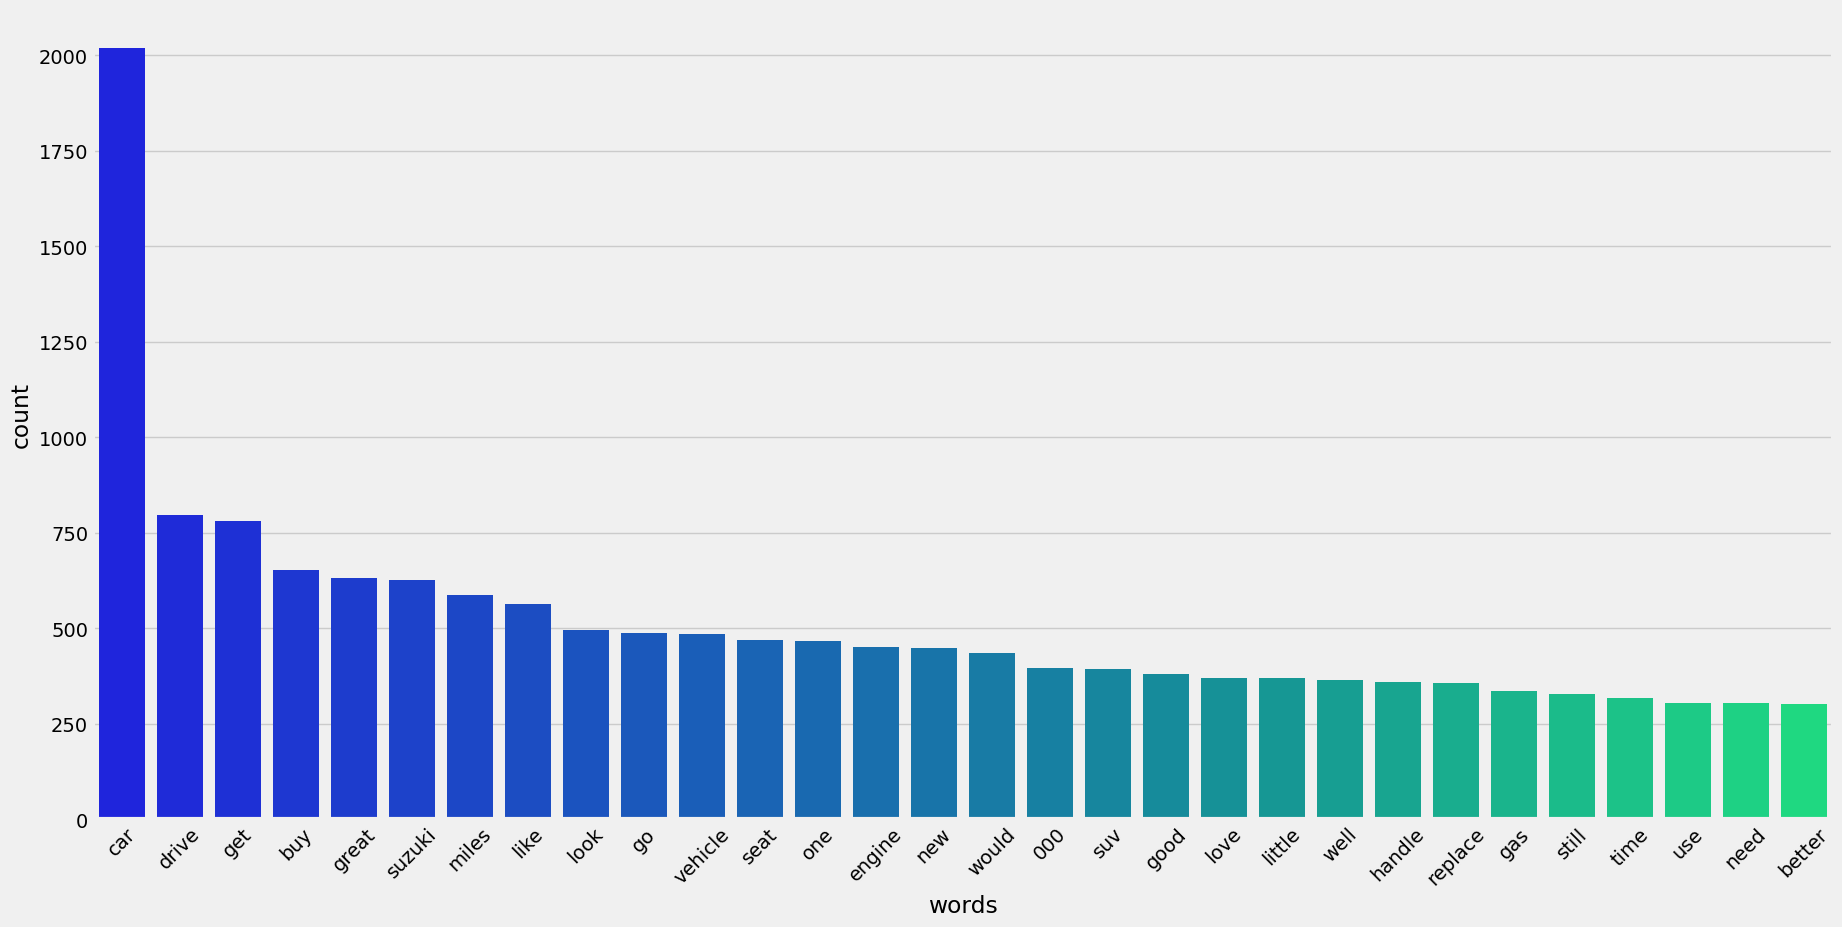

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_suzuki_pos['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_suzuki_pos['Review_Clean_List']]
df_suzuki_pos['Review_Clean'] = list(map(to_string, df_suzuki_pos['Review_Clean_List']))

# Join all word corpus
review_words_suzuki = ','.join(list(df_suzuki_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_suzuki = Counter(review_words_suzuki.split())
most_frequent = Counter_suzuki.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_suzuki_pos

Vehicle_Title  \
0                 2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
1                 2008 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
2                 2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 5M)   
3     2006 Suzuki Reno Hatchback Convenience 4dr Hatchback (2.0L 4cyl 4A)   
4     2006 Suzuki Reno Hatchback Convenience 4dr Hatchback (2.0L 4cyl 4A)   
...                                                                   ...   
1312          2010 Suzuki Kizashi Sedan SLS 4dr Sedan AWD (2.4L 4cyl CVT)   
1313          2010 Suzuki Kizashi Sedan SLS 4dr Sedan AWD (2.4L 4cyl CVT)   
1314              2010 Suzuki Kizashi Sedan SLS 4dr Sedan (2.4L 4cyl CVT)   
1315               2010 Suzuki Kizashi Sedan GTS 4dr Sedan (2.4L 4cyl 6M)   
1316               2010 Suzuki Kizashi Sedan GTS 4dr Sedan (2.4L 4cyl 6M)   

      Rating  \
0      4.625   
1      4.375   
2      3.000   
3      2.000   
4      4.125   
...      ...   
1312   4.875   
1313   4.875   
1314   4.875   
1315   4.375   
1316   4.875   

                                                                          Full Review  \
0     fun small car We bought this car with a sonata in mind but the price point w...   
1     Cool little car Good car for the price with a good warranty. Comfortable, go...   
2     2006 Suzuki Reno I got an '06 Reno in October of '15. It had 51k miles. I wa...   
3     Worst mistake of my life Bought this car and an emergency car in January 201...   
4     2006 Suzuki Reno I purchased my car in 2011 at 48,000 miles, and the biggest...   
...                                                                               ...   
1312  First hand report February 27, 2010 and I purchased a Suzuki Kizashi SLS on ...   
1313  Love My Kizashi I learned about the Kizashi months ago from a friend.  I had...   
1314  My New  CVT/SLS Kizashi !! So Far So VERY Good...Performance & Speed sneeks ...   
1315  First three weeks of ownership Having previously owned two VW Corrados, a VW...   
1316  Great car for the money Just took delivery of a GTS FWD 6- speed.  Cant beli...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
1312       pos   
1313       pos   
1314       pos   
1315       pos   
1316       pos   

                                                                    Review_Clean_List  \
0     [fun, small, car, buy, car, sonata, mind, price, point, much, pass, peppy, q...   
1     [cool, little, car, good, car, price, good, warranty, comfortable, good, loo...   
2     [2006, suzuki, reno, get, 06, reno, october, 15, 51k, miles, surprise, find,...   
3     [worst, mistake, life, buy, car, emergency, car, january, 2014, total, last,...   
4     [2006, suzuki, reno, purchase, car, 2011, 48, 000, miles, biggest, problem, ...   
...                                                                               ...   
1312  [first, hand, report, february, 27, 2010, purchase, suzuki, kizashi, sls, fe...   
1313  [love, kizashi, learn, kizashi, months, ago, friend, 08, sx4, crossover, lov...   
1314  [new, cvt, sls, kizashi, far, good, performance, speed, sneeks, 80mph, arriv...   
1315  [first, three, weeks, ownership, previously, two, vw, corrados, vw, passat, ...   
1316  [great, car, money, take, delivery, gts, fwd, speed, cant, believe, suzuki, ...   

                                                                         Review_Clean  
0     fun small car buy car sonata mind price point much pass peppy quick small en...  
1     cool little car good car price good warranty comfortable good look lot base ...  
2     2006 suzuki reno get 06 reno october 15 51k miles surprise find vehicle crui...  
3     worst mistake life buy car emergency car january 2014 total last car car gre...  
4     2006 suzuki reno purchase car 2011 48 000 miles biggest problem good gas als...  
...                                                        

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_suzuki_pos = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_suzuki_pos.fit_transform(df_suzuki_pos['Review_Clean'])

In [ ]:
topic_model_suzuki_pos.get_topic_info()

Topic  Count                                        Name
0      -1    252                   -1_car_drive_miles_suzuki
1       0    192                       0_car_drive_great_get
2       1     89                   1_suzuki_drive_seat_great
3       2     80                       2_suv_great_price_row
4       3     64                   3_suzuki_dealer_miles_car
5       4     52                4_vitara_grand_sidekick_rav4
6       5     45                         5_car_miles_get_trs
7       6     31                      6_truly_new_2006_still
8       7     29                    7_cost_better_price_look
9       8     25                   8_aerio_sx_elantra_suzuki
10      9     25                     9_bite_flawless_78k_tru
11     10     24                       10_two_camp_184k_labs
12     11     23                  11_replace_lease_kit_hatch
13     12     22                    12_turn_common_paint_mph
14     13     22         13_excellent_handle_link_tripletred
15     14     22                  14_infant_215k_even_strong
16     15     21               15_malfunction_worst_hood_gas
17     16     19         16_actually_caravan_jaguar_accurate
18     17     17          17_decide_colorado_around_struggle
19     18     17                       18_cd_player_love_xl7
20     19     17                19_capacity_weak_liter_offer
21     20     17                  20_fan_cool_nightmare_clue
22     21     16                  21_repair_luxury_items_suv
23     22     16                       22_4wd_say_apart_work
24     23     16            23_ans_impulse_disappoint_inside
25     24     16                      24_rig_capable_due_4x4
26     25     15    25_escalade_navigator_headrests_problems
27     26     15              26_conditioner_air_bad_perfect
28     27     15             27_trip_mile_expectation_cooler
29     28     15                       28_net_rear_lot_facts
30     29     15              29_leave_though_door_broadside
31     30     15                  30_xl_miata_compressors_7s
32     31     15  31_think_goingreliably_throughthe_wellover
33     32     15               32_priceless_flood_thru_prove
34     33     15             33_replace_problems_check_light
35     34     13                   34_verona_smooth_ride_car

In [ ]:
topic_model_suzuki_pos.get_topic(0)

[('car', 0.026950165086773385),
 ('drive', 0.02144359564155721),
 ('great', 0.018496777742585745),
 ('get', 0.017328583608269988),
 ('look', 0.016087613524445796),
 ('like', 0.015935728050819675),
 ('little', 0.015678221583897485),
 ('love', 0.0149889496437257),
 ('sx4', 0.014725292040814937),
 ('good', 0.014438310359566837)]

In [ ]:
# Visualize top topic keywords
topic_model_suzuki_pos.visualize_barchart()

In [ ]:
topic_model_suzuki_pos.visualize_topics()

In [ ]:
topic_model_suzuki_pos.visualize_hierarchy()

In [ ]:
topic_model_suzuki_pos.visualize_heatmap()

# Toyota

## Pos

In [ ]:
#toyota

In [ ]:
df_toyota_pos = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/toyota_pos.csv')

In [ ]:
df_toyota_pos

Review_Date     Author_Name  \
0      on 12/17/16 16:40 PM (PST)           matt    
1      on 04/14/10 07:43 AM (PDT)         Joel G    
2      on 11/12/08 17:31 PM (PST)         Dennis    
3      on 04/14/08 22:47 PM (PDT)  Alf Skrastins    
4      on 01/28/07 16:32 PM (PST)        Carlton    
...                           ...             ...   
8012   on 02/20/03 00:00 AM (PST)   Jason Patron    
8013   on 12/15/08 01:14 AM (PST)             jt    
8014   on 10/19/03 00:00 AM (PDT)         mbaron    
8015   on 06/10/03 00:00 AM (PDT)     Toyota Guy    
8016   on 01/17/03 00:00 AM (PST)         cmastr    

                                               Vehicle_Title  \
0     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   
1                  1997 Toyota Previa Minivan LE 3dr Minivan   
2     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   
3     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   
4     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   
...                                                      ...   
8012       1999 Toyota Celica Convertible GT 2dr Convertible   
8013           1999 Toyota Celica Hatchback GT 2dr Hatchback   
8014           1999 Toyota Celica Hatchback GT 2dr Hatchback   
8015           1999 Toyota Celica Hatchback GT 2dr Hatchback   
8016           1999 Toyota Celica Hatchback GT 2dr Hatchback   

                              Review_Title  \
0       my 4th previa, best van ever made!   
1                   Mom's Taxi Babies Ride   
2                     My Favorite Van Ever   
3                        Best Minivan ever   
4     Final model year of the great Previa   
...                                    ...   
8012                   Toyota Celica Rocks   
8013                   Tough and beautiful   
8014                         I love my car   
8015                 Fun, reliable, sporty   
8016                   fun to drive celica   

                                                                               Review  \
0      1st 95 went over 300k before being totalled by a truck running a red light....   
1      Sold 86 Toyota Van 285K miles to be replaced with 97 Previa with 1st baby c...   
2      I have owned lots of vans, and the Previa is far and away the best van I ha...   
3      My 1997 AWD Previa is the third one that I have owned. I previously had a 1...   
4      An amazing vehicle: mid-engine, supercharged, all-wheel drive, 7-passenger ...   
...                                                                               ...   
8012   I've had my Convertible Celica for \ralmost 4 years and it's been an \rexce...   
8013   Purchased this beauty silver Celica GT brand new in June 1999. Came with on...   
8014   I have had my car for a long time and I\rhave only had one problem.  The Cr...   
8015   After four years, this car has never \rhad a mechanical problem of any kind...   
8016   I love my car. It is fun to drive, has \rgreat pick up, handles well. I hav...   

      Rating  \
0      5.000   
1      5.000   
2      4.875   
3      5.000   
4      4.875   
...      ...   
8012   4.750   
8013   5.000   
8014   4.625   
8015   4.500   
8016   4.500   

                                                                          Full Review  \
0     my 4th previa, best van ever made! 1st 95 went over 300k before being totall...   
1     Mom's Taxi Babies Ride Sold 86 Toyota Van 285K miles to be replaced with 97 ...   
2     My Favorite Van Ever I have owned lots of vans, and the Previa is far and aw...   
3     Best Minivan ever My 1997 AWD Previa is the third one that I have owned. I p...   
4     Final model year of the great Previa An amazing vehicle: mid-engine, superch...   
...                                                                               ...   
8012  Toyota Celica Rocks I've had my Convertible Celica for \ralmost 4 years and ...   
8013  Tough and beautiful Purchased this beauty silver Celica GT brand new in June...   


In [ ]:
df_toyota_pos.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_toyota_pos

Vehicle_Title  Rating  \
0     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   5.000   
1                  1997 Toyota Previa Minivan LE 3dr Minivan   5.000   
2     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   4.875   
3     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   5.000   
4     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   4.875   
...                                                      ...     ...   
8012       1999 Toyota Celica Convertible GT 2dr Convertible   4.750   
8013           1999 Toyota Celica Hatchback GT 2dr Hatchback   5.000   
8014           1999 Toyota Celica Hatchback GT 2dr Hatchback   4.625   
8015           1999 Toyota Celica Hatchback GT 2dr Hatchback   4.500   
8016           1999 Toyota Celica Hatchback GT 2dr Hatchback   4.500   

                                                                          Full Review  \
0     my 4th previa, best van ever made! 1st 95 went over 300k before being totall...   
1     Mom's Taxi Babies Ride Sold 86 Toyota Van 285K miles to be replaced with 97 ...   
2     My Favorite Van Ever I have owned lots of vans, and the Previa is far and aw...   
3     Best Minivan ever My 1997 AWD Previa is the third one that I have owned. I p...   
4     Final model year of the great Previa An amazing vehicle: mid-engine, superch...   
...                                                                               ...   
8012  Toyota Celica Rocks I've had my Convertible Celica for \ralmost 4 years and ...   
8013  Tough and beautiful Purchased this beauty silver Celica GT brand new in June...   
8014  I love my car I have had my car for a long time and I\rhave only had one pro...   
8015  Fun, reliable, sporty After four years, this car has never \rhad a mechanica...   
8016  fun to drive celica I love my car. It is fun to drive, has \rgreat pick up, ...   

     sentiment  
0          pos  
1          pos  
2          pos  
3          pos  
4          pos  
...        ...  
8012       pos  
8013       pos  
8014       pos  
8015       pos  
8016       pos  

[8017 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_toyota_pos['Review_Clean_List'] = list(map(text_preprocessing, df_toyota_pos['Full Review']))

# Return to string with to_string function
df_toyota_pos['Review_Clean'] = list(map(to_string, df_toyota_pos['Review_Clean_List']))

In [ ]:
df_toyota_pos

Vehicle_Title  Rating  \
0     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   5.000   
1                  1997 Toyota Previa Minivan LE 3dr Minivan   5.000   
2     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   4.875   
3     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   5.000   
4     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   4.875   
...                                                      ...     ...   
8012       1999 Toyota Celica Convertible GT 2dr Convertible   4.750   
8013           1999 Toyota Celica Hatchback GT 2dr Hatchback   5.000   
8014           1999 Toyota Celica Hatchback GT 2dr Hatchback   4.625   
8015           1999 Toyota Celica Hatchback GT 2dr Hatchback   4.500   
8016           1999 Toyota Celica Hatchback GT 2dr Hatchback   4.500   

                                                                          Full Review  \
0     my 4th previa, best van ever made! 1st 95 went over 300k before being totall...   
1     Mom's Taxi Babies Ride Sold 86 Toyota Van 285K miles to be replaced with 97 ...   
2     My Favorite Van Ever I have owned lots of vans, and the Previa is far and aw...   
3     Best Minivan ever My 1997 AWD Previa is the third one that I have owned. I p...   
4     Final model year of the great Previa An amazing vehicle: mid-engine, superch...   
...                                                                               ...   
8012  Toyota Celica Rocks I've had my Convertible Celica for \ralmost 4 years and ...   
8013  Tough and beautiful Purchased this beauty silver Celica GT brand new in June...   
8014  I love my car I have had my car for a long time and I\rhave only had one pro...   
8015  Fun, reliable, sporty After four years, this car has never \rhad a mechanica...   
8016  fun to drive celica I love my car. It is fun to drive, has \rgreat pick up, ...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
8012       pos   
8013       pos   
8014       pos   
8015       pos   
8016       pos   

                                                                    Review_Clean_List  \
0     [my, 4th, previa, best, van, ever, make, 1st, 95, go, over, 300k, before, be...   
1     [mom, taxi, baby, ride, sell, 86, toyota, van, 285k, miles, to, be, replace,...   
2     [my, favorite, van, ever, have, own, lot, of, vans, and, the, previa, be, fa...   
3     [best, minivan, ever, my, 1997, awd, previa, be, the, third, one, that, have...   
4     [final, model, year, of, the, great, previa, an, amaze, vehicle, mid, engine...   
...                                                                               ...   
8012  [toyota, celica, rock, have, have, my, convertible, celica, for, almost, yea...   
8013  [tough, and, beautiful, purchase, this, beauty, silver, celica, gt, brand, n...   
8014  [love, my, car, have, have, my, car, for, long, time, and, have, only, have,...   
8015  [fun, reliable, sporty, after, four, years, this, car, have, never, have, me...   
8016  [fun, to, drive, celica, love, my, car, it, be, fun, to, drive, have, great,...   

                                                                         Review_Clean  
0     my 4th previa best van ever make 1st 95 go over 300k before be total by truc...  
1     mom taxi baby ride sell 86 toyota van 285k miles to be replace with 97 previ...  
2     my favorite van ever have own lot of vans and the previa be far and away the...  
3     best minivan ever my 1997 awd previa be the third one that have own previous...  
4     final model year of the great previa an amaze vehicle mid engine supercharge...  
...                                                                               ...  
8012  toyota celica rock have have my convertible celica for almost years and it b...  
8013  tough and beautiful purchase this beauty silver celica gt brand new in june ...  
8014  love my car have have my car 

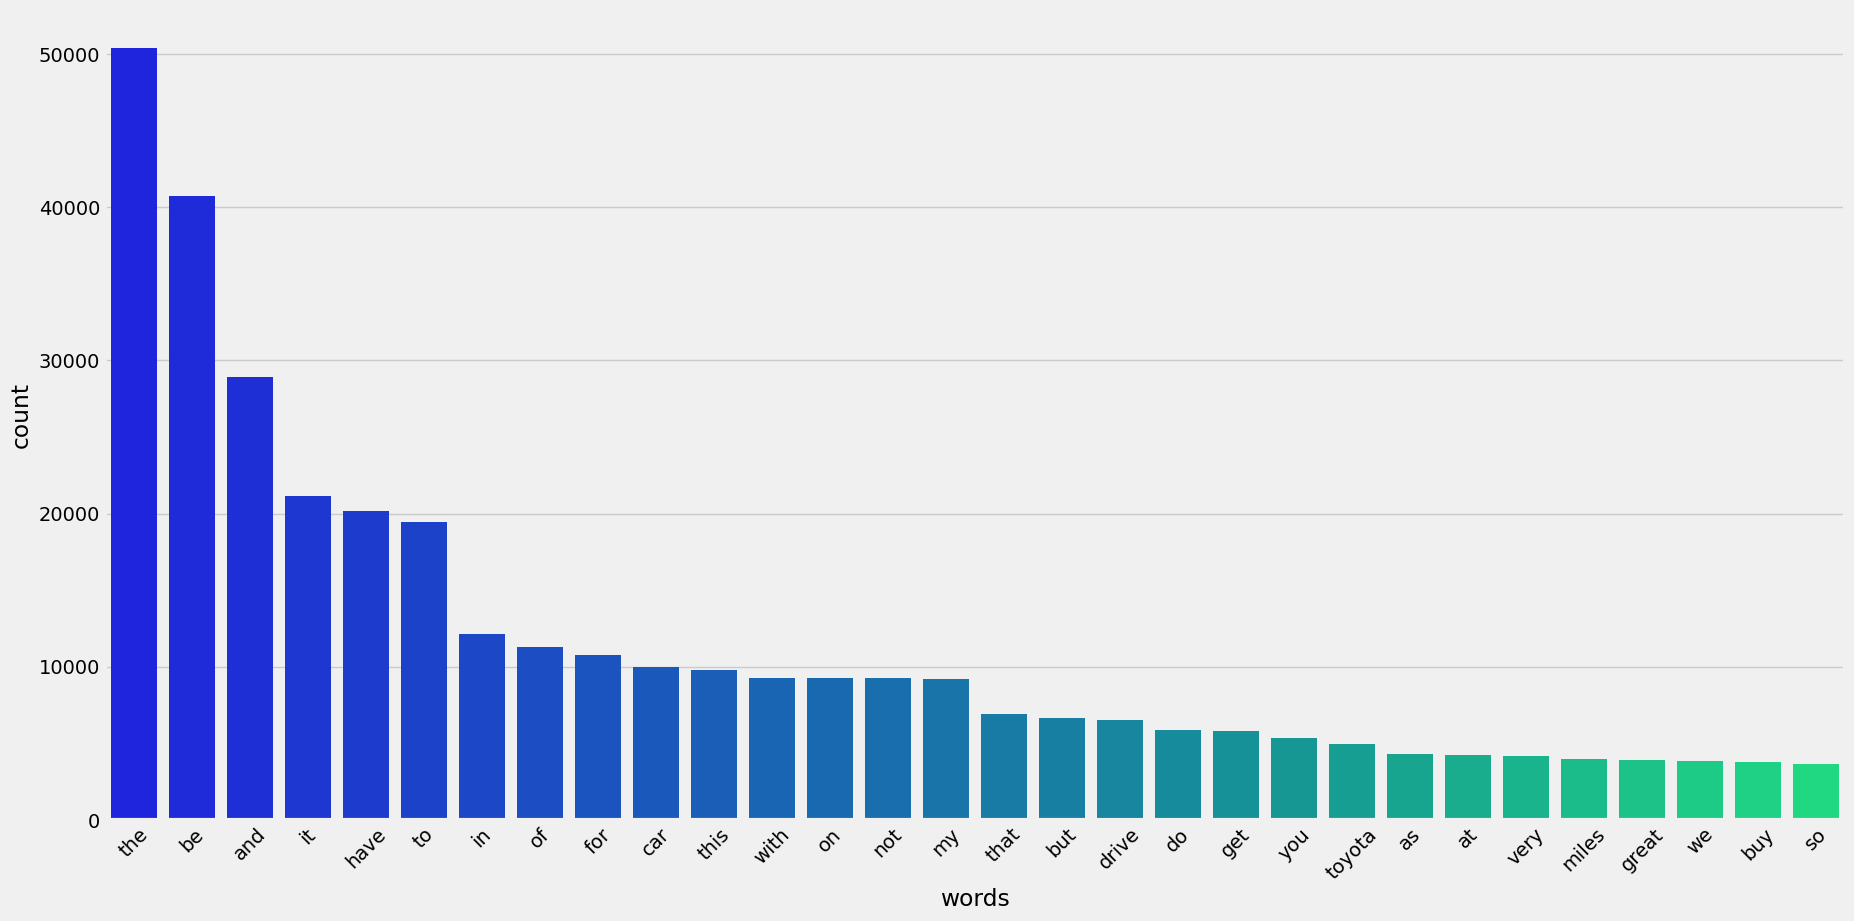

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_toyota = ','.join(list(df_toyota_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_toyota = Counter(review_words_toyota.split())
most_frequent = Counter_toyota.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'get'),
  Text(3, 0, 'miles'),
  Text(4, 0, 'great'),
  Text(5, 0, 'buy'),
  Text(6, 0, 'like'),
  Text(7, 0, 'truck'),
  Text(8, 0, 'seat'),
  Text(9, 0, 'go'),
  Text(10, 0, 'vehicle'),
  Text(11, 0, 'mpg'),
  Text(12, 0, 'one'),
  Text(13, 0, 'would'),
  Text(14, 0, 'love'),
  Text(15, 0, 'good'),
  Text(16, 0, 'new'),
  Text(17, 0, 'gas'),
  Text(18, 0, 'look'),
  Text(19, 0, 'use'),
  Text(20, 0, 'mileage'),
  Text(21, 0, '000'),
  Text(22, 0, 'back'),
  Text(23, 0, 'well'),
  Text(24, 0, 'still'),
  Text(25, 0, 'time'),
  Text(26, 0, 'ride'),
  Text(27, 0, 'make'),
  Text(28, 0, 'better'),
  Text(29, 0, 'need')])

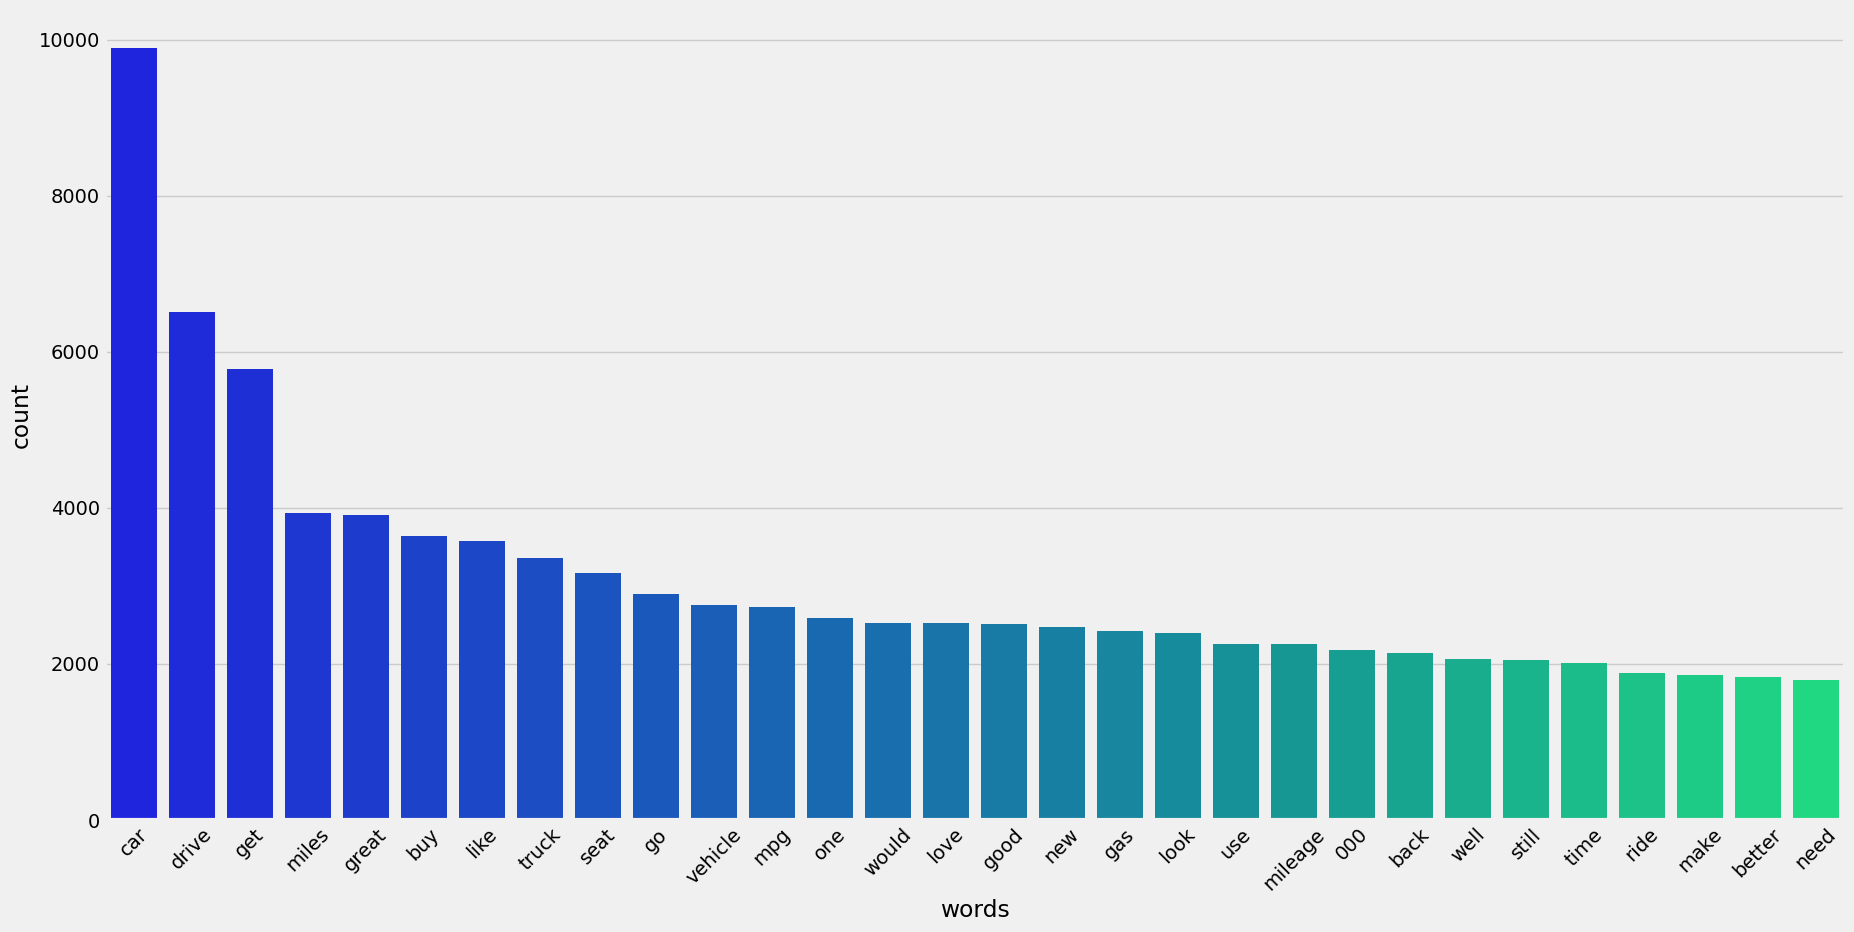

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
stopwords_list.extend(['jaguar','suzuki','toyota'])

df_toyota_pos['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_toyota_pos['Review_Clean_List']]
df_toyota_pos['Review_Clean'] = list(map(to_string, df_toyota_pos['Review_Clean_List']))

# Join all word corpus
review_words_toyota = ','.join(list(df_toyota_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_toyota = Counter(review_words_toyota.split())
most_frequent = Counter_toyota.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_toyota_pos

Vehicle_Title  Rating  \
0     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   5.000   
1                  1997 Toyota Previa Minivan LE 3dr Minivan   5.000   
2     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   4.875   
3     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   5.000   
4     1997 Toyota Previa Minivan LE All-Trac 3dr Minivan AWD   4.875   
...                                                      ...     ...   
8012       1999 Toyota Celica Convertible GT 2dr Convertible   4.750   
8013           1999 Toyota Celica Hatchback GT 2dr Hatchback   5.000   
8014           1999 Toyota Celica Hatchback GT 2dr Hatchback   4.625   
8015           1999 Toyota Celica Hatchback GT 2dr Hatchback   4.500   
8016           1999 Toyota Celica Hatchback GT 2dr Hatchback   4.500   

                                                                          Full Review  \
0     my 4th previa, best van ever made! 1st 95 went over 300k before being totall...   
1     Mom's Taxi Babies Ride Sold 86 Toyota Van 285K miles to be replaced with 97 ...   
2     My Favorite Van Ever I have owned lots of vans, and the Previa is far and aw...   
3     Best Minivan ever My 1997 AWD Previa is the third one that I have owned. I p...   
4     Final model year of the great Previa An amazing vehicle: mid-engine, superch...   
...                                                                               ...   
8012  Toyota Celica Rocks I've had my Convertible Celica for \ralmost 4 years and ...   
8013  Tough and beautiful Purchased this beauty silver Celica GT brand new in June...   
8014  I love my car I have had my car for a long time and I\rhave only had one pro...   
8015  Fun, reliable, sporty After four years, this car has never \rhad a mechanica...   
8016  fun to drive celica I love my car. It is fun to drive, has \rgreat pick up, ...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
8012       pos   
8013       pos   
8014       pos   
8015       pos   
8016       pos   

                                                                    Review_Clean_List  \
0     [4th, previa, best, van, ever, make, 1st, 95, go, 300k, total, truck, run, r...   
1     [mom, taxi, baby, ride, sell, 86, van, 285k, miles, replace, 97, previa, 1st...   
2     [favorite, van, ever, lot, vans, previa, far, away, best, van, ever, build, ...   
3     [best, minivan, ever, 1997, awd, previa, third, one, previously, 1991, 1994,...   
4     [final, model, year, great, previa, amaze, vehicle, mid, engine, supercharge...   
...                                                                               ...   
8012  [celica, rock, convertible, celica, almost, years, excellent, buy, never, pr...   
8013  [tough, beautiful, purchase, beauty, silver, celica, gt, brand, new, june, 1...   
8014  [love, car, car, long, time, one, problem, cruise, control, switch, fail, ge...   
8015  [fun, reliable, sporty, four, years, car, never, mechanical, problem, kind, ...   
8016  [fun, drive, celica, love, car, fun, drive, great, pick, handle, well, probl...   

                                                                         Review_Clean  
0     4th previa best van ever make 1st 95 go 300k total truck run red light walk ...  
1     mom taxi baby ride sell 86 van 285k miles replace 97 previa 1st baby come ju...  
2     favorite van ever lot vans previa far away best van ever build quality unbel...  
3     best minivan ever 1997 awd previa third one previously 1991 1994 three compl...  
4     final model year great previa amaze vehicle mid engine supercharge wheel dri...  
...                                                                               ...  
8012  celica rock convertible celica almost years excellent buy never problem grea...  
8013  tough beautiful purchase beauty silver celica gt brand new june 1999 come on...  
8014  love car car long time one pr

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_toyota_pos = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_toyota_pos.fit_transform(df_toyota_pos['Review_Clean'])

In [ ]:
topic_model_toyota_pos.get_topic_info()

Topic  Count                                    Name
0      -1   2345                  -1_car_drive_get_great
1       0   1412               0_truck_tundra_tacoma_cab
2       1    404            1_sienna_van_minivan_odyssey
3       2    328                    2_camry_car_se_drive
4       3    281                3_avalon_car_lexus_drive
5       4    281                   4_prius_mpg_car_drive
6       5    278                   5_rav4_rav_drive_love
7       6    276                  6_corolla_car_get_good
8       7    273          7_highlander_suv_vehicle_drive
9       8    235            8_4runner_runner_vehicle_suv
10      9    208                   9_car_drive_like_seat
11     10    173              10_miles_replace_car_still
12     11    153                  11_suv_best_suvs_great
13     12    126  12_seat_uncomfortable_back_comfortable
14     13    117           13_solara_convertible_car_sle
15     14     92    14_problem_dealer_transmission_start
16     15     87             15_sequoia_suv_love_vehicle
17     16     79              16_noise_rattle_sound_hear
18     17     73                    17_yaris_car_mpg_gas
19     18     66                 18_echo_car_gas_mileage
20     19     64                   19_matrix_love_xrs_xr
21     20     61            20_venza_love_murano_vehicle
22     21     53                 21_fj_jeep_road_vehicle
23     22     50          22_navigation_gps_system_phone
24     23     50                  23_ever_car_best_miles
25     24     40                 24_fun_car_little_drive
26     25     37                  25_car_love_great_like
27     26     36                 26_celica_gt_car_sporty
28     27     32                    27_prius_car_mpg_get
29     28     31                    28_mpg_car_fun_drive
30     29     31                  29_mpg_average_gas_mph
31     30     29        30_great_covertible_awesome_nice
32     31     28             31_hybrid_camry_mpg_average
33     32     26                 32_safety_safe_away_hit
34     33     21             33_lexus_quality_price_like
35     34     20             34_snow_hill_vehicle_desert
36     35     19                 35_spyder_mr2_smt_miata
37     36     18                 36_car_manual_great_fun
38     37     17          37_windshield_sun_mirror_glare
39     38     15              38_mpg_hybrid_mileage_econ
40     39     14             39_landcruiser_v6_basset_v8
41     40     14                40_land_cruiser_suv_2000
42     41     13                41_car_miles_gas_battery
43     42     11               42_blind_spot_mirror_rear

In [ ]:
topic_model_toyota_pos.get_topic(0)

[('truck', 0.05158247035199685),
 ('tundra', 0.02256379481819529),
 ('tacoma', 0.02151807448922762),
 ('cab', 0.015200151200331464),
 ('great', 0.013150441033003314),
 ('get', 0.012345734477498115),
 ('tow', 0.012163273798016487),
 ('bed', 0.011277151506382128),
 ('drive', 0.011070946880673312),
 ('buy', 0.010714248478821131)]

In [ ]:
# Visualize top topic keywords
topic_model_toyota_pos.visualize_barchart()

In [ ]:
topic_model_toyota_pos.visualize_topics()

In [ ]:
topic_model_toyota_pos.visualize_hierarchy()

In [ ]:
topic_model_toyota_pos.visualize_heatmap()

# Volkswagon

## Pos

In [ ]:
#volkswagon

In [ ]:
df_vw_pos = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/vw_pos.csv')

In [ ]:
df_vw_pos

Review_Date     Author_Name  \
0      on 01/01/09 19:13 PM (PST)       Kayemtee    
1      on 08/02/08 13:43 PM (PDT)            jik    
2      on 05/16/08 12:07 PM (PDT)   Ray Cavanagh    
3      on 01/03/08 17:53 PM (PST)    The Husband    
4      on 09/27/07 08:42 AM (PDT)       Kristina    
...                           ...             ...   
4081   on 02/18/16 13:08 PM (PST)           Drew    
4082   on 02/06/16 03:49 AM (PST)  Bill Haberlin    
4083   on 02/04/16 05:42 AM (PST)             BN    
4084   on 11/11/15 19:49 PM (PST)           Bill    
4085   on 10/22/15 17:04 PM (PDT)           Paul    

                                                                        Vehicle_Title  \
0           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 5M)   
1           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 5M)   
2     2007 Volkswagen New Beetle Convertible Triple White PZEV 2dr Convertible (2....   
3     2007 Volkswagen New Beetle Convertible Triple White 2dr Convertible (2.5L 5c...   
4           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 6A)   
...                                                                               ...   
4081                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4082                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4083                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4084                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4085                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   

                     Review_Title  \
0                     Nice Ragtop   
1      Luv, luv, luv my dream car   
2         The Best One So Far....   
3         Not for Cold Weather!!!   
4                I love my Beetle   
...                           ...   
4081                       2016 S   
4082                   Good Value   
4083  Great Ride - But Typical VW   
4084   Not too big, not too small   
4085      Good pick for its class   

                                                                               Review  \
0      My wife chose this car to replace a Sebring convertible.  Wanted a clutch a...   
1      4 of us carpool 1 way 30 min.  Backseat ok for normal size.  Gas mileage co...   
2      I owned a 2002 SLK and 2003 BMW Z-4.  After spending a fortune for upkeep o...   
3      The car is beautiful and performs well in the warm weather.  It is much bet...   
4      I love my car.  I previously owned an Explorer, and the two are difficult t...   
...                                                                               ...   
4081   I've been leading a 2016 Tiguan S for about a month and so far I am very ha...   
4082   I have owned the Tiguan for a year and 4 months.  I bought the Tiguan becau...   
4083   Now had 2+ months with SUV.  Nice SUV, handles well, accelerates well, amaz...   
4084   We have had our 2016 Tiguan for a month. Prior to that a trouble free 2012 ...   
4085   The Tiguan S can be had for a reasonable 24k and you get what you pay for, ...   

      Rating  \
0      4.375   
1      4.750   
2      5.000   
3      3.750   
4      5.000   
...      ...   
4081   5.000   
4082   4.000   
4083   3.000   
4084   4.000   
4085   4.000   

                                                                          Full Review  \
0     Nice Ragtop My wife chose this car to replace a Sebring convertible.  Wanted...   
1     Luv, luv, luv my dream car 4 of us carpool 1 way 30 min.  Backseat ok for no...   
2     The Best One So Far.... I owned a 2002 SLK and 2003 BMW Z-4.  After spending...   
3     Not for Cold Weather!!! The car is beautiful and performs well in the warm w...   
4     I love my Beetle I love my car.  I previously owned an Explorer, and the two...   
...                                                                        

In [ ]:
df_vw_pos.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_vw_pos

Vehicle_Title  \
0           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 5M)   
1           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 5M)   
2     2007 Volkswagen New Beetle Convertible Triple White PZEV 2dr Convertible (2....   
3     2007 Volkswagen New Beetle Convertible Triple White 2dr Convertible (2.5L 5c...   
4           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 6A)   
...                                                                               ...   
4081                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4082                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4083                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4084                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4085                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   

      Rating  \
0      4.375   
1      4.750   
2      5.000   
3      3.750   
4      5.000   
...      ...   
4081   5.000   
4082   4.000   
4083   3.000   
4084   4.000   
4085   4.000   

                                                                          Full Review  \
0     Nice Ragtop My wife chose this car to replace a Sebring convertible.  Wanted...   
1     Luv, luv, luv my dream car 4 of us carpool 1 way 30 min.  Backseat ok for no...   
2     The Best One So Far.... I owned a 2002 SLK and 2003 BMW Z-4.  After spending...   
3     Not for Cold Weather!!! The car is beautiful and performs well in the warm w...   
4     I love my Beetle I love my car.  I previously owned an Explorer, and the two...   
...                                                                               ...   
4081  2016 S I've been leading a 2016 Tiguan S for about a month and so far I am v...   
4082  Good Value I have owned the Tiguan for a year and 4 months.  I bought the Ti...   
4083  Great Ride - But Typical VW Now had 2+ months with SUV.  Nice SUV, handles w...   
4084  Not too big, not too small We have had our 2016 Tiguan for a month. Prior to...   
4085  Good pick for its class The Tiguan S can be had for a reasonable 24k and you...   

     sentiment  
0          pos  
1          pos  
2          pos  
3          pos  
4          pos  
...        ...  
4081       pos  
4082       pos  
4083       pos  
4084       pos  
4085       pos  

[4086 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_vw_pos['Review_Clean_List'] = list(map(text_preprocessing, df_vw_pos['Full Review']))

# Return to string with to_string function
df_vw_pos['Review_Clean'] = list(map(to_string, df_vw_pos['Review_Clean_List']))

In [ ]:
df_vw_pos

Vehicle_Title  \
0           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 5M)   
1           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 5M)   
2     2007 Volkswagen New Beetle Convertible Triple White PZEV 2dr Convertible (2....   
3     2007 Volkswagen New Beetle Convertible Triple White 2dr Convertible (2.5L 5c...   
4           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 6A)   
...                                                                               ...   
4081                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4082                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4083                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4084                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4085                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   

      Rating  \
0      4.375   
1      4.750   
2      5.000   
3      3.750   
4      5.000   
...      ...   
4081   5.000   
4082   4.000   
4083   3.000   
4084   4.000   
4085   4.000   

                                                                          Full Review  \
0     Nice Ragtop My wife chose this car to replace a Sebring convertible.  Wanted...   
1     Luv, luv, luv my dream car 4 of us carpool 1 way 30 min.  Backseat ok for no...   
2     The Best One So Far.... I owned a 2002 SLK and 2003 BMW Z-4.  After spending...   
3     Not for Cold Weather!!! The car is beautiful and performs well in the warm w...   
4     I love my Beetle I love my car.  I previously owned an Explorer, and the two...   
...                                                                               ...   
4081  2016 S I've been leading a 2016 Tiguan S for about a month and so far I am v...   
4082  Good Value I have owned the Tiguan for a year and 4 months.  I bought the Ti...   
4083  Great Ride - But Typical VW Now had 2+ months with SUV.  Nice SUV, handles w...   
4084  Not too big, not too small We have had our 2016 Tiguan for a month. Prior to...   
4085  Good pick for its class The Tiguan S can be had for a reasonable 24k and you...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
4081       pos   
4082       pos   
4083       pos   
4084       pos   
4085       pos   

                                                                    Review_Clean_List  \
0     [nice, ragtop, my, wife, choose, this, car, to, replace, sebring, convertibl...   
1     [luv, luv, luv, my, dream, car, of, us, carpool, way, 30, min, backseat, ok,...   
2     [the, best, one, so, far, own, 2002, slk, and, 2003, bmw, after, spend, fort...   
3     [not, for, cold, weather, the, car, be, beautiful, and, perform, well, in, t...   
4     [love, my, beetle, love, my, car, previously, own, an, explorer, and, the, t...   
...                                                                               ...   
4081  [2016, have, be, lead, 2016, tiguan, for, about, month, and, so, far, be, ve...   
4082  [good, value, have, own, the, tiguan, for, year, and, months, buy, the, tigu...   
4083  [great, ride, but, typical, vw, now, have, months, with, suv, nice, suv, han...   
4084  [not, too, big, not, too, small, we, have, have, our, 2016, tiguan, for, mon...   
4085  [good, pick, for, its, class, the, tiguan, can, be, have, for, reasonable, 2...   

                                                                         Review_Clean  
0     nice ragtop my wife choose this car to replace sebring convertible want clut...  
1     luv luv luv my dream car of us carpool way 30 min backseat ok for normal siz...  
2     the best one so far own 2002 slk and 2003 bmw after spend fortune for upkeep...  
3     not for cold weather the car be beautiful and perform well in the warm weath...  
4     love my b

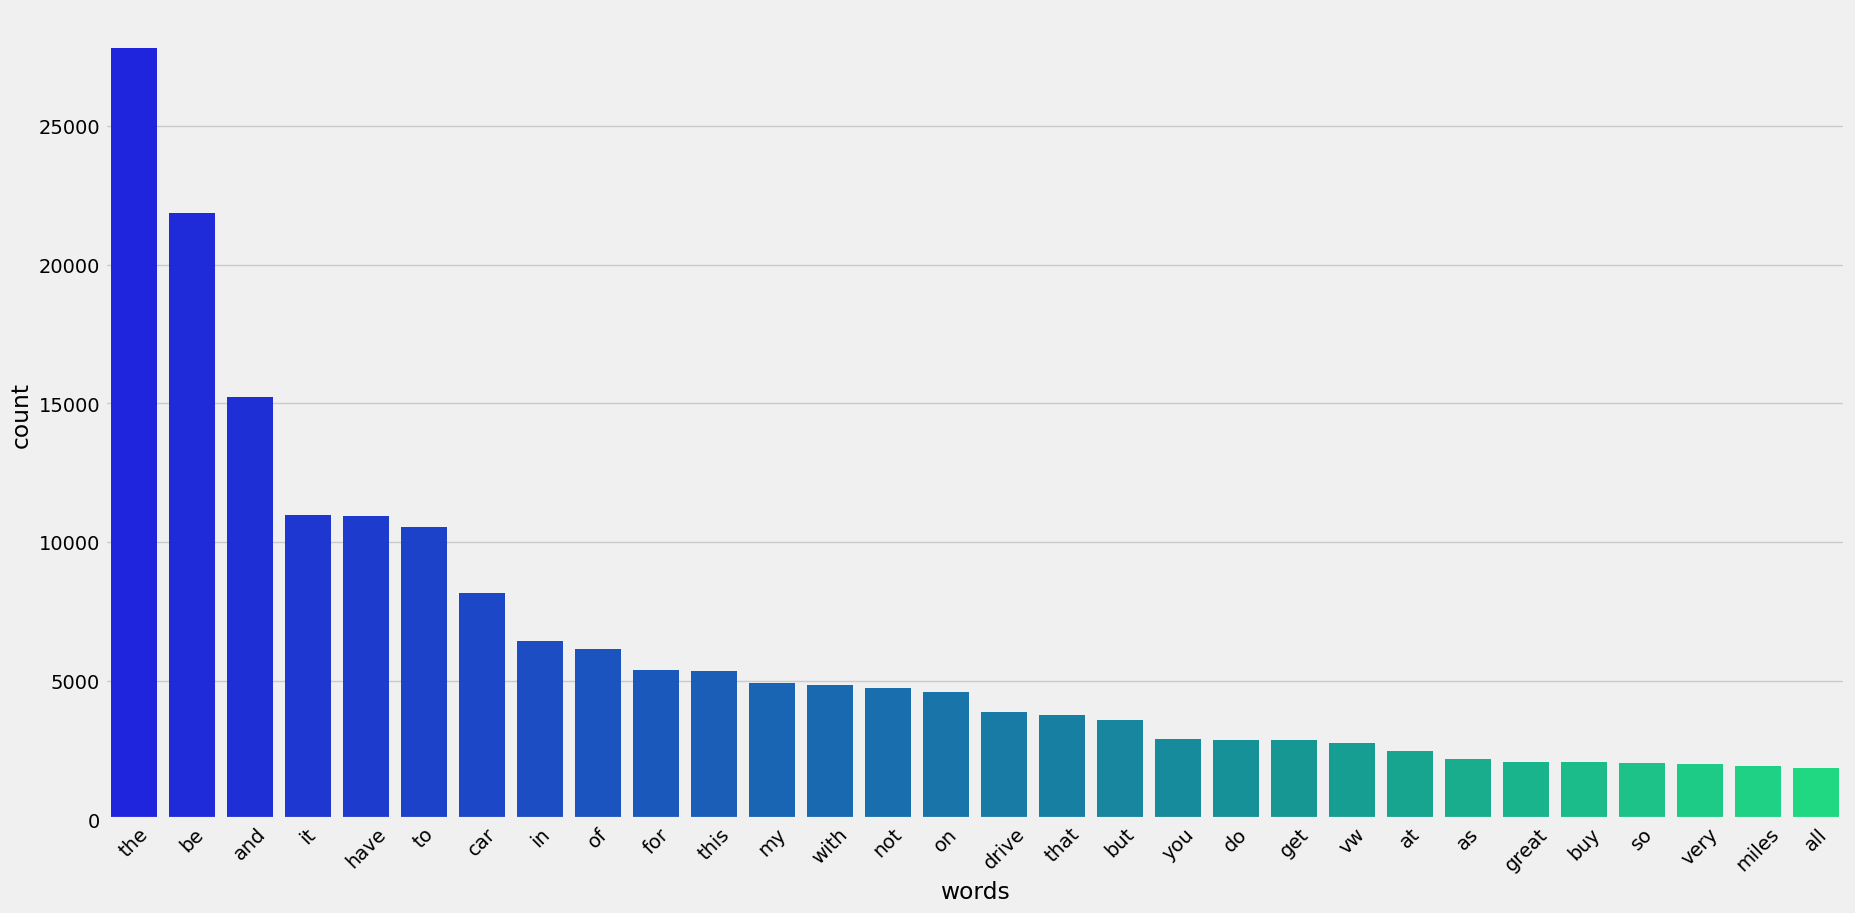

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_vw = ','.join(list(df_vw_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_vw = Counter(review_words_vw.split())
most_frequent = Counter_vw.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'get'),
  Text(3, 0, 'vw'),
  Text(4, 0, 'great'),
  Text(5, 0, 'buy'),
  Text(6, 0, 'miles'),
  Text(7, 0, 'like'),
  Text(8, 0, 'go'),
  Text(9, 0, 'seat'),
  Text(10, 0, 'love'),
  Text(11, 0, 'time'),
  Text(12, 0, 'engine'),
  Text(13, 0, 'one'),
  Text(14, 0, 'good'),
  Text(15, 0, 'would'),
  Text(16, 0, 'look'),
  Text(17, 0, 'new'),
  Text(18, 0, 'fun'),
  Text(19, 0, 'well'),
  Text(20, 0, '000'),
  Text(21, 0, 'mpg'),
  Text(22, 0, 'replace'),
  Text(23, 0, 'make'),
  Text(24, 0, 'back'),
  Text(25, 0, 'handle'),
  Text(26, 0, 'jetta'),
  Text(27, 0, 'interior'),
  Text(28, 0, 'use'),
  Text(29, 0, 'gas')])

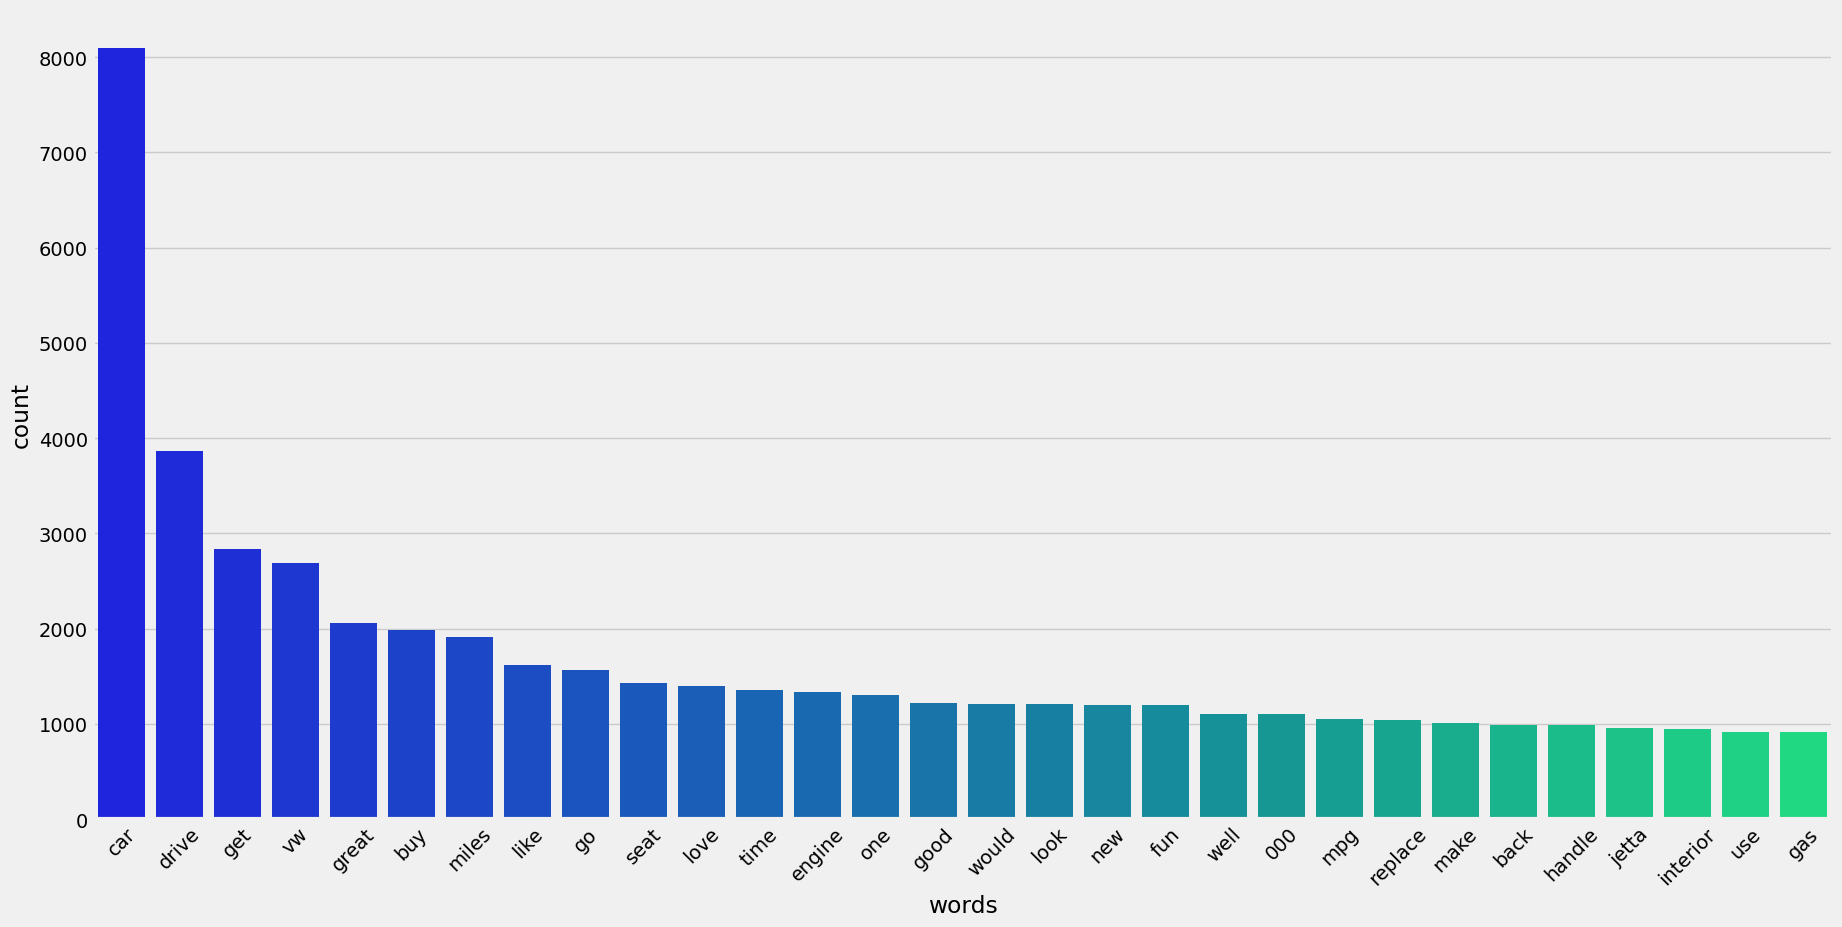

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_vw_pos['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_vw_pos['Review_Clean_List']]
df_vw_pos['Review_Clean'] = list(map(to_string, df_vw_pos['Review_Clean_List']))

# Join all word corpus
review_words_vw = ','.join(list(df_vw_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_vw = Counter(review_words_vw.split())
most_frequent = Counter_vw.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_vw_pos

Vehicle_Title  \
0           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 5M)   
1           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 5M)   
2     2007 Volkswagen New Beetle Convertible Triple White PZEV 2dr Convertible (2....   
3     2007 Volkswagen New Beetle Convertible Triple White 2dr Convertible (2.5L 5c...   
4           2007 Volkswagen New Beetle Convertible 2.5 2dr Convertible (2.5L 5cyl 6A)   
...                                                                               ...   
4081                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4082                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4083                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4084                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
4085                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   

      Rating  \
0      4.375   
1      4.750   
2      5.000   
3      3.750   
4      5.000   
...      ...   
4081   5.000   
4082   4.000   
4083   3.000   
4084   4.000   
4085   4.000   

                                                                          Full Review  \
0     Nice Ragtop My wife chose this car to replace a Sebring convertible.  Wanted...   
1     Luv, luv, luv my dream car 4 of us carpool 1 way 30 min.  Backseat ok for no...   
2     The Best One So Far.... I owned a 2002 SLK and 2003 BMW Z-4.  After spending...   
3     Not for Cold Weather!!! The car is beautiful and performs well in the warm w...   
4     I love my Beetle I love my car.  I previously owned an Explorer, and the two...   
...                                                                               ...   
4081  2016 S I've been leading a 2016 Tiguan S for about a month and so far I am v...   
4082  Good Value I have owned the Tiguan for a year and 4 months.  I bought the Ti...   
4083  Great Ride - But Typical VW Now had 2+ months with SUV.  Nice SUV, handles w...   
4084  Not too big, not too small We have had our 2016 Tiguan for a month. Prior to...   
4085  Good pick for its class The Tiguan S can be had for a reasonable 24k and you...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
4081       pos   
4082       pos   
4083       pos   
4084       pos   
4085       pos   

                                                                    Review_Clean_List  \
0     [nice, ragtop, wife, choose, car, replace, sebring, convertible, want, clutc...   
1     [luv, luv, luv, dream, car, us, carpool, way, 30, min, backseat, ok, normal,...   
2     [best, one, far, 2002, slk, 2003, bmw, spend, fortune, upkeep, two, cars, du...   
3     [cold, weather, car, beautiful, perform, well, warm, weather, much, better, ...   
4     [love, beetle, love, car, previously, explorer, two, difficult, compare, thi...   
...                                                                               ...   
4081  [2016, lead, 2016, tiguan, month, far, happy, stock, stereo, great, rid, dri...   
4082  [good, value, tiguan, year, months, buy, tiguan, want, small, suv, could, ge...   
4083  [great, ride, typical, vw, months, suv, nice, suv, handle, well, accelerate,...   
4084  [big, small, 2016, tiguan, month, prior, trouble, free, 2012, passat, overal...   
4085  [good, pick, class, tiguan, reasonable, 24k, get, pay, average, around, supe...   

                                                                         Review_Clean  
0     nice ragtop wife choose car replace sebring convertible want clutch get old ...  
1     luv luv luv dream car us carpool way 30 min backseat ok normal size gas mile...  
2     best one far 2002 slk 2003 bmw spend fortune upkeep two cars dump buy 2007 c...  
3     cold weather car beautiful perform well warm weather much better fuel jeep w...  
4     love beet

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=12,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_vw_pos = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_vw_pos.fit_transform(df_vw_pos['Review_Clean'])

In [ ]:
topic_model_vw_pos.get_topic_info()

Topic  Count                              Name
0      -1   1959               -1_car_drive_vw_get
1       0    199          0_passat_wagon_car_great
2       1    195      1_beetle_bug_convertible_new
3       2    182             2_great_drive_mpg_car
4       3    149               3_gti_drive_car_fun
5       4    138               4_car_drive_like_vw
6       5    102        5_jetta_car_great_interior
7       6     82            6_tdi_diesel_mpg_drive
8       7     68            7_tdi_jetta_diesel_mpg
9       8     67      8_van_eurovan_minivan_routan
10      9     66           9_tiguan_suv_seat_drive
11     10     60         10_rabbit_drive_bunny_car
12     11     59       11_german_car_quality_price
13     12     56    12_jetta_time_replace_problems
14     13     55         13_seat_interior_back_car
15     14     50     14_repair_warranty_vw_replace
16     15     49         15_touareg_suv_best_great
17     16     47            16_golf_great_vw_power
18     17     43      17_rattle_noise_window_break
19     18     41              18_worst_ever_car_vw
20     19     34        19_eos_top_convertible_fun
21     20     29          20_repair_money_000_time
22     21     28           21_jetta_replace_000_vw
23     22     28            22_golf_tdi_fuel_drive
24     23     27        23_repair_german_years_car
25     24     24           24_passat_oil_engine_vw
26     25     24  25_transmission_shift_clunk_gear
27     26     21           26_gli_drive_sport_tire
28     27     20        27_r32_sti_evo_performance
29     28     19      28_break_replace_shame_light
30     29     19           29_love_car_better_seat
31     30     18            30_gti_tire_drive_year
32     31     16           31_cc_honda_accord_epic
33     32     16              32_lemon_warn_vw_car
34     33     16          33_oil_quart_burn_change
35     34     16              34_fun_car_b5_dealer
36     35     14     35_impact_deploy_airbag_total
37     36     14         36_replace_cost_000_miles
38     37     14    37_phaeton_mercedes_bmw_luxury
39     38     11       38_convertible_top_fun_hair
40     39     11  39_hate_relationship_love_repair

In [ ]:
topic_model_vw_pos.get_topic(0)

[('passat', 0.07245694555856036),
 ('wagon', 0.019938918325522817),
 ('car', 0.01709923460896388),
 ('great', 0.013813114531016095),
 ('love', 0.013505981718690663),
 ('vw', 0.01272194775559841),
 ('drive', 0.012697839299160107),
 ('miles', 0.011683607910531642),
 ('performance', 0.010696148390745175),
 ('get', 0.010654687036299099)]

In [ ]:
# Visualize top topic keywords
topic_model_vw_pos.visualize_barchart()

In [ ]:
topic_model_vw_pos.visualize_topics()

In [ ]:
topic_model_vw_pos.visualize_hierarchy()

In [ ]:
topic_model_vw_pos.visualize_heatmap()

In [ ]:
#bmw

#BMW

## Pos

In [ ]:
df_bmw_pos = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/bmw_pos.csv')

In [ ]:
df_bmw_pos

Review_Date Author_Name  \
0      on 04/10/18 19:01 PM (PDT)   RogerCVC    
1      on 08/08/17 19:30 PM (PDT)    Jacob H    
2      on 02/15/17 10:59 AM (PST)   robert d    
3      on 01/21/17 17:52 PM (PST)        Roy    
4      on 06/09/16 05:11 AM (PDT)       PatD    
...                           ...         ...   
3303   on 11/23/05 23:57 PM (PST)        DKM    
3304   on 11/15/05 01:10 AM (PST)   impreziv    
3305   on 11/03/05 16:59 PM (PST)   Kelly777    
3306   on 03/24/11 11:52 AM (PDT)     m3isme    
3307   on 05/27/10 14:20 PM (PDT)     Walter    

                                                   Vehicle_Title  \
0     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   
1     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   
2         2014 BMW X1 SUV sDrive28i 4dr SUV (2.0L 4cyl Turbo 8A)   
3         2014 BMW X1 SUV sDrive28i 4dr SUV (2.0L 4cyl Turbo 8A)   
4     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   
...                                                          ...   
3303                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   
3304                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   
3305                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   
3306                2010 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   
3307                2010 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   

                                            Review_Title  \
0                                   OK with Reservations   
1                          Worst Purchase I've ever made   
2     owner for two years  .    a   great grocery getter   
3     Great handling vehicle with in need of improvement   
4                        Tak ada fun right out of my BMW   
...                                                  ...   
3303                   Unbelievable Once You See the Car   
3304                   Bow down,  the King has returned!   
3305                                      Worth the wait   
3306                                Critics are too OLD!   
3307                Great uncomfortable car for everyday   

                                                                               Review  \
0      We picked this car as a CPO from a BMW dealer.  No problems to date.  Relat...   
1      1.\tDealership was a joke to work with, lied on two separate occasions abou...   
2      35 mpg on a 3000 mile trip 24+intown in winter        don't like run flat t...   
3      Purchased 2014 X1 fully loaded with M-Sport package. Great handling car wit...   
4      My first BMW and I'm now caught in the Takata airbag mess. BMW felt it was ...   
...                                                                               ...   
3303   The car is stunning and incredible once you see it on the showroom floor an...   
3304   The BMW M5 has always been the leader of the performance sedan class.   Ove...   
3305   Unbelievable car.  SMG and iDrive are far better than I anticipated after r...   
3306   Have used my friends for a month (we traded I have an M3) and it's a great ...   
3307   This is my fifth BMW and third M car. First M5. Ive had 3 series, M3, M5 an...   

      Rating  \
0      3.000   
1      1.000   
2      4.000   
3      4.000   
4      1.000   
...      ...   
3303   5.000   
3304   4.375   
3305   4.625   
3306   4.500   
3307   4.125   

                                                                          Full Review  \
0     OK with Reservations We picked this car as a CPO from a BMW dealer.  No prob...   
1     Worst Purchase I've ever made 1.\tDealership was a joke to work with, lied o...   
2     owner for two years  .    a   great grocery getter 35 mpg on a 3000 mile tri...   
3     Great handling vehicle with in need of improvement Purchased 2014 X1 fully l...   
4     Tak ada fun right out of my BMW My first BMW and I'm now caught in the Takat...   
...                                                                               ...   
3303  Unbe

In [ ]:
df_bmw_pos.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_bmw_pos

Vehicle_Title  Rating  \
0     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   3.000   
1     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   1.000   
2         2014 BMW X1 SUV sDrive28i 4dr SUV (2.0L 4cyl Turbo 8A)   4.000   
3         2014 BMW X1 SUV sDrive28i 4dr SUV (2.0L 4cyl Turbo 8A)   4.000   
4     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   1.000   
...                                                          ...     ...   
3303                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   5.000   
3304                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.375   
3305                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.625   
3306                2010 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.500   
3307                2010 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.125   

                                                                          Full Review  \
0     OK with Reservations We picked this car as a CPO from a BMW dealer.  No prob...   
1     Worst Purchase I've ever made 1.\tDealership was a joke to work with, lied o...   
2     owner for two years  .    a   great grocery getter 35 mpg on a 3000 mile tri...   
3     Great handling vehicle with in need of improvement Purchased 2014 X1 fully l...   
4     Tak ada fun right out of my BMW My first BMW and I'm now caught in the Takat...   
...                                                                               ...   
3303  Unbelievable Once You See the Car The car is stunning and incredible once yo...   
3304  Bow down,  the King has returned! The BMW M5 has always been the leader of t...   
3305  Worth the wait Unbelievable car.  SMG and iDrive are far better than I antic...   
3306  Critics are too OLD! Have used my friends for a month (we traded I have an M...   
3307  Great uncomfortable car for everyday This is my fifth BMW and third M car. F...   

     sentiment  
0          pos  
1          pos  
2          pos  
3          pos  
4          pos  
...        ...  
3303       pos  
3304       pos  
3305       pos  
3306       pos  
3307       pos  

[3308 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_bmw_pos['Review_Clean_List'] = list(map(text_preprocessing, df_bmw_pos['Full Review']))

# Return to string with to_string function
df_bmw_pos['Review_Clean'] = list(map(to_string, df_bmw_pos['Review_Clean_List']))

In [ ]:
df_bmw_pos

Vehicle_Title  Rating  \
0     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   3.000   
1     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   1.000   
2         2014 BMW X1 SUV sDrive28i 4dr SUV (2.0L 4cyl Turbo 8A)   4.000   
3         2014 BMW X1 SUV sDrive28i 4dr SUV (2.0L 4cyl Turbo 8A)   4.000   
4     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   1.000   
...                                                          ...     ...   
3303                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   5.000   
3304                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.375   
3305                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.625   
3306                2010 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.500   
3307                2010 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.125   

                                                                          Full Review  \
0     OK with Reservations We picked this car as a CPO from a BMW dealer.  No prob...   
1     Worst Purchase I've ever made 1.\tDealership was a joke to work with, lied o...   
2     owner for two years  .    a   great grocery getter 35 mpg on a 3000 mile tri...   
3     Great handling vehicle with in need of improvement Purchased 2014 X1 fully l...   
4     Tak ada fun right out of my BMW My first BMW and I'm now caught in the Takat...   
...                                                                               ...   
3303  Unbelievable Once You See the Car The car is stunning and incredible once yo...   
3304  Bow down,  the King has returned! The BMW M5 has always been the leader of t...   
3305  Worth the wait Unbelievable car.  SMG and iDrive are far better than I antic...   
3306  Critics are too OLD! Have used my friends for a month (we traded I have an M...   
3307  Great uncomfortable car for everyday This is my fifth BMW and third M car. F...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
3303       pos   
3304       pos   
3305       pos   
3306       pos   
3307       pos   

                                                                    Review_Clean_List  \
0     [ok, with, reservations, we, pick, this, car, as, cpo, from, bmw, dealer, no...   
1     [worst, purchase, have, ever, make, dealership, be, joke, to, work, with, li...   
2     [owner, for, two, years, great, grocery, getter, 35, mpg, on, 3000, mile, tr...   
3     [great, handle, vehicle, with, in, need, of, improvement, purchase, 2014, x1...   
4     [tak, ada, fun, right, out, of, my, bmw, my, first, bmw, and, be, now, catch...   
...                                                                               ...   
3303  [unbelievable, once, you, see, the, car, the, car, be, stun, and, incredible...   
3304  [bow, down, the, king, have, return, the, bmw, m5, have, always, be, the, le...   
3305  [worth, the, wait, unbelievable, car, smg, and, idrive, be, far, better, tha...   
3306  [critics, be, too, old, have, use, my, friends, for, month, we, trade, have,...   
3307  [great, uncomfortable, car, for, everyday, this, be, my, fifth, bmw, and, th...   

                                                                         Review_Clean  
0     ok with reservations we pick this car as cpo from bmw dealer no problems to ...  
1     worst purchase have ever make dealership be joke to work with lie on two sep...  
2     owner for two years great grocery getter 35 mpg on 3000 mile trip 24 intown ...  
3     great handle vehicle with in need of improvement purchase 2014 x1 fully load...  
4     tak ada fun right out of my bmw my first bmw and be now catch in the takata ...  
...                                                                               ...  
3303  unbelievable once you see the car the car be stun and incredible once you se...  
3304  bow down the king have return the bmw m5 have always be the leader of the

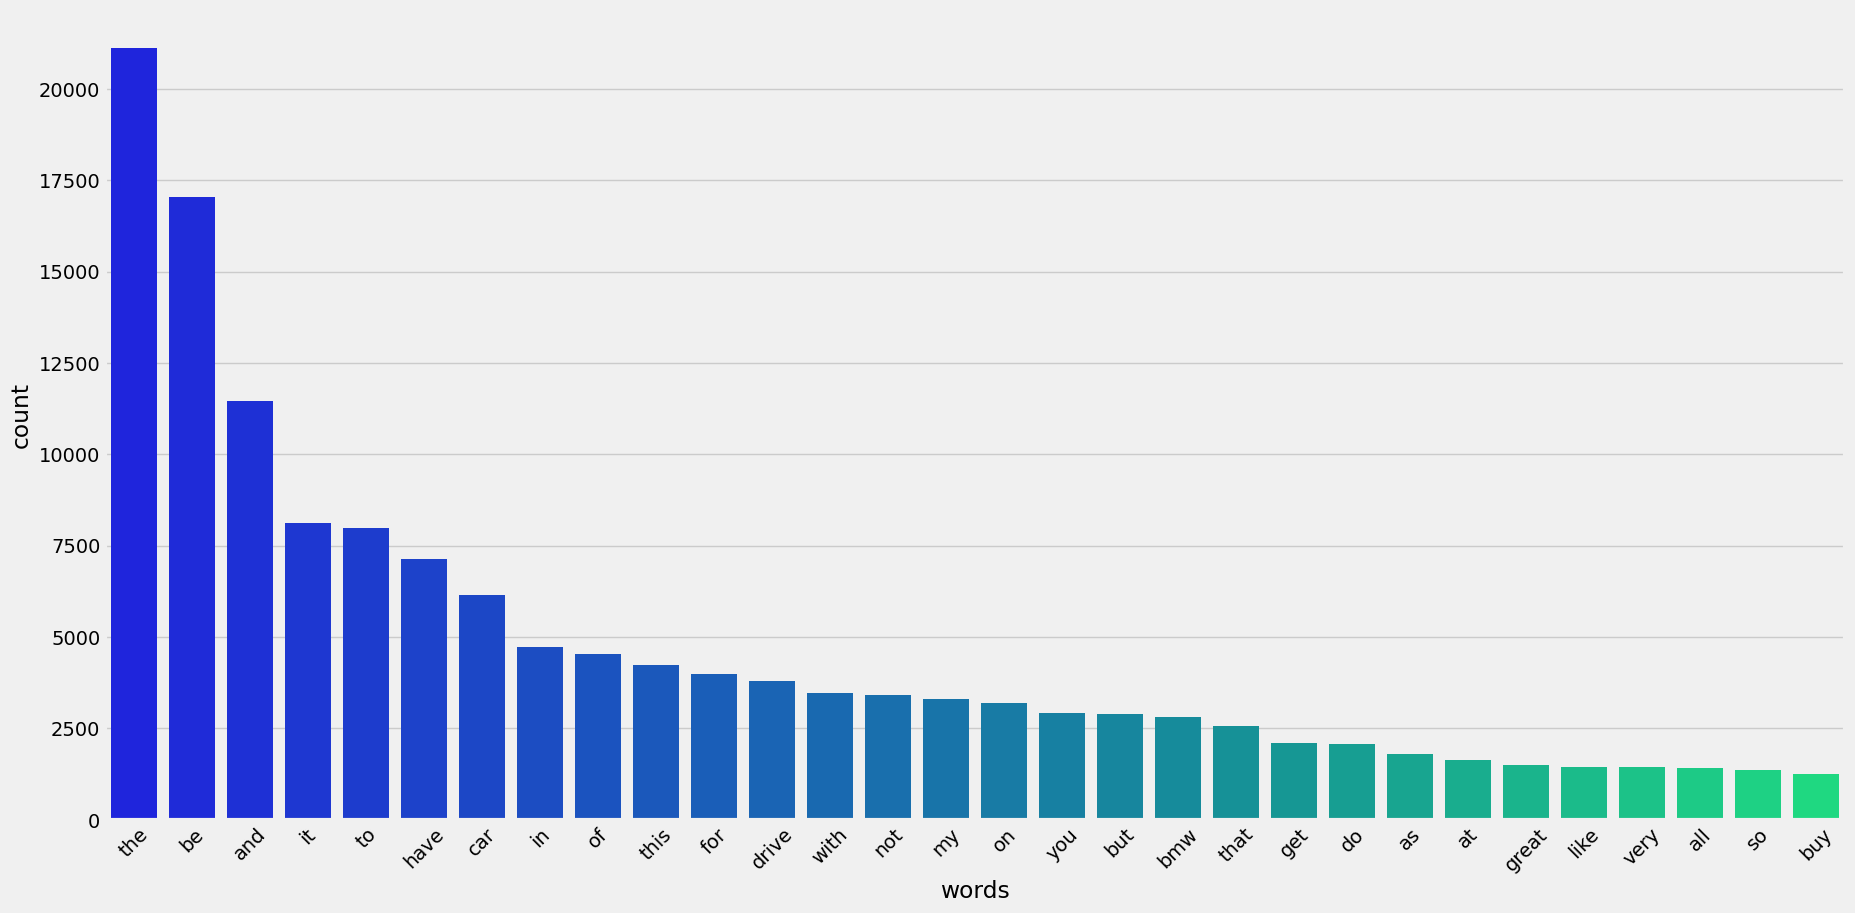

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_bmw = ','.join(list(df_bmw_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_bmw = Counter(review_words_bmw.split())
most_frequent = Counter_bmw.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'get'),
  Text(4, 0, 'great'),
  Text(5, 0, 'like'),
  Text(6, 0, 'buy'),
  Text(7, 0, 'handle'),
  Text(8, 0, 'one'),
  Text(9, 0, 'miles'),
  Text(10, 0, 'look'),
  Text(11, 0, 'love'),
  Text(12, 0, 'go'),
  Text(13, 0, 'seat'),
  Text(14, 0, 'sport'),
  Text(15, 0, 'time'),
  Text(16, 0, 'fun'),
  Text(17, 0, 'new'),
  Text(18, 0, 'use'),
  Text(19, 0, 'would'),
  Text(20, 0, 'make'),
  Text(21, 0, 'feel'),
  Text(22, 0, 'well'),
  Text(23, 0, 'good'),
  Text(24, 0, 'much'),
  Text(25, 0, 'engine'),
  Text(26, 0, 'better'),
  Text(27, 0, 'vehicle'),
  Text(28, 0, 'still'),
  Text(29, 0, 'power')])

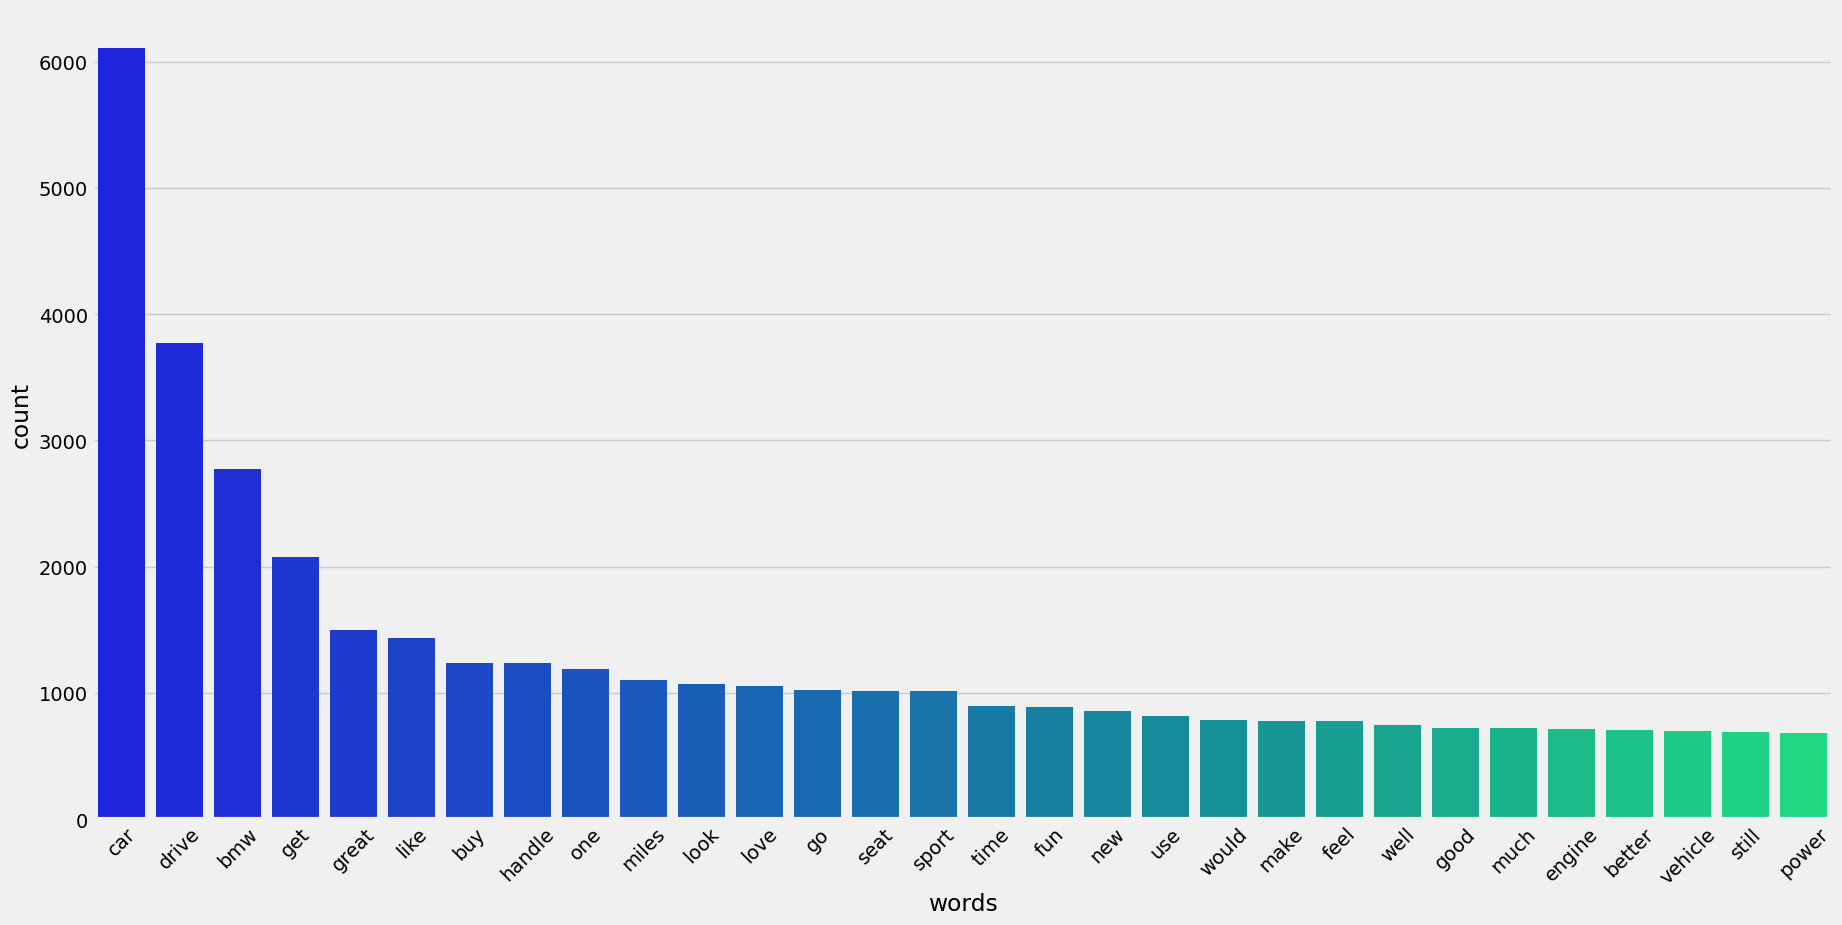

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_bmw_pos['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_bmw_pos['Review_Clean_List']]
df_bmw_pos['Review_Clean'] = list(map(to_string, df_bmw_pos['Review_Clean_List']))

# Join all word corpus
review_words_bmw = ','.join(list(df_bmw_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_bmw = Counter(review_words_bmw.split())
most_frequent = Counter_bmw.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_bmw_pos

Vehicle_Title  Rating  \
0     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   3.000   
1     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   1.000   
2         2014 BMW X1 SUV sDrive28i 4dr SUV (2.0L 4cyl Turbo 8A)   4.000   
3         2014 BMW X1 SUV sDrive28i 4dr SUV (2.0L 4cyl Turbo 8A)   4.000   
4     2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   1.000   
...                                                          ...     ...   
3303                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   5.000   
3304                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.375   
3305                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.625   
3306                2010 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.500   
3307                2010 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.125   

                                                                          Full Review  \
0     OK with Reservations We picked this car as a CPO from a BMW dealer.  No prob...   
1     Worst Purchase I've ever made 1.\tDealership was a joke to work with, lied o...   
2     owner for two years  .    a   great grocery getter 35 mpg on a 3000 mile tri...   
3     Great handling vehicle with in need of improvement Purchased 2014 X1 fully l...   
4     Tak ada fun right out of my BMW My first BMW and I'm now caught in the Takat...   
...                                                                               ...   
3303  Unbelievable Once You See the Car The car is stunning and incredible once yo...   
3304  Bow down,  the King has returned! The BMW M5 has always been the leader of t...   
3305  Worth the wait Unbelievable car.  SMG and iDrive are far better than I antic...   
3306  Critics are too OLD! Have used my friends for a month (we traded I have an M...   
3307  Great uncomfortable car for everyday This is my fifth BMW and third M car. F...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
3303       pos   
3304       pos   
3305       pos   
3306       pos   
3307       pos   

                                                                    Review_Clean_List  \
0     [ok, reservations, pick, car, cpo, bmw, dealer, problems, date, relatively, ...   
1     [worst, purchase, ever, make, dealership, joke, work, lie, two, separate, oc...   
2     [owner, two, years, great, grocery, getter, 35, mpg, 3000, mile, trip, 24, i...   
3     [great, handle, vehicle, need, improvement, purchase, 2014, x1, fully, load,...   
4     [tak, ada, fun, right, bmw, first, bmw, catch, takata, airbag, mess, bmw, fe...   
...                                                                               ...   
3303  [unbelievable, see, car, car, stun, incredible, see, showroom, floor, actual...   
3304  [bow, king, return, bmw, m5, always, leader, performance, sedan, class, over...   
3305  [worth, wait, unbelievable, car, smg, idrive, far, better, anticipate, read,...   
3306  [critics, old, use, friends, month, trade, m3, great, car, many, complaints,...   
3307  [great, uncomfortable, car, everyday, fifth, bmw, third, car, first, m5, ive...   

                                                                         Review_Clean  
0     ok reservations pick car cpo bmw dealer problems date relatively decent hand...  
1     worst purchase ever make dealership joke work lie two separate occasion friv...  
2     owner two years great grocery getter 35 mpg 3000 mile trip 24 intown winter ...  
3     great handle vehicle need improvement purchase 2014 x1 fully load sport pack...  
4     tak ada fun right bmw first bmw catch takata airbag mess bmw felt safe enoug...  
...                                                                               ...  
3303  unbelievable see car car stun incredible see showroom floor actually take dr...  
3304  bow king return bmw m5 always leader performance sedan class overall powe

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_bmw_pos = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_bmw_pos.fit_transform(df_bmw_pos['Review_Clean'])

In [ ]:
topic_model_bmw_pos.get_topic_info()

Topic  Count                                  Name
0      -1   1674                  -1_car_drive_bmw_get
1       0    528               0_car_replace_bmw_miles
2       1    211                    1_x5_suv_x3_diesel
3       2     99                   2_car_bmw_drive_get
4       3     97                     3_z4_z3_top_drive
5       4     97          4_machine_ultimate_drive_car
6       5     92                  5_328i_bmw_car_sport
7       6     61                 6_fun_car_drive_great
8       7     58            7_bmw_convertible_seat_car
9       8     50               8_m3_smg_m6_convertible
10      9     45                 9_bmw_great_first_fun
11     10     34                 10_car_love_get_drive
12     11     26                11_drive_535i_528i_car
13     12     26             12_wagon_sedan_wagons_dog
14     13     25              13_handle_best_great_car
15     14     23            14_740il_750li_740i_series
16     15     21             15_m5_e39_e46_performance
17     16     18          16_bimmer_love_still_trouble
18     17     18  17_autobahn_munich_european_delivery
19     18     17              18_mpg_gas_mileage_miles
20     19     16           19_build_bmw_series_quality
21     20     14   20_m5_2006_performance_capabilities
22     21     13               21_dream_true_come_kill
23     22     12             22_cpo_warranty_solid_car
24     23     12      23_suspension_ride_perfect_sound
25     24     11                  24_wife_car_love_say
26     25     10            25_price_worth_cheap_drive

In [ ]:
topic_model_bmw_pos.get_topic(0)

[('car', 0.02438530846857888),
 ('replace', 0.023674974207607554),
 ('bmw', 0.022783665154001875),
 ('miles', 0.022435154095297484),
 ('buy', 0.020399529603371873),
 ('repair', 0.0197974449078478),
 ('problems', 0.01666617489997104),
 ('warranty', 0.016176394950033122),
 ('000', 0.016133216291110055),
 ('time', 0.015987540892054373)]

In [ ]:
# Visualize top topic keywords
topic_model_bmw_pos.visualize_barchart()

In [ ]:
topic_model_bmw_pos.visualize_topics()

In [ ]:
topic_model_bmw_pos.visualize_hierarchy()

In [ ]:
topic_model_bmw_pos.visualize_heatmap()

In [ ]:
# Volvo

In [ ]:
#volvo

# Volvo

## Pos

In [ ]:
df_volvo_pos = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/volvo_pos.csv')

In [ ]:
df_volvo_pos

Review_Date       Author_Name  \
0      on 05/16/12 11:58 AM (PDT)     2xvolvoowner    
1      on 08/29/10 08:28 AM (PDT)          aikiman    
2      on 01/15/08 16:37 PM (PST)        4th volvo    
3      on 11/01/07 19:27 PM (PDT)          Mc Mom     
4      on 12/27/11 21:49 PM (PST)           mooser    
...                           ...               ...   
2036   on 06/22/09 17:03 PM (PDT)  SAAB 9-2X owner    
2037   on 05/20/09 05:13 AM (PDT)          old guy    
2038   on 05/02/09 20:12 PM (PDT)    New C30 Owner    
2039   on 01/14/09 04:53 AM (PST)               wm    
2040   on 12/26/08 15:35 PM (PST)            Colin    

                                                                Vehicle_Title  \
0                    2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
1                    2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
2                2008 Volvo S60 Sedan 2.5T 4dr Sedan AWD (2.5L 5cyl Turbo 5A)   
3                      2008 Volvo S60 Sedan T5 4dr Sedan (2.4L 5cyl Turbo 5A)   
4                       2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
...                                                                       ...   
2036  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2037           2009 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2038  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2039  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2040  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   

                                 Review_Title  \
0                              Double trouble   
1                                 First Volvo   
2     Will absence make my heart grow fonder?   
3              Not a minivan - thank goodness   
4                   For a Type R Personality    
...                                       ...   
2036                      C30 T5 R-Design WOW   
2037                                 A Beauty   
2038                           Love this car!   
2039                                  Fun Car   
2040                        One rockin' hatch   

                                                                               Review  \
0      We own both the XC90 and S60and have been frustrated with both vehicles.Bot...   
1      This is my first Volvo, had an Acura and Maxima before this.  I've had this...   
2      This is my fourth Volvo, so I guess I am brand loyal.  The AWD is awesome. ...   
3      This car is fun to drive and is just beautiful to look at. It's great for d...   
4      In a matter of a second my fuel sipping, turbo spooling Saab, as well as my...   
...                                                                               ...   
2036   I currently own and drive an '05 SAAB 9-2X Aero loaded with everything spor...   
2037   Turbo w/ 6sp manual is terrific getting shade over 26mpg.  Solid ride, nimb...   
2038   Not the fastest thing out there, but no slouch.  Nice balance between comfo...   
2039   Caveat this review with the fact I've only owned the car for a week, and I'...   
2040   Great all-around car, exceptionally well-executed and excels at what it was...   

      Rating  \
0      3.125   
1      4.625   
2      4.125   
3      4.750   
4      4.500   
...      ...   
2036   4.750   
2037   5.000   
2038   4.750   
2039   4.875   
2040   4.875   

                                                                          Full Review  \
0     Double trouble We own both the XC90 and S60and have been frustrated with bot...   
1     First Volvo This is my first Volvo, had an Acura and Maxima before this.  I'...   
2     Will absence make my heart grow fonder? This is my fourth Volvo, so I guess ...   
3     Not a minivan - thank goodness This car is fun to drive and is just beautifu...   
4     For a Type R Personality  In a matter of a second my fuel sipping, turbo spo...   
...

In [ ]:
df_volvo_pos.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_volvo_pos

Vehicle_Title  \
0                    2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
1                    2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
2                2008 Volvo S60 Sedan 2.5T 4dr Sedan AWD (2.5L 5cyl Turbo 5A)   
3                      2008 Volvo S60 Sedan T5 4dr Sedan (2.4L 5cyl Turbo 5A)   
4                       2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
...                                                                       ...   
2036  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2037           2009 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2038  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2039  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2040  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   

      Rating  \
0      3.125   
1      4.625   
2      4.125   
3      4.750   
4      4.500   
...      ...   
2036   4.750   
2037   5.000   
2038   4.750   
2039   4.875   
2040   4.875   

                                                                          Full Review  \
0     Double trouble We own both the XC90 and S60and have been frustrated with bot...   
1     First Volvo This is my first Volvo, had an Acura and Maxima before this.  I'...   
2     Will absence make my heart grow fonder? This is my fourth Volvo, so I guess ...   
3     Not a minivan - thank goodness This car is fun to drive and is just beautifu...   
4     For a Type R Personality  In a matter of a second my fuel sipping, turbo spo...   
...                                                                               ...   
2036  C30 T5 R-Design WOW I currently own and drive an '05 SAAB 9-2X Aero loaded w...   
2037  A Beauty Turbo w/ 6sp manual is terrific getting shade over 26mpg.  Solid ri...   
2038  Love this car! Not the fastest thing out there, but no slouch.  Nice balance...   
2039  Fun Car Caveat this review with the fact I've only owned the car for a week,...   
2040  One rockin' hatch Great all-around car, exceptionally well-executed and exce...   

     sentiment  
0          pos  
1          pos  
2          pos  
3          pos  
4          pos  
...        ...  
2036       pos  
2037       pos  
2038       pos  
2039       pos  
2040       pos  

[2041 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_volvo_pos['Review_Clean_List'] = list(map(text_preprocessing, df_volvo_pos['Full Review']))

# Return to string with to_string function
df_volvo_pos['Review_Clean'] = list(map(to_string, df_volvo_pos['Review_Clean_List']))

In [ ]:
df_volvo_pos

Vehicle_Title  \
0                    2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
1                    2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
2                2008 Volvo S60 Sedan 2.5T 4dr Sedan AWD (2.5L 5cyl Turbo 5A)   
3                      2008 Volvo S60 Sedan T5 4dr Sedan (2.4L 5cyl Turbo 5A)   
4                       2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
...                                                                       ...   
2036  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2037           2009 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2038  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2039  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2040  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   

      Rating  \
0      3.125   
1      4.625   
2      4.125   
3      4.750   
4      4.500   
...      ...   
2036   4.750   
2037   5.000   
2038   4.750   
2039   4.875   
2040   4.875   

                                                                          Full Review  \
0     Double trouble We own both the XC90 and S60and have been frustrated with bot...   
1     First Volvo This is my first Volvo, had an Acura and Maxima before this.  I'...   
2     Will absence make my heart grow fonder? This is my fourth Volvo, so I guess ...   
3     Not a minivan - thank goodness This car is fun to drive and is just beautifu...   
4     For a Type R Personality  In a matter of a second my fuel sipping, turbo spo...   
...                                                                               ...   
2036  C30 T5 R-Design WOW I currently own and drive an '05 SAAB 9-2X Aero loaded w...   
2037  A Beauty Turbo w/ 6sp manual is terrific getting shade over 26mpg.  Solid ri...   
2038  Love this car! Not the fastest thing out there, but no slouch.  Nice balance...   
2039  Fun Car Caveat this review with the fact I've only owned the car for a week,...   
2040  One rockin' hatch Great all-around car, exceptionally well-executed and exce...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
2036       pos   
2037       pos   
2038       pos   
2039       pos   
2040       pos   

                                                                    Review_Clean_List  \
0     [double, trouble, we, own, both, the, xc90, and, s60and, have, be, frustrate...   
1     [first, volvo, this, be, my, first, volvo, have, an, acura, and, maxima, bef...   
2     [will, absence, make, my, heart, grow, fonder, this, be, my, fourth, volvo, ...   
3     [not, minivan, thank, goodness, this, car, be, fun, to, drive, and, be, just...   
4     [for, type, personality, in, matter, of, second, my, fuel, sip, turbo, spool...   
...                                                                               ...   
2036  [c30, t5, design, wow, currently, own, and, drive, an, 05, saab, 2x, aero, l...   
2037  [beauty, turbo, 6sp, manual, be, terrific, get, shade, over, 26mpg, solid, r...   
2038  [love, this, car, not, the, fastest, thing, out, there, but, no, slouch, nic...   
2039  [fun, car, caveat, this, review, with, the, fact, have, only, own, the, car,...   
2040  [one, rockin, hatch, great, all, around, car, exceptionally, well, execute, ...   

                                                                         Review_Clean  
0     double trouble we own both the xc90 and s60and have be frustrate with both v...  
1     first volvo this be my first volvo have an acura and maxima before this have...  
2     will absence make my heart grow fonder this be my fourth volvo so guess be b...  
3     not minivan thank goodness this car be fun to drive and be just beautiful to...  
4     for type personality in matter of second my fuel sip turbo spool saab as wel...  
...            

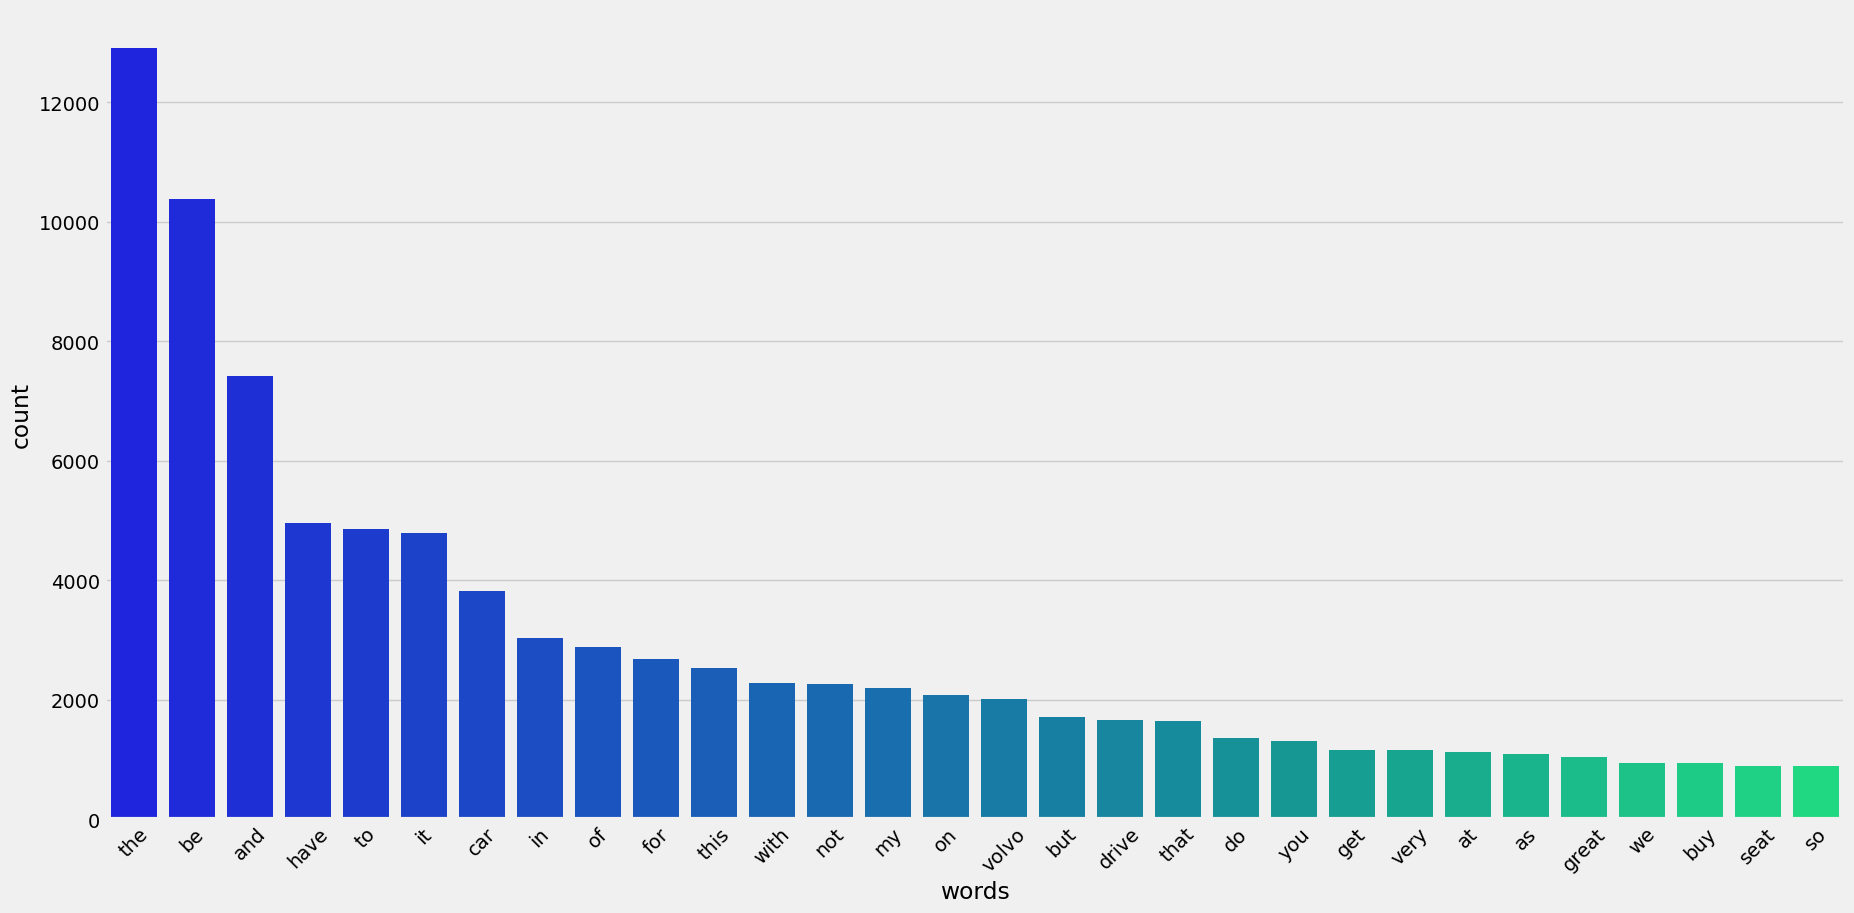

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_volvo = ','.join(list(df_volvo_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_volvo = Counter(review_words_volvo.split())
most_frequent = Counter_volvo.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'volvo'),
  Text(2, 0, 'drive'),
  Text(3, 0, 'get'),
  Text(4, 0, 'great'),
  Text(5, 0, 'buy'),
  Text(6, 0, 'seat'),
  Text(7, 0, 'miles'),
  Text(8, 0, 'like'),
  Text(9, 0, 'look'),
  Text(10, 0, 'go'),
  Text(11, 0, 'would'),
  Text(12, 0, 'one'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'time'),
  Text(16, 0, 'use'),
  Text(17, 0, 'comfortable'),
  Text(18, 0, 'new'),
  Text(19, 0, 'well'),
  Text(20, 0, 'vehicle'),
  Text(21, 0, 'engine'),
  Text(22, 0, 'replace'),
  Text(23, 0, 'make'),
  Text(24, 0, 'back'),
  Text(25, 0, 'feel'),
  Text(26, 0, '000'),
  Text(27, 0, 'better'),
  Text(28, 0, 'handle'),
  Text(29, 0, 'years')])

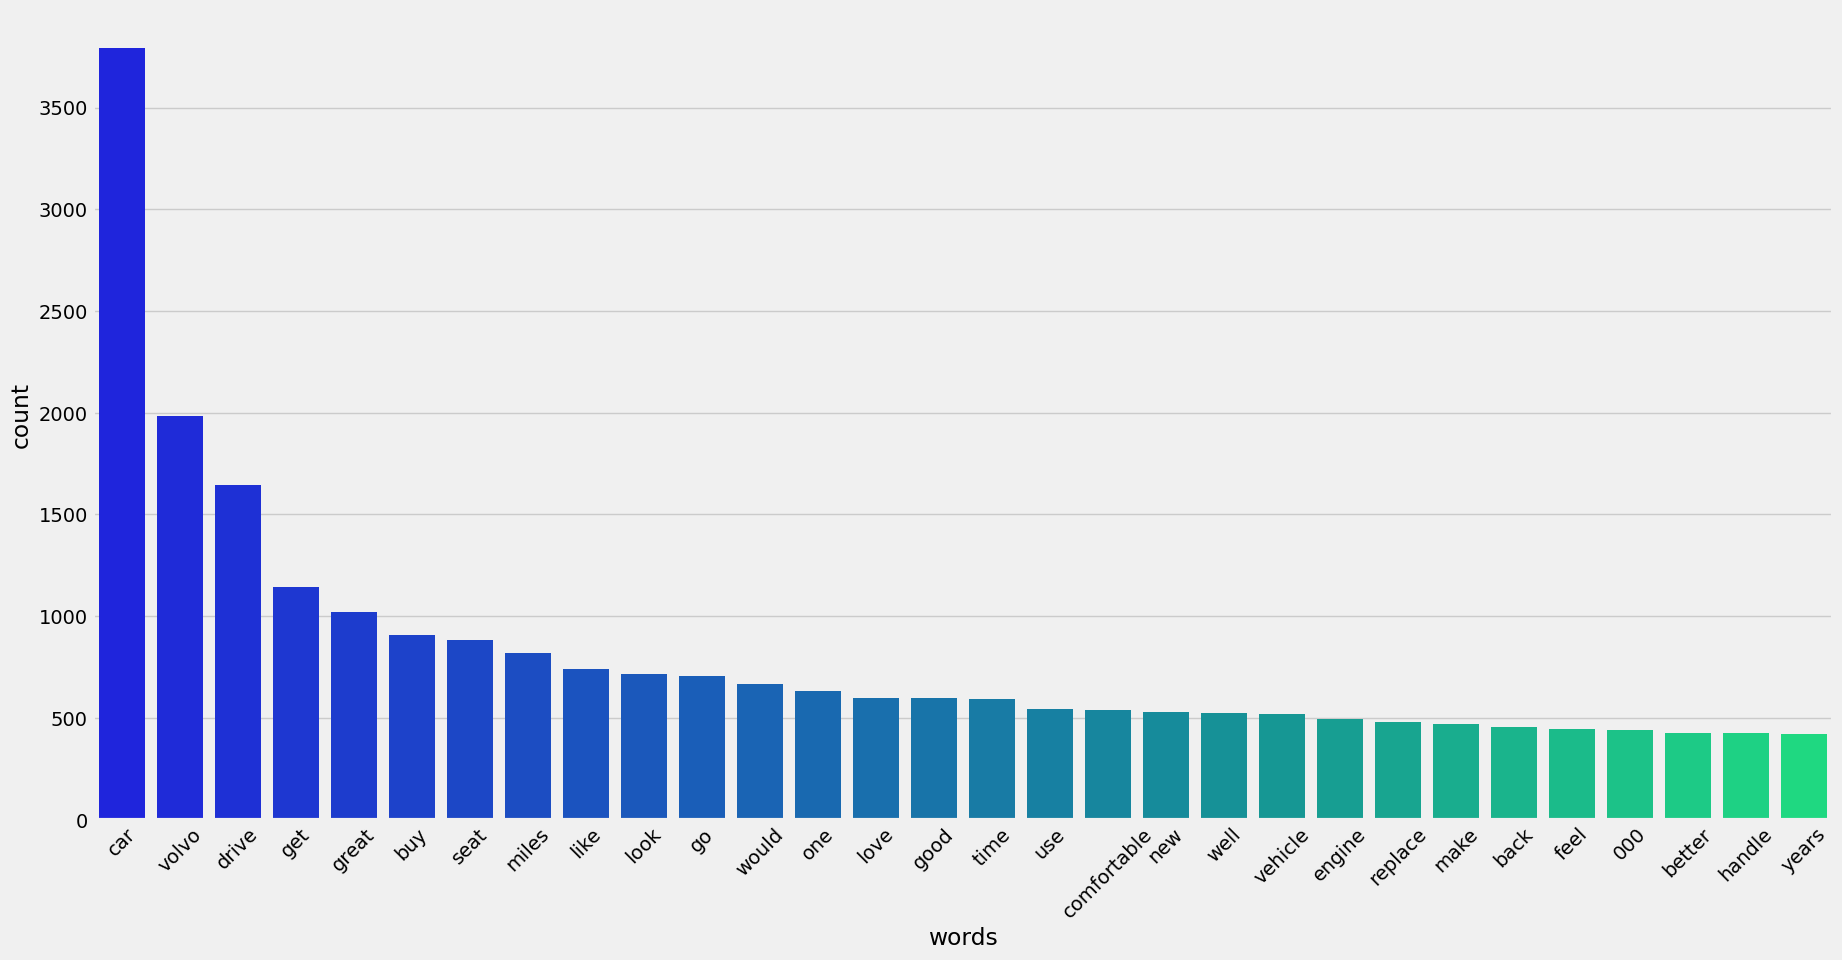

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_volvo_pos['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_volvo_pos['Review_Clean_List']]
df_volvo_pos['Review_Clean'] = list(map(to_string, df_volvo_pos['Review_Clean_List']))

# Join all word corpus
review_words_volvo = ','.join(list(df_volvo_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_volvo = Counter(review_words_volvo.split())
most_frequent = Counter_volvo.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_volvo_pos

Vehicle_Title  \
0                    2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
1                    2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
2                2008 Volvo S60 Sedan 2.5T 4dr Sedan AWD (2.5L 5cyl Turbo 5A)   
3                      2008 Volvo S60 Sedan T5 4dr Sedan (2.4L 5cyl Turbo 5A)   
4                       2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
...                                                                       ...   
2036  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2037           2009 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2038  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2039  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
2040  2009 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   

      Rating  \
0      3.125   
1      4.625   
2      4.125   
3      4.750   
4      4.500   
...      ...   
2036   4.750   
2037   5.000   
2038   4.750   
2039   4.875   
2040   4.875   

                                                                          Full Review  \
0     Double trouble We own both the XC90 and S60and have been frustrated with bot...   
1     First Volvo This is my first Volvo, had an Acura and Maxima before this.  I'...   
2     Will absence make my heart grow fonder? This is my fourth Volvo, so I guess ...   
3     Not a minivan - thank goodness This car is fun to drive and is just beautifu...   
4     For a Type R Personality  In a matter of a second my fuel sipping, turbo spo...   
...                                                                               ...   
2036  C30 T5 R-Design WOW I currently own and drive an '05 SAAB 9-2X Aero loaded w...   
2037  A Beauty Turbo w/ 6sp manual is terrific getting shade over 26mpg.  Solid ri...   
2038  Love this car! Not the fastest thing out there, but no slouch.  Nice balance...   
2039  Fun Car Caveat this review with the fact I've only owned the car for a week,...   
2040  One rockin' hatch Great all-around car, exceptionally well-executed and exce...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
2036       pos   
2037       pos   
2038       pos   
2039       pos   
2040       pos   

                                                                    Review_Clean_List  \
0     [double, trouble, xc90, s60and, frustrate, vehicles, see, fair, share, servi...   
1     [first, volvo, first, volvo, acura, maxima, car, approx, 18, mos, buy, use, ...   
2     [absence, make, heart, grow, fonder, fourth, volvo, guess, brand, loyal, awd...   
3     [minivan, thank, goodness, car, fun, drive, beautiful, look, great, drive, k...   
4     [type, personality, matter, second, fuel, sip, turbo, spool, saab, well, ego...   
...                                                                               ...   
2036  [c30, t5, design, wow, currently, drive, 05, saab, 2x, aero, load, everythin...   
2037  [beauty, turbo, 6sp, manual, terrific, get, shade, 26mpg, solid, ride, nimbl...   
2038  [love, car, fastest, thing, slouch, nice, balance, comfort, performance, dai...   
2039  [fun, car, caveat, review, fact, car, week, still, buzz, buy, manual, incred...   
2040  [one, rockin, hatch, great, around, car, exceptionally, well, execute, excel...   

                                                                         Review_Clean  
0     double trouble xc90 s60and frustrate vehicles see fair share service departm...  
1     first volvo first volvo acura maxima car approx 18 mos buy use 9500 miles lo...  
2     absence make heart grow fonder fourth volvo guess brand loyal awd awesome ca...  
3     minivan thank goodness car fun drive beautiful look great drive kid around e...  
4     type personality matter second fuel sip turbo spool saab well ego plow short...  
...            

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_volvo_pos = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_volvo_pos.fit_transform(df_volvo_pos['Review_Clean'])

In [ ]:
topic_model_volvo_pos.get_topic_info()

Topic  Count                                  Name
0      -1    851              -1_car_volvo_drive_great
1       0    319               0_volvo_car_great_drive
2       1    187          1_volvo_problems_replace_car
3       2    169                 2_xc90_suv_xc70_drive
4       3    129                3_great_car_seat_drive
5       4     74                 4_car_volvo_drive_get
6       5     51                      5_awd_t5_s60_car
7       6     46                 6_s40_car_volvo_great
8       7     45               7_car_miles_repair_tire
9       8     41                 8_wagon_car_drive_fun
10      9     28    9_c70_top_convertible_convertibles
11     10     25              10_replace_car_light_fix
12     11     20                11_car_like_drive_seat
13     12     17  12_transmission_miles_problems_volvo
14     13     16               13_safe_volvo_drive_v70
15     14     12                14_c30_civic_love_2008
16     15     11           15_problems_volvo_car_minor

In [ ]:
topic_model_volvo_pos.get_topic(12)

[('transmission', 0.12835733534359373),
 ('miles', 0.053881258003349315),
 ('problems', 0.04389734748992589),
 ('volvo', 0.04021413784089406),
 ('000', 0.035481598657717515),
 ('issue', 0.033080315201645775),
 ('car', 0.032907292448548404),
 ('buy', 0.03226532406462972),
 ('replacement', 0.030814891624917903),
 ('new', 0.029823200084288893)]

In [ ]:
# Visualize top topic keywords
topic_model_volvo_pos.visualize_barchart()

In [ ]:
topic_model_volvo_pos.visualize_topics()

In [ ]:
topic_model_volvo_pos.visualize_hierarchy()

In [ ]:
topic_model_volvo_pos.visualize_heatmap()

# Infiniti

## Pos

In [ ]:
df_infi_pos = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/infinit_pos.csv')

In [ ]:
df_infi_pos

Review_Date          Author_Name  \
0      on 05/13/17 05:46 AM (PDT)                 Ron    
1      on 10/10/17 10:05 AM (PDT)                  HD    
2      on 11/28/15 19:50 PM (PST)         Dana Denton    
3      on 08/31/18 06:45 AM (PDT)               Aaron    
4      on 05/25/18 08:48 AM (PDT)          DS Russell    
...                           ...                  ...   
1812   on 10/14/15 21:28 PM (PDT)                 tap    
1813   on 07/16/15 09:21 AM (PDT)  Infiniti Q60 Rocks    
1814   on 08/25/14 16:14 PM (PDT)             rich323    
1815   on 07/21/16 18:21 PM (PDT)               Jorge    
1816   on 03/16/16 13:05 PM (PDT)             Chrissy    

                                                       Vehicle_Title  \
0                  2017 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
1                  2014 INFINITI QX70 SUV 4dr SUV AWD (5.0L 8cyl 7A)   
2                  2014 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
3                  2016 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
4                  2015 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
...                                                              ...   
1812      2014 INFINITI Q60 Coupe Coupe 2dr Coupe AWD (3.7L 6cyl 7A)   
1813  2014 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)   
1814  2014 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)   
1815    2015 INFINITI Q60 Coupe Coupe Sport 2dr Coupe (3.7L 6cyl 6M)   
1816  2015 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)   

                                   Review_Title  \
0                   Love the look. Hate the car   
1      Fastest naturally aspirated SUV (still!)   
2                                3rd Time Buyer   
3                          Overall good quality   
4                               Big, Sporty SUV   
...                                         ...   
1812             Fun to drive reliable vehicle!   
1813             Best Sport Coupe for the Money   
1814  Q60 - What You Should Know Before You Buy   
1815                Excellent Car - Great Value   
1816                                  Lemon law   

                                                                               Review  \
0      Ride is stiff. rattles my dentures. No room in the rear. I'm a big guy so t...   
1      0-60 in 4.8 seconds.  *This* is the first stat potential FX50 or V8 QX70 ow...   
2      This is my third Infinity. Two x35's and now the X70. Obviously,  I love th...   
3      My QX70 came with AWD and Premium Package. I find the front seating and rid...   
4      I looked at a used QX70 in comparison to a QX50.  Was originally looking at...   
...                                                                               ...   
1812   Leased this vehicle in AWD about a year ago. Have never had a problem with ...   
1813   I am writing this review, because the other review said that he was only ge...   
1814   2014 Q60 Journey - I generally agree with the Edmunds review, however, ther...   
1815   After 105K miles and 7 1/2 years of ownership, it was time to change my bel...   
1816   Filed lemon law and switched to Cadillac ATS coupe 3.6 because I can't deal...   

      Rating  \
0        4.0   
1        5.0   
2        5.0   
3        5.0   
4        3.0   
...      ...   
1812     4.0   
1813     4.0   
1814     2.0   
1815     5.0   
1816     1.0   

                                                                          Full Review  \
0     Love the look. Hate the car Ride is stiff. rattles my dentures. No room in t...   
1     Fastest naturally aspirated SUV (still!) 0-60 in 4.8 seconds.  *This* is the...   
2     3rd Time Buyer This is my third Infinity. Two x35's and now the X70. Obvious...   
3     Overall good quality My QX70 came with AWD and Premium Package. I find the f...   
4     Big, Sporty SUV I looked at a used QX70 in comparison to a QX50.  Was origin...   
...                                                

In [ ]:
df_infi_pos.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_infi_pos

Vehicle_Title  Rating  \
0                  2017 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     4.0   
1                  2014 INFINITI QX70 SUV 4dr SUV AWD (5.0L 8cyl 7A)     5.0   
2                  2014 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     5.0   
3                  2016 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     5.0   
4                  2015 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     3.0   
...                                                              ...     ...   
1812      2014 INFINITI Q60 Coupe Coupe 2dr Coupe AWD (3.7L 6cyl 7A)     4.0   
1813  2014 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)     4.0   
1814  2014 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)     2.0   
1815    2015 INFINITI Q60 Coupe Coupe Sport 2dr Coupe (3.7L 6cyl 6M)     5.0   
1816  2015 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)     1.0   

                                                                          Full Review  \
0     Love the look. Hate the car Ride is stiff. rattles my dentures. No room in t...   
1     Fastest naturally aspirated SUV (still!) 0-60 in 4.8 seconds.  *This* is the...   
2     3rd Time Buyer This is my third Infinity. Two x35's and now the X70. Obvious...   
3     Overall good quality My QX70 came with AWD and Premium Package. I find the f...   
4     Big, Sporty SUV I looked at a used QX70 in comparison to a QX50.  Was origin...   
...                                                                               ...   
1812  Fun to drive reliable vehicle! Leased this vehicle in AWD about a year ago. ...   
1813  Best Sport Coupe for the Money I am writing this review, because the other r...   
1814  Q60 - What You Should Know Before You Buy 2014 Q60 Journey - I generally agr...   
1815  Excellent Car - Great Value After 105K miles and 7 1/2 years of ownership, i...   
1816  Lemon law Filed lemon law and switched to Cadillac ATS coupe 3.6 because I c...   

     sentiment  
0          pos  
1          pos  
2          pos  
3          pos  
4          pos  
...        ...  
1812       pos  
1813       pos  
1814       pos  
1815       pos  
1816       pos  

[1817 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_infi_pos['Review_Clean_List'] = list(map(text_preprocessing, df_infi_pos['Full Review']))

# Return to string with to_string function
df_infi_pos['Review_Clean'] = list(map(to_string, df_infi_pos['Review_Clean_List']))

In [ ]:
df_infi_pos

Vehicle_Title  Rating  \
0                  2017 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     4.0   
1                  2014 INFINITI QX70 SUV 4dr SUV AWD (5.0L 8cyl 7A)     5.0   
2                  2014 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     5.0   
3                  2016 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     5.0   
4                  2015 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     3.0   
...                                                              ...     ...   
1812      2014 INFINITI Q60 Coupe Coupe 2dr Coupe AWD (3.7L 6cyl 7A)     4.0   
1813  2014 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)     4.0   
1814  2014 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)     2.0   
1815    2015 INFINITI Q60 Coupe Coupe Sport 2dr Coupe (3.7L 6cyl 6M)     5.0   
1816  2015 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)     1.0   

                                                                          Full Review  \
0     Love the look. Hate the car Ride is stiff. rattles my dentures. No room in t...   
1     Fastest naturally aspirated SUV (still!) 0-60 in 4.8 seconds.  *This* is the...   
2     3rd Time Buyer This is my third Infinity. Two x35's and now the X70. Obvious...   
3     Overall good quality My QX70 came with AWD and Premium Package. I find the f...   
4     Big, Sporty SUV I looked at a used QX70 in comparison to a QX50.  Was origin...   
...                                                                               ...   
1812  Fun to drive reliable vehicle! Leased this vehicle in AWD about a year ago. ...   
1813  Best Sport Coupe for the Money I am writing this review, because the other r...   
1814  Q60 - What You Should Know Before You Buy 2014 Q60 Journey - I generally agr...   
1815  Excellent Car - Great Value After 105K miles and 7 1/2 years of ownership, i...   
1816  Lemon law Filed lemon law and switched to Cadillac ATS coupe 3.6 because I c...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
1812       pos   
1813       pos   
1814       pos   
1815       pos   
1816       pos   

                                                                    Review_Clean_List  \
0     [love, the, look, hate, the, car, ride, be, stiff, rattle, my, dentures, no,...   
1     [fastest, naturally, aspirate, suv, still, 60, in, second, this, be, the, fi...   
2     [3rd, time, buyer, this, be, my, third, infinity, two, x35, and, now, the, x...   
3     [overall, good, quality, my, qx70, come, with, awd, and, premium, package, f...   
4     [big, sporty, suv, look, at, use, qx70, in, comparison, to, qx50, be, origin...   
...                                                                               ...   
1812  [fun, to, drive, reliable, vehicle, lease, this, vehicle, in, awd, about, ye...   
1813  [best, sport, coupe, for, the, money, be, write, this, review, because, the,...   
1814  [q60, what, you, should, know, before, you, buy, 2014, q60, journey, general...   
1815  [excellent, car, great, value, after, 105k, miles, and, years, of, ownership...   
1816  [lemon, law, file, lemon, law, and, switch, to, cadillac, ats, coupe, becaus...   

                                                                         Review_Clean  
0     love the look hate the car ride be stiff rattle my dentures no room in the r...  
1     fastest naturally aspirate suv still 60 in second this be the first stat pot...  
2     3rd time buyer this be my third infinity two x35 and now the x70 obviously l...  
3     overall good quality my qx70 come with awd and premium package find the fron...  
4     big sporty suv look at use qx70 in comparison to qx50 be originally look at ...  
...                                                                               ...  
1812  fun to drive reliable vehicle lease this vehicle in awd about year ago have ...  
1813  best sport coupe for the mone

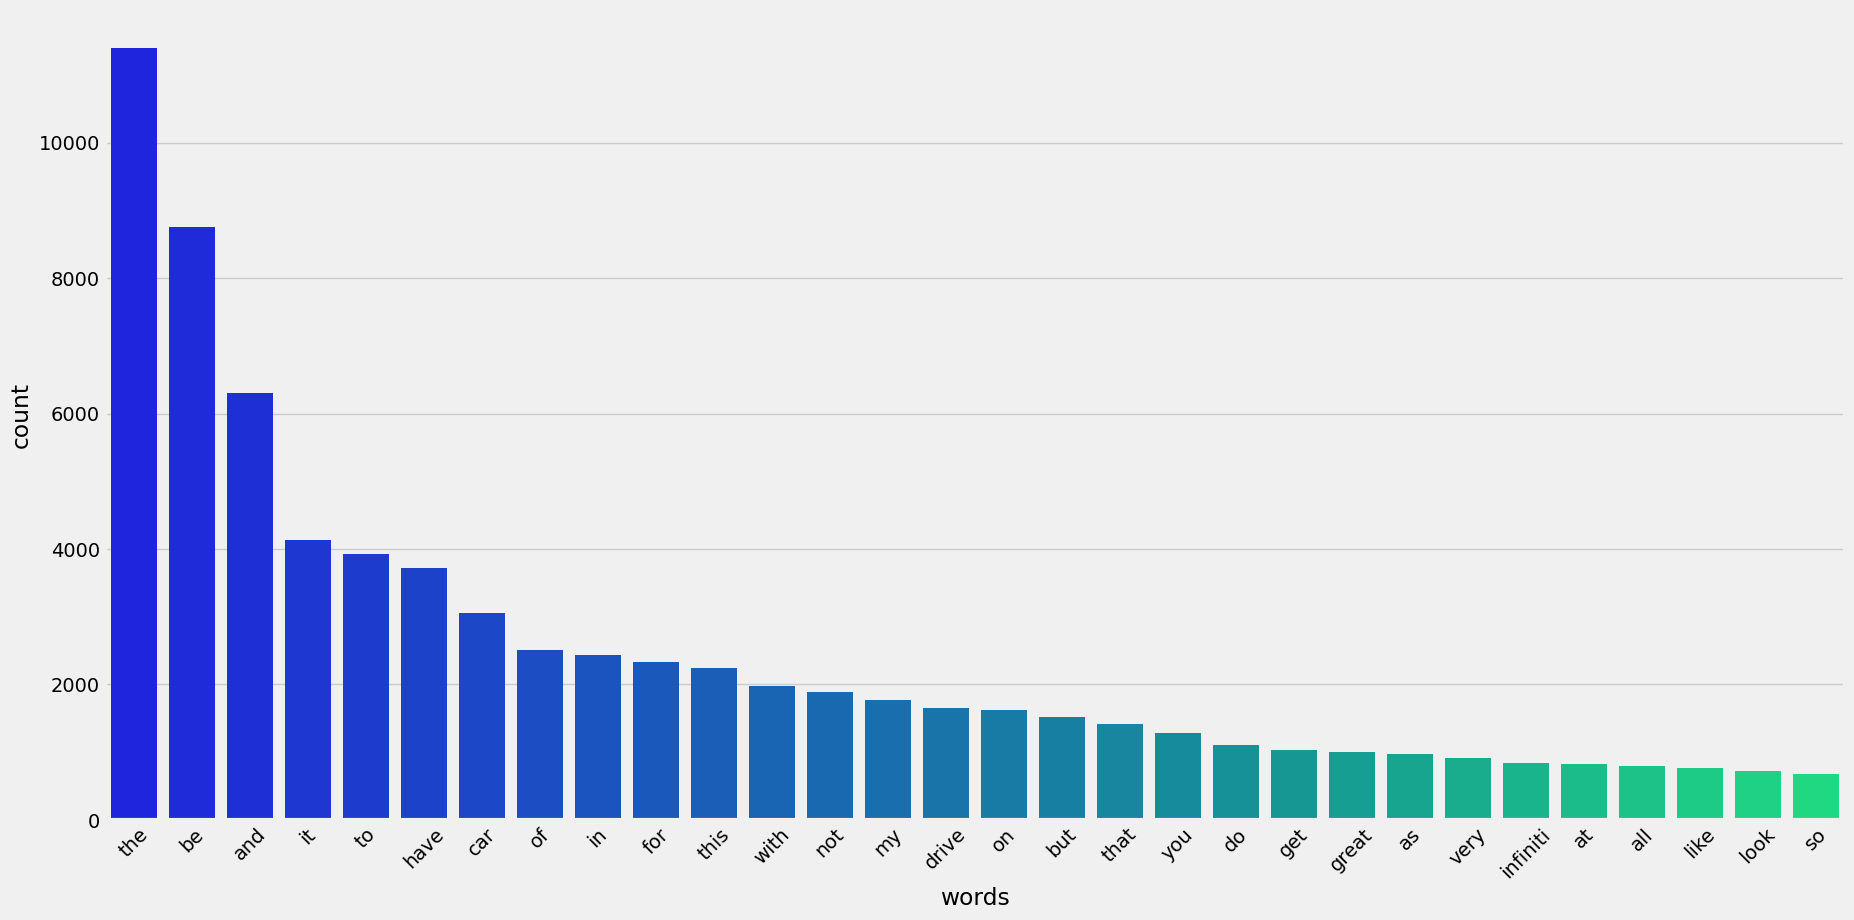

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_infi = ','.join(list(df_infi_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_infi = Counter(review_words_infi.split())
most_frequent = Counter_infi.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'get'),
  Text(3, 0, 'great'),
  Text(4, 0, 'infiniti'),
  Text(5, 0, 'like'),
  Text(6, 0, 'look'),
  Text(7, 0, 'seat'),
  Text(8, 0, 'buy'),
  Text(9, 0, 'love'),
  Text(10, 0, 'vehicle'),
  Text(11, 0, 'miles'),
  Text(12, 0, 'one'),
  Text(13, 0, 'handle'),
  Text(14, 0, 'go'),
  Text(15, 0, 'well'),
  Text(16, 0, 'suv'),
  Text(17, 0, 'sport'),
  Text(18, 0, 'make'),
  Text(19, 0, 'ride'),
  Text(20, 0, 'use'),
  Text(21, 0, 'would'),
  Text(22, 0, 'still'),
  Text(23, 0, 'power'),
  Text(24, 0, 'good'),
  Text(25, 0, 'better'),
  Text(26, 0, 'new'),
  Text(27, 0, 'time'),
  Text(28, 0, 'interior'),
  Text(29, 0, 'much')])

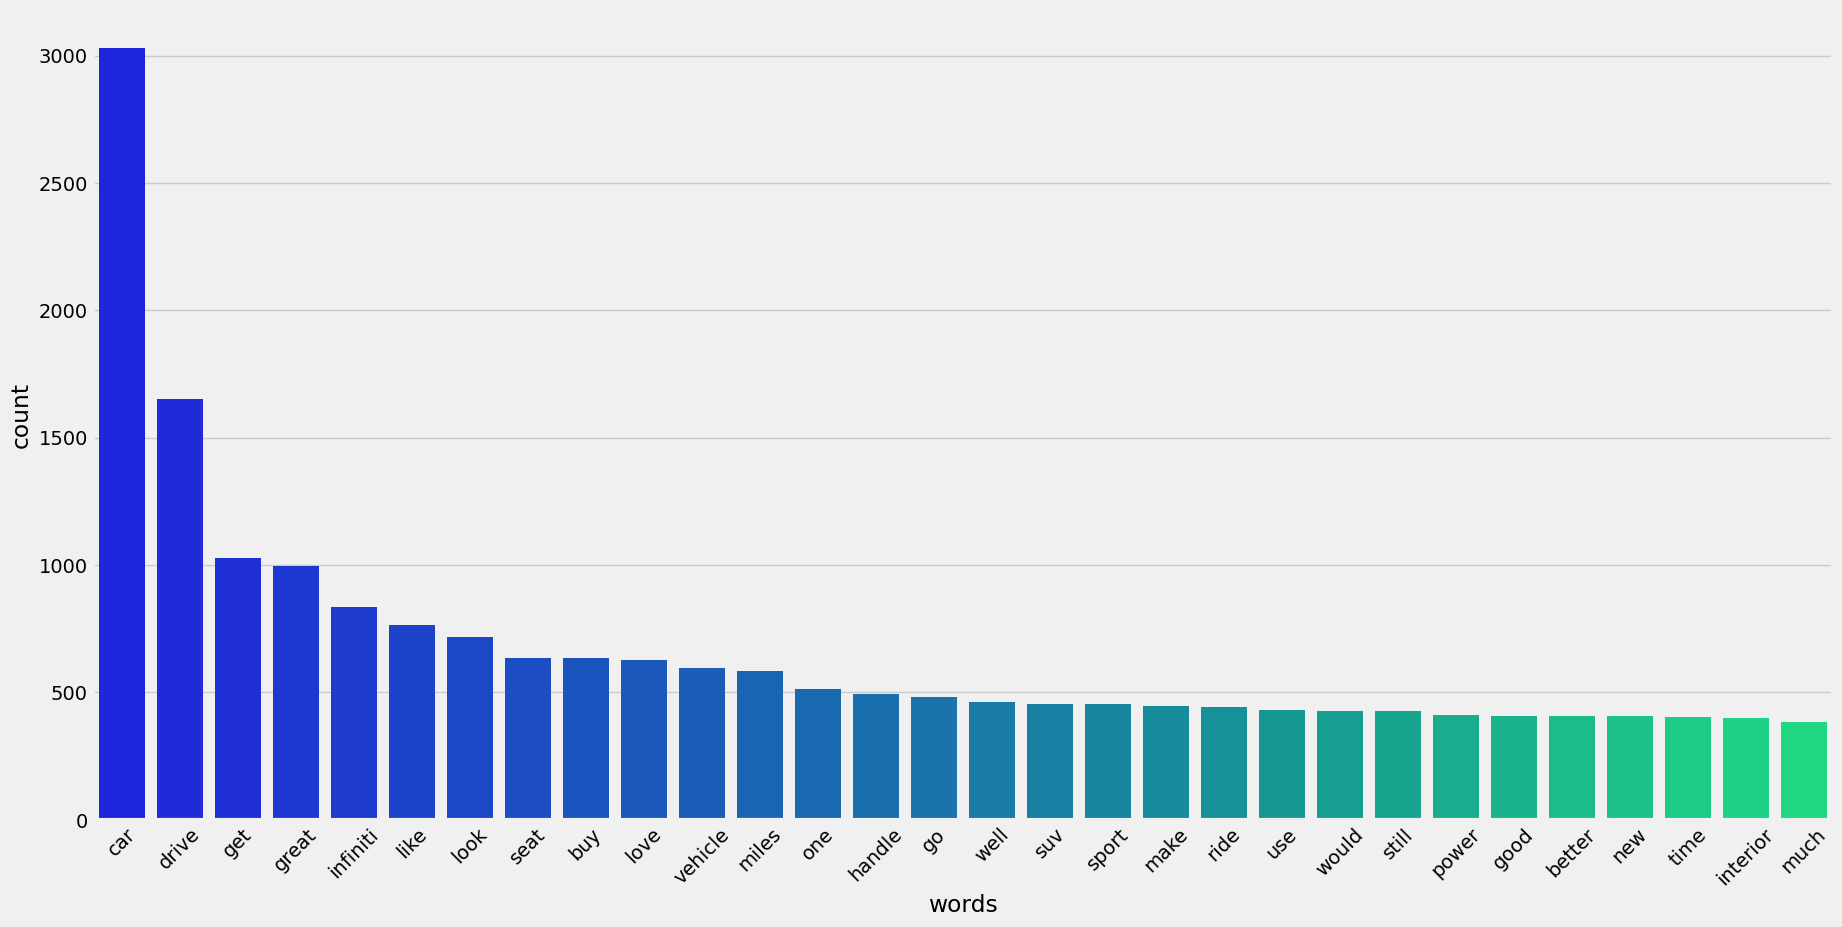

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_infi_pos['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_infi_pos['Review_Clean_List']]
df_infi_pos['Review_Clean'] = list(map(to_string, df_infi_pos['Review_Clean_List']))

# Join all word corpus
review_words_infi = ','.join(list(df_infi_pos['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_infi = Counter(review_words_infi.split())
most_frequent = Counter_infi.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_infi_pos

Vehicle_Title  Rating  \
0                  2017 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     4.0   
1                  2014 INFINITI QX70 SUV 4dr SUV AWD (5.0L 8cyl 7A)     5.0   
2                  2014 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     5.0   
3                  2016 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     5.0   
4                  2015 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)     3.0   
...                                                              ...     ...   
1812      2014 INFINITI Q60 Coupe Coupe 2dr Coupe AWD (3.7L 6cyl 7A)     4.0   
1813  2014 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)     4.0   
1814  2014 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)     2.0   
1815    2015 INFINITI Q60 Coupe Coupe Sport 2dr Coupe (3.7L 6cyl 6M)     5.0   
1816  2015 INFINITI Q60 Coupe Coupe Journey 2dr Coupe (3.7L 6cyl 7A)     1.0   

                                                                          Full Review  \
0     Love the look. Hate the car Ride is stiff. rattles my dentures. No room in t...   
1     Fastest naturally aspirated SUV (still!) 0-60 in 4.8 seconds.  *This* is the...   
2     3rd Time Buyer This is my third Infinity. Two x35's and now the X70. Obvious...   
3     Overall good quality My QX70 came with AWD and Premium Package. I find the f...   
4     Big, Sporty SUV I looked at a used QX70 in comparison to a QX50.  Was origin...   
...                                                                               ...   
1812  Fun to drive reliable vehicle! Leased this vehicle in AWD about a year ago. ...   
1813  Best Sport Coupe for the Money I am writing this review, because the other r...   
1814  Q60 - What You Should Know Before You Buy 2014 Q60 Journey - I generally agr...   
1815  Excellent Car - Great Value After 105K miles and 7 1/2 years of ownership, i...   
1816  Lemon law Filed lemon law and switched to Cadillac ATS coupe 3.6 because I c...   

     sentiment  \
0          pos   
1          pos   
2          pos   
3          pos   
4          pos   
...        ...   
1812       pos   
1813       pos   
1814       pos   
1815       pos   
1816       pos   

                                                                    Review_Clean_List  \
0     [love, look, hate, car, ride, stiff, rattle, dentures, room, rear, big, guy,...   
1     [fastest, naturally, aspirate, suv, still, 60, second, first, stat, potentia...   
2     [3rd, time, buyer, third, infinity, two, x35, x70, obviously, love, car, dis...   
3     [overall, good, quality, qx70, come, awd, premium, package, find, front, sea...   
4     [big, sporty, suv, look, use, qx70, comparison, qx50, originally, look, 2015...   
...                                                                               ...   
1812  [fun, drive, reliable, vehicle, lease, vehicle, awd, year, ago, never, probl...   
1813  [best, sport, coupe, money, write, review, review, say, get, like, 12, miles...   
1814  [q60, know, buy, 2014, q60, journey, generally, agree, edmunds, review, howe...   
1815  [excellent, car, great, value, 105k, miles, years, ownership, time, change, ...   
1816  [lemon, law, file, lemon, law, switch, cadillac, ats, coupe, cannot, deal, i...   

                                                                         Review_Clean  
0     love look hate car ride stiff rattle dentures room rear big guy make car thr...  
1     fastest naturally aspirate suv still 60 second first stat potential fx50 v8 ...  
2     3rd time buyer third infinity two x35 x70 obviously love car distinctive sty...  
3     overall good quality qx70 come awd premium package find front seat ride comf...  
4     big sporty suv look use qx70 comparison qx50 originally look 2015 model earl...  
...                                                                               ...  
1812  fun drive reliable vehicle lease vehicle awd year ago never problem great lo...  
1813  best sport coupe money write 

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_infi_pos = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_infi_pos.fit_transform(df_infi_pos['Review_Clean'])

In [ ]:
topic_model_infi_pos.get_topic_info()

Topic  Count                         Name
0      -1    783       -1_car_drive_get_great
1       0    255          0_suv_seat_qx4_qx56
2       1    238        1_car_great_drive_bmw
3       2    114   2_infiniti_car_miles_issue
4       3     83           3_fx_fx35_fx45_suv
5       4     61        4_g35_coupe_car_great
6       5     46        5_car_drive_great_mpg
7       6     39         6_g37_car_g37x_drive
8       7     32       7_miles_tire_car_still
9       8     30     8_g35_infiniti_great_i35
10      9     25         9_q45_car_q45t_value
11     10     20  10_infiniti_price_car_drive
12     11     20       11_car_drive_get_still
13     12     18   12_lease_like_wife_package
14     13     15    13_dealer_car_replace_000
15     14     14         14_q50_q50s_2014_awd
16     15     13   15_i30_i30t_noise_problems
17     16     11    16_row_seat_vehicle_cargo

In [ ]:
topic_model_infi_pos.get_topic(0)

[('suv', 0.04917860123782379),
 ('seat', 0.026145962066348758),
 ('qx4', 0.025238661150468307),
 ('qx56', 0.025111618726988742),
 ('vehicle', 0.024693370675005915),
 ('drive', 0.022583447204853172),
 ('great', 0.02153981941357116),
 ('row', 0.020628141357362028),
 ('love', 0.020197149847371403),
 ('look', 0.018575458199558102)]

In [ ]:
# Visualize top topic keywords
topic_model_infi_pos.visualize_barchart()

In [ ]:
topic_model_infi_pos.visualize_topics()

In [ ]:
topic_model_infi_pos.visualize_hierarchy()

In [ ]:
topic_model_infi_pos.visualize_heatmap()

#Jaguar

## neg

In [ ]:
df_jaguar_neg = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/jaguar_neg.csv')

In [ ]:
df_jaguar_neg

Unnamed: 0                  Review_Date        Author_Name  \
0             6   on 03/27/08 14:31 PM (PDT)  One more thought    
1            15   on 05/22/03 00:00 AM (PDT)            nojags    
2            16   on 11/29/02 00:00 AM (PST)        Clayhunter    
3            29   on 04/08/04 00:00 AM (PDT)            t2000s    
4            43   on 11/10/17 23:22 PM (PST)              Rick    
..          ...                          ...                ...   
153        1861   on 01/28/09 15:49 PM (PST)          Wolfgang    
154        1862   on 01/24/09 23:06 PM (PST)              joet    
155        1865   on 01/04/09 13:32 PM (PST)    Gratien Nadeau    
156        1869   on 11/18/08 22:09 PM (PST)           bulldog    
157        1877   on 08/10/17 08:45 AM (PDT)            Neha S    

                                                            Vehicle_Title  \
0                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
1                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
2                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
3    2004 Jaguar XK-Series Convertible XK8 2dr Convertible (4.2L 8cyl 6A)   
4        2004 Jaguar XK-Series XKR XKR 2dr Convertible (4.2L 8cyl S/C 6A)   
..                                                                    ...   
153                  2009 Jaguar XF Sedan Luxury 4dr Sedan (4.2L 8cyl 6A)   
154          2009 Jaguar XF Sedan Premium Luxury 4dr Sedan (4.2L 8cyl 6A)   
155          2009 Jaguar XF Sedan Premium Luxury 4dr Sedan (4.2L 8cyl 6A)   
156                  2009 Jaguar XF Sedan Luxury 4dr Sedan (4.2L 8cyl 6A)   
157                   2016 Jaguar XF Sedan S 4dr Sedan (3.0L 6cyl S/C 8A)   

                                Review_Title  \
0                             Mixed feelings   
1                               Jag is a dog   
2                               wants to run   
3                       Beautiful but costly   
4           I really, really like this car!!   
..                                       ...   
153  Impulse Purchase, but so far no regrets   
154                        Great car, but...   
155                                 Love it!   
156                THEY FOUND THE DAMN NOISE   
157                        Price of Prestige   

                                                                              Review  \
0     I love the looks and the ride is exceptional for a sports car.  Long trips ...   
1     Nothing but problems. After 48,000 \rmiles replaced cracked motor mounts, \...   
2     This is a great driving/touring car.  \rSuspension is stiff and responsive ...   
3     Beautiful car, get lots of compliments. \rHave had a lot of problems. Just ...   
4     I bought this '04 convertible used (in 2017) and to get an $87,000 car with...   
..                                                                               ...   
153   I had to have it, always wanted a Jag, but have always been to practical un...   
154   Just took my XF on a round trip to Vegas from San Diego.  It was a great ri...   
155   Perfect reliability except one little glitch: gas tank door that refused to...   
156   I just wanted to let those who have been frustrated like I have been about ...   
157   Jaguar, the brand known for prestige and comfort, or at least that's what I...   

     Rating  \
0     4.500   
1     3.625   
2     4.250   
3     4.250   
4     5.000   
..      ...   
153   4.625   
154   4.500   
155   4.750   
156   4.875   
157   3.000   

                                                                         Full Review  \
0    Mixed feelings I love the looks and the ride is exceptional for a sports car...   
1    Jag is a dog Nothing but problems. After 48,000 \rmiles replaced cracked mot...   
2    wants to run This is a great driving/touring car.  \rSuspension is stiff and...   
3    Beautiful but costly Beautiful car, get lots of compliments. \rHave had a lo...   
4    I really, reall

In [ ]:
df_jaguar_neg.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_jaguar_neg

Unnamed: 0  \
0             6   
1            15   
2            16   
3            29   
4            43   
..          ...   
153        1861   
154        1862   
155        1865   
156        1869   
157        1877   

                                                            Vehicle_Title  \
0                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
1                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
2                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
3    2004 Jaguar XK-Series Convertible XK8 2dr Convertible (4.2L 8cyl 6A)   
4        2004 Jaguar XK-Series XKR XKR 2dr Convertible (4.2L 8cyl S/C 6A)   
..                                                                    ...   
153                  2009 Jaguar XF Sedan Luxury 4dr Sedan (4.2L 8cyl 6A)   
154          2009 Jaguar XF Sedan Premium Luxury 4dr Sedan (4.2L 8cyl 6A)   
155          2009 Jaguar XF Sedan Premium Luxury 4dr Sedan (4.2L 8cyl 6A)   
156                  2009 Jaguar XF Sedan Luxury 4dr Sedan (4.2L 8cyl 6A)   
157                   2016 Jaguar XF Sedan S 4dr Sedan (3.0L 6cyl S/C 8A)   

     Rating  \
0     4.500   
1     3.625   
2     4.250   
3     4.250   
4     5.000   
..      ...   
153   4.625   
154   4.500   
155   4.750   
156   4.875   
157   3.000   

                                                                         Full Review  \
0    Mixed feelings I love the looks and the ride is exceptional for a sports car...   
1    Jag is a dog Nothing but problems. After 48,000 \rmiles replaced cracked mot...   
2    wants to run This is a great driving/touring car.  \rSuspension is stiff and...   
3    Beautiful but costly Beautiful car, get lots of compliments. \rHave had a lo...   
4    I really, really like this car!! I bought this '04 convertible used (in 2017...   
..                                                                               ...   
153  Impulse Purchase, but so far no regrets I had to have it, always wanted a Ja...   
154  Great car, but... Just took my XF on a round trip to Vegas from San Diego.  ...   
155  Love it! Perfect reliability except one little glitch: gas tank door that re...   
156  THEY FOUND THE DAMN NOISE I just wanted to let those who have been frustrate...   
157  Price of Prestige Jaguar, the brand known for prestige and comfort, or at le...   

    sentiment  
0         neg  
1         neg  
2         neg  
3         neg  
4         neg  
..        ...  
153       neg  
154       neg  
155       neg  
156       neg  
157       neg  

[158 rows x 5 columns]

In [ ]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}


In [ ]:
def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

# Create a list of review by applying text_preprocessing function
df_jaguar_neg['Review_Clean_List'] = list(map(text_preprocessing, df_jaguar_neg['Full Review']))

# Return to string with to_string function
df_jaguar_neg['Review_Clean'] = list(map(to_string, df_jaguar_neg['Review_Clean_List']))

In [ ]:
df_jaguar_neg

Unnamed: 0  \
0             6   
1            15   
2            16   
3            29   
4            43   
..          ...   
153        1861   
154        1862   
155        1865   
156        1869   
157        1877   

                                                            Vehicle_Title  \
0                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
1                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
2                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
3    2004 Jaguar XK-Series Convertible XK8 2dr Convertible (4.2L 8cyl 6A)   
4        2004 Jaguar XK-Series XKR XKR 2dr Convertible (4.2L 8cyl S/C 6A)   
..                                                                    ...   
153                  2009 Jaguar XF Sedan Luxury 4dr Sedan (4.2L 8cyl 6A)   
154          2009 Jaguar XF Sedan Premium Luxury 4dr Sedan (4.2L 8cyl 6A)   
155          2009 Jaguar XF Sedan Premium Luxury 4dr Sedan (4.2L 8cyl 6A)   
156                  2009 Jaguar XF Sedan Luxury 4dr Sedan (4.2L 8cyl 6A)   
157                   2016 Jaguar XF Sedan S 4dr Sedan (3.0L 6cyl S/C 8A)   

     Rating  \
0     4.500   
1     3.625   
2     4.250   
3     4.250   
4     5.000   
..      ...   
153   4.625   
154   4.500   
155   4.750   
156   4.875   
157   3.000   

                                                                         Full Review  \
0    Mixed feelings I love the looks and the ride is exceptional for a sports car...   
1    Jag is a dog Nothing but problems. After 48,000 \rmiles replaced cracked mot...   
2    wants to run This is a great driving/touring car.  \rSuspension is stiff and...   
3    Beautiful but costly Beautiful car, get lots of compliments. \rHave had a lo...   
4    I really, really like this car!! I bought this '04 convertible used (in 2017...   
..                                                                               ...   
153  Impulse Purchase, but so far no regrets I had to have it, always wanted a Ja...   
154  Great car, but... Just took my XF on a round trip to Vegas from San Diego.  ...   
155  Love it! Perfect reliability except one little glitch: gas tank door that re...   
156  THEY FOUND THE DAMN NOISE I just wanted to let those who have been frustrate...   
157  Price of Prestige Jaguar, the brand known for prestige and comfort, or at le...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
153       neg   
154       neg   
155       neg   
156       neg   
157       neg   

                                                                   Review_Clean_List  \
0    [mix, feel, love, the, look, and, the, ride, be, exceptional, for, sport, ca...   
1    [jag, be, dog, nothing, but, problems, after, 48, 000, miles, replace, crack...   
2    [want, to, run, this, be, great, drive, tour, car, suspension, be, stiff, an...   
3    [beautiful, but, costly, beautiful, car, get, lot, of, compliment, have, hav...   
4    [really, really, like, this, car, buy, this, 04, convertible, use, in, 2017,...   
..                                                                               ...   
153  [impulse, purchase, but, so, far, no, regret, have, to, have, it, always, wa...   
154  [great, car, but, just, take, my, xf, on, round, trip, to, vegas, from, san,...   
155  [love, it, perfect, reliability, except, one, little, glitch, gas, tank, doo...   
156  [they, find, the, damn, noise, just, want, to, let, those, who, have, be, fr...   
157  [price, of, prestige, jaguar, the, brand, know, for, prestige, and, comfort,...   

                                                                        Review_Clean  
0    mix feel love the look and the ride be exceptional for sport car long trip b...  
1    jag be dog nothing but problems after 48 000 miles replace crack motor mount...  
2    want to run this be great drive tour car suspension be stiff and responsive ...  
3  

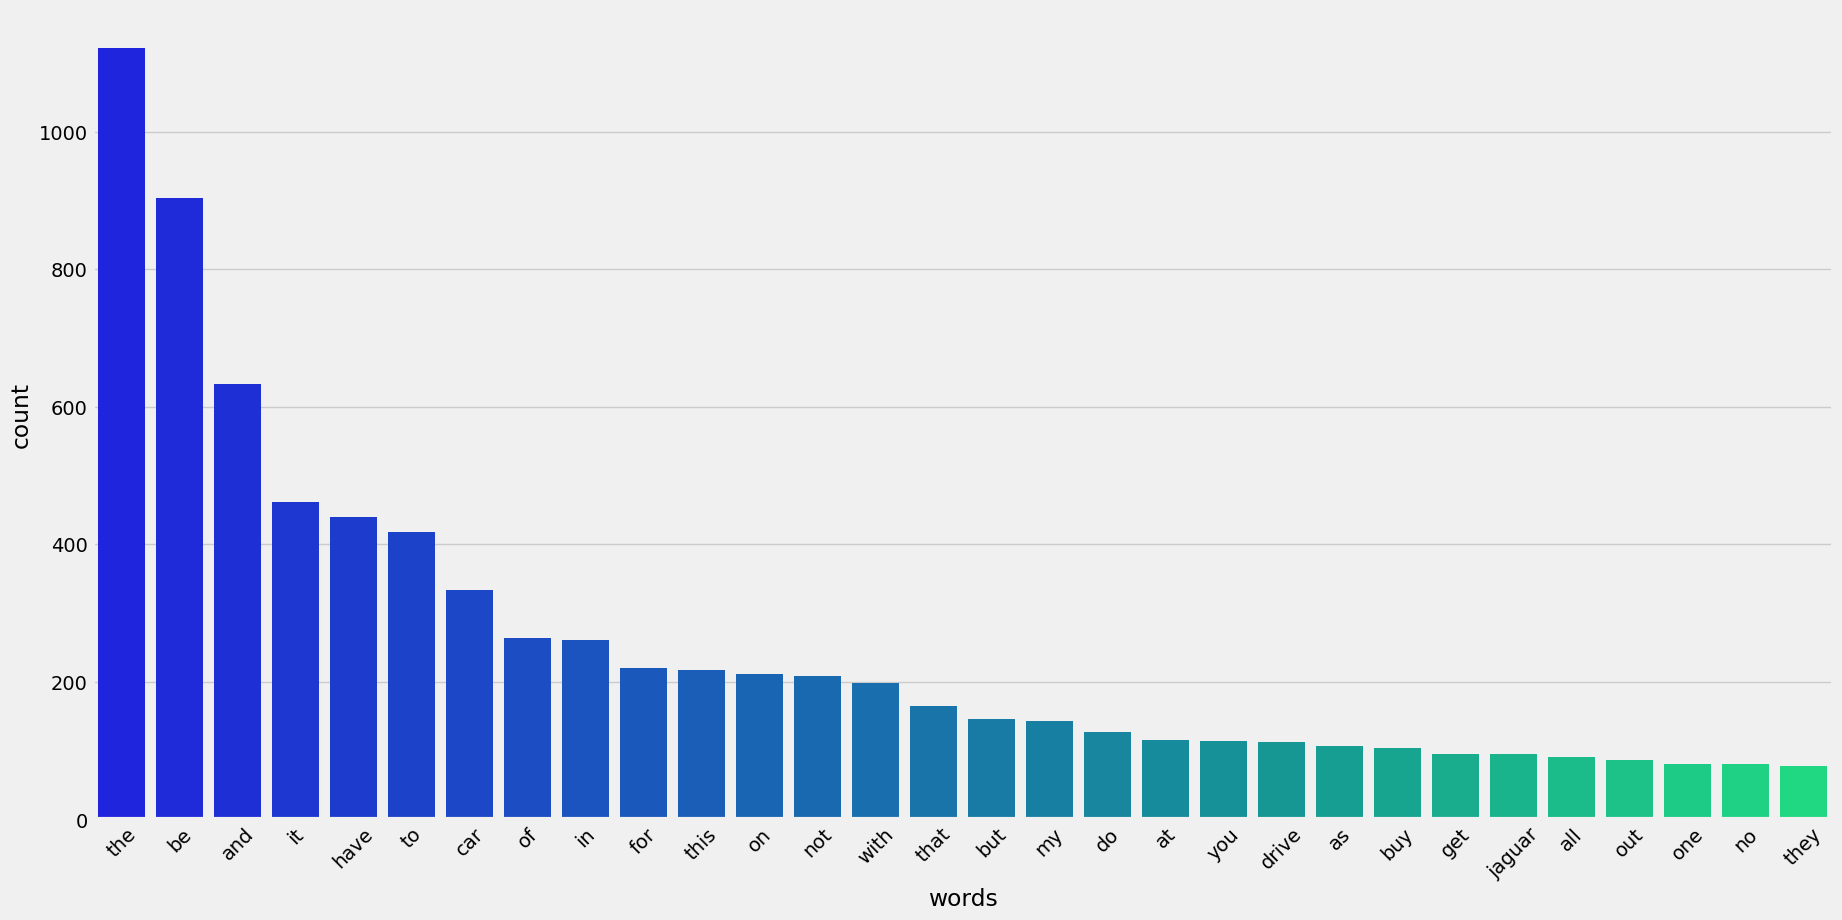

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")
pd.set_option('display.max_colwidth', 80)
import matplotlib.patheffects as path_effects
import nltk
import numpy as np
import seaborn as sns
import gensim
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Import Counter
from collections import Counter

# Join all word corpus
review_words = ','.join(list(df_jaguar_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'buy'),
  Text(3, 0, 'jaguar'),
  Text(4, 0, 'get'),
  Text(5, 0, 'one'),
  Text(6, 0, 'like'),
  Text(7, 0, 'miles'),
  Text(8, 0, 'jag'),
  Text(9, 0, 'look'),
  Text(10, 0, 'new'),
  Text(11, 0, 'problems'),
  Text(12, 0, 'great'),
  Text(13, 0, 'make'),
  Text(14, 0, 'go'),
  Text(15, 0, 'would'),
  Text(16, 0, 'dealer'),
  Text(17, 0, 'engine'),
  Text(18, 0, 'time'),
  Text(19, 0, 'love'),
  Text(20, 0, 'problem'),
  Text(21, 0, 'still'),
  Text(22, 0, 'replace'),
  Text(23, 0, 'good'),
  Text(24, 0, 'use'),
  Text(25, 0, 'type'),
  Text(26, 0, 'seat'),
  Text(27, 0, 'back'),
  Text(28, 0, '000'),
  Text(29, 0, 'light')])

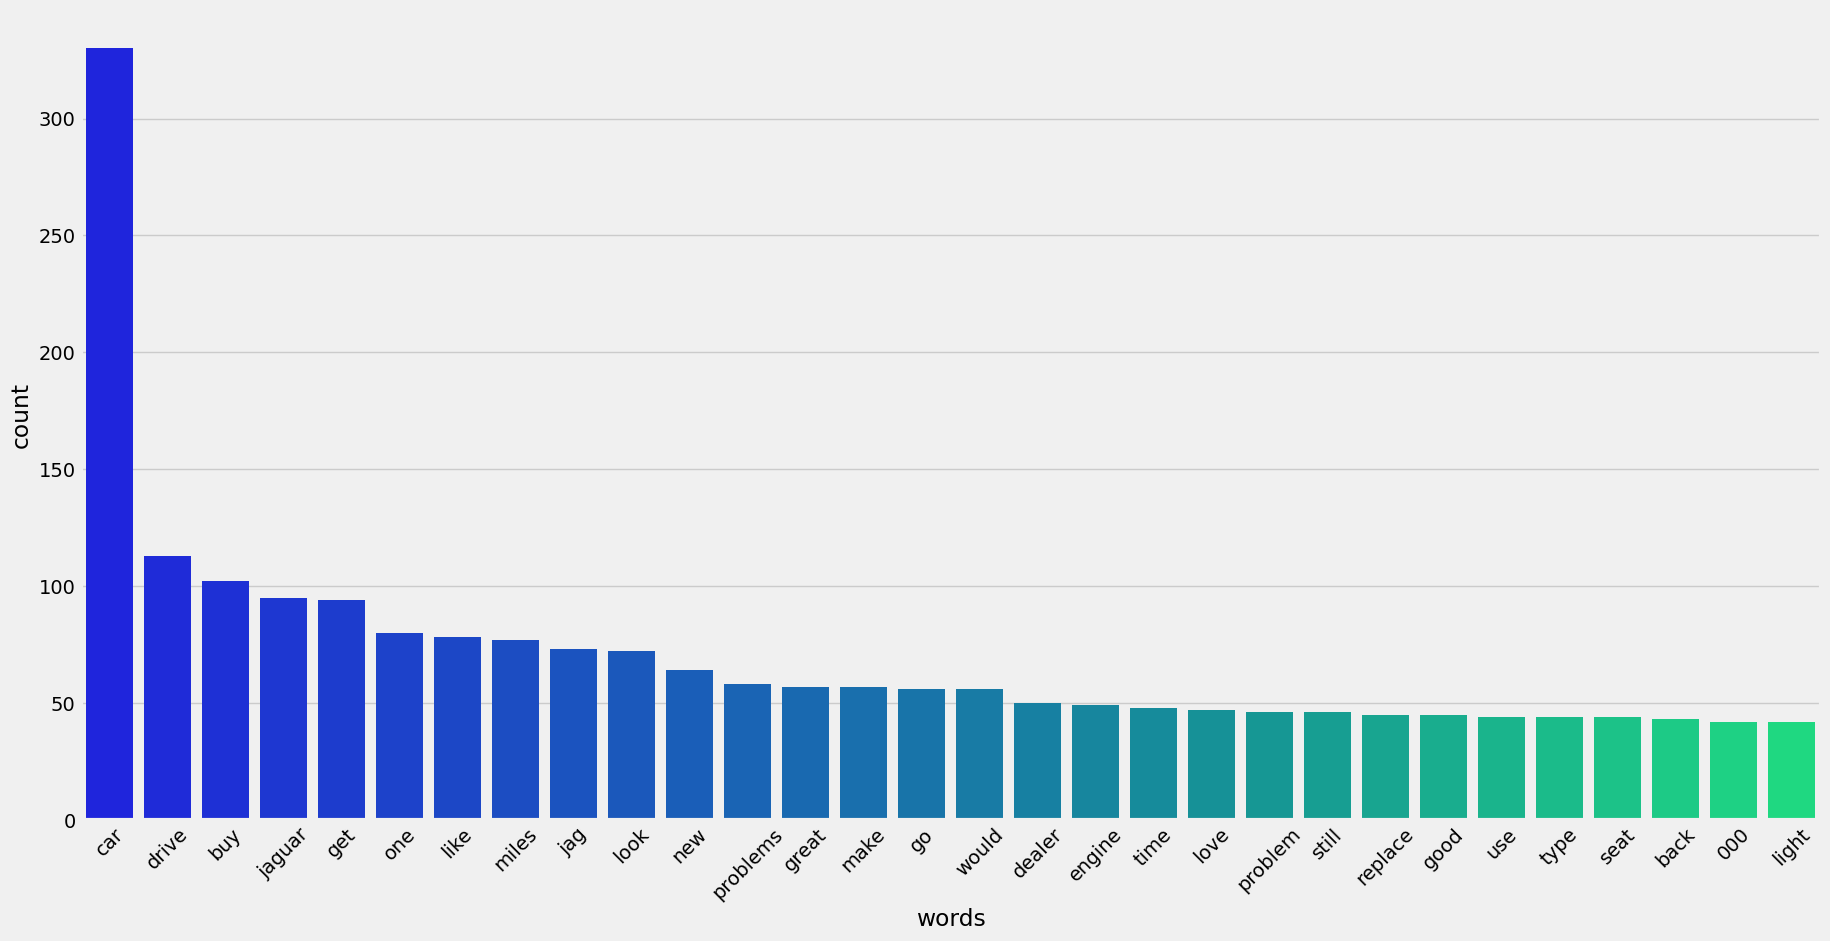

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_jaguar_neg['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_jaguar_neg['Review_Clean_List']]
df_jaguar_neg['Review_Clean'] = list(map(to_string, df_jaguar_neg['Review_Clean_List']))

# Join all word corpus
review_words = ','.join(list(df_jaguar_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_jaguar_neg

Unnamed: 0  \
0             6   
1            15   
2            16   
3            29   
4            43   
..          ...   
153        1861   
154        1862   
155        1865   
156        1869   
157        1877   

                                                            Vehicle_Title  \
0                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
1                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
2                   1999 Jaguar XK-Series Convertible XK8 2dr Convertible   
3    2004 Jaguar XK-Series Convertible XK8 2dr Convertible (4.2L 8cyl 6A)   
4        2004 Jaguar XK-Series XKR XKR 2dr Convertible (4.2L 8cyl S/C 6A)   
..                                                                    ...   
153                  2009 Jaguar XF Sedan Luxury 4dr Sedan (4.2L 8cyl 6A)   
154          2009 Jaguar XF Sedan Premium Luxury 4dr Sedan (4.2L 8cyl 6A)   
155          2009 Jaguar XF Sedan Premium Luxury 4dr Sedan (4.2L 8cyl 6A)   
156                  2009 Jaguar XF Sedan Luxury 4dr Sedan (4.2L 8cyl 6A)   
157                   2016 Jaguar XF Sedan S 4dr Sedan (3.0L 6cyl S/C 8A)   

     Rating  \
0     4.500   
1     3.625   
2     4.250   
3     4.250   
4     5.000   
..      ...   
153   4.625   
154   4.500   
155   4.750   
156   4.875   
157   3.000   

                                                                         Full Review  \
0    Mixed feelings I love the looks and the ride is exceptional for a sports car...   
1    Jag is a dog Nothing but problems. After 48,000 \rmiles replaced cracked mot...   
2    wants to run This is a great driving/touring car.  \rSuspension is stiff and...   
3    Beautiful but costly Beautiful car, get lots of compliments. \rHave had a lo...   
4    I really, really like this car!! I bought this '04 convertible used (in 2017...   
..                                                                               ...   
153  Impulse Purchase, but so far no regrets I had to have it, always wanted a Ja...   
154  Great car, but... Just took my XF on a round trip to Vegas from San Diego.  ...   
155  Love it! Perfect reliability except one little glitch: gas tank door that re...   
156  THEY FOUND THE DAMN NOISE I just wanted to let those who have been frustrate...   
157  Price of Prestige Jaguar, the brand known for prestige and comfort, or at le...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
153       neg   
154       neg   
155       neg   
156       neg   
157       neg   

                                                                   Review_Clean_List  \
0    [mix, feel, love, look, ride, exceptional, sport, car, long, trip, problem, ...   
1    [jag, dog, nothing, problems, 48, 000, miles, replace, crack, motor, mount, ...   
2    [want, run, great, drive, tour, car, suspension, stiff, responsive, harsh, c...   
3    [beautiful, costly, beautiful, car, get, lot, compliment, lot, problems, rec...   
4    [really, really, like, car, buy, 04, convertible, use, 2017, get, 87, 000, c...   
..                                                                               ...   
153  [impulse, purchase, far, regret, always, want, jag, always, practical, big, ...   
154  [great, car, take, xf, round, trip, vegas, san, diego, great, ride, way, eve...   
155  [love, perfect, reliability, except, one, little, glitch, gas, tank, door, r...   
156  [find, damn, noise, want, let, frustrate, like, silly, creak, chirp, seem, c...   
157  [price, prestige, jaguar, brand, know, prestige, comfort, least, think, take...   

                                                                        Review_Clean  
0    mix feel love look ride exceptional sport car long trip problem car easy dri...  
1    jag dog nothing problems 48 000 miles replace crack motor mount time chanin ...  
2    want run great drive tour car suspension stiff responsive harsh civilize kid...  
3  

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_jaguar_neg = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_jaguar_neg.fit_transform(df_jaguar_neg['Review_Clean'])

In [ ]:
topic_model_jaguar_neg.get_topic_info()

Topic  Count                    Name
0     -1     92    -1_car_get_drive_buy
1      0     27   0_car_fix_replace_get
2      1     19  1_jaguar_car_jag_price
3      2     10  2_car_miles_jaguar_new
4      3     10    3_car_seat_use_great

In [ ]:
topic_model_jaguar_neg.get_topic(2)

[('car', 0.044101919744677115),
 ('miles', 0.031999921274139136),
 ('jaguar', 0.029394409705211136),
 ('new', 0.027190748675823016),
 ('like', 0.02584609025988161),
 ('still', 0.025507519969040906),
 ('look', 0.025176659412722804),
 ('drive', 0.024107906733810195),
 ('buy', 0.023603162944452985),
 ('engine', 0.02220006135567352)]

In [ ]:
# Visualize top topic keywords
topic_model_jaguar_neg.visualize_barchart(top_n_topics=12)

In [ ]:
topic_model_jaguar_neg.visualize_topics()

In [ ]:
topic_model_jaguar_neg.visualize_hierarchy()

In [ ]:
topic_model_jaguar_neg.visualize_heatmap()

# Suzuki

## neg

In [ ]:
#suzuki

In [ ]:
df_suzuki_neg = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/suzuki_neg.csv')

In [ ]:
df_suzuki_neg

Review_Date      Author_Name  \
0     on 05/21/10 16:43 PM (PDT)            Jena    
1     on 06/20/08 00:20 AM (PDT)      Good & Bad    
2     on 05/29/08 06:05 AM (PDT)      Reno Owner    
3     on 09/25/06 11:08 AM (PDT)  Tabitha Harmon    
4     on 07/29/14 11:41 AM (PDT)        hikaru_n    
..                           ...              ...   
232   on 11/30/09 13:41 PM (PST)       LadyDarya    
233   on 10/30/15 13:29 PM (PDT)    Diane Nelson    
234   on 08/30/16 09:41 AM (PDT)    Conrad Usner    
235   on 06/21/12 14:37 PM (PDT)       homer1041    
236   on 09/04/10 00:00 AM (PDT)           ToddA    

                                                       Vehicle_Title  \
0            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
1            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
2            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   
3    2006 Suzuki Reno Hatchback Premium 4dr Hatchback (2.0L 4cyl 5M)   
4      2007 Suzuki Reno Hatchback 4dr Hatchback w/ABS (2.0L 4cyl 5M)   
..                                                               ...   
232          2002 Suzuki XL-7 SUV Limited 2WD 4dr SUV (2.7L 6cyl 4A)   
233     2012 Suzuki Kizashi Sedan Sport SLS 4dr Sedan (2.4L 4cyl 6M)   
234       2011 Suzuki Kizashi Sedan SE 4dr Sedan AWD (2.4L 4cyl CVT)   
235       2011 Suzuki Kizashi Sedan SE 4dr Sedan AWD (2.4L 4cyl CVT)   
236      2010 Suzuki Kizashi Sedan GTS 4dr Sedan AWD (2.4L 4cyl CVT)   

                                Review_Title  \
0                        The worst car ever!   
1                                Some Quirks   
2                              Happy so far.   
3                        Horrible Experience   
4                                  Lousy car   
..                                       ...   
232         Watch out for the air compressor   
233                   Great Car, Company NOT   
234    Wish Suzuki was still making this car   
235             Terrible paint and warranty    
236  10 out of 10  - Not your typical Suzuki   

                                                                              Review  \
0     I purchased my vehicle in 2007. I hate it. It only has 3,000. miles on it. ...   
1     To start, let me say I really do love this car.  But, it has had many probl...   
2     We bought a 06 Reno a few years ago and so far has been a reliable car, ove...   
3     I bought this car to have a dependable vehicle.  It has had so many problem...   
4     This car is riddled with electrical and sensor problems. Had to get them to...   
..                                                                               ...   
232   My advice is to do serious research on the XL-7.  The a/c compressor has a ...   
233   We love our Suzuki Kizashi SLS w/AWD ... great handling ... great radio ......   
234   Buy this car if you have a chance for a good one.... I've had this car for ...   
235   I bought a 2011 around this time last year.From a mechanical and fun to dri...   
236   I honestly was looking at Mercedes and Audi, the C300 Sport and A4. In betw...   

     Rating  \
0     2.250   
1     4.750   
2     4.500   
3     1.500   
4     2.500   
..      ...   
232   3.625   
233   5.000   
234   5.000   
235   4.250   
236   5.000   

                                                                         Full Review  \
0    The worst car ever! I purchased my vehicle in 2007. I hate it. It only has 3...   
1    Some Quirks To start, let me say I really do love this car.  But, it has had...   
2    Happy so far. We bought a 06 Reno a few years ago and so far has been a reli...   
3    Horrible Experience I bought this car to have a dependable vehicle.  It has ...   
4    Lousy car This car is riddled with electrical and sensor problems. Had to ge...   
..                                                                               ...   
232  Watch out for the air compressor My advice is to do serious research on the ...   


In [ ]:
df_suzuki_neg.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_suzuki_neg

Vehicle_Title  Rating  \
0            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   2.250   
1            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   4.750   
2            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   4.500   
3    2006 Suzuki Reno Hatchback Premium 4dr Hatchback (2.0L 4cyl 5M)   1.500   
4      2007 Suzuki Reno Hatchback 4dr Hatchback w/ABS (2.0L 4cyl 5M)   2.500   
..                                                               ...     ...   
232          2002 Suzuki XL-7 SUV Limited 2WD 4dr SUV (2.7L 6cyl 4A)   3.625   
233     2012 Suzuki Kizashi Sedan Sport SLS 4dr Sedan (2.4L 4cyl 6M)   5.000   
234       2011 Suzuki Kizashi Sedan SE 4dr Sedan AWD (2.4L 4cyl CVT)   5.000   
235       2011 Suzuki Kizashi Sedan SE 4dr Sedan AWD (2.4L 4cyl CVT)   4.250   
236      2010 Suzuki Kizashi Sedan GTS 4dr Sedan AWD (2.4L 4cyl CVT)   5.000   

                                                                         Full Review  \
0    The worst car ever! I purchased my vehicle in 2007. I hate it. It only has 3...   
1    Some Quirks To start, let me say I really do love this car.  But, it has had...   
2    Happy so far. We bought a 06 Reno a few years ago and so far has been a reli...   
3    Horrible Experience I bought this car to have a dependable vehicle.  It has ...   
4    Lousy car This car is riddled with electrical and sensor problems. Had to ge...   
..                                                                               ...   
232  Watch out for the air compressor My advice is to do serious research on the ...   
233  Great Car, Company NOT We love our Suzuki Kizashi SLS w/AWD ... great handli...   
234  Wish Suzuki was still making this car Buy this car if you have a chance for ...   
235  Terrible paint and warranty  I bought a 2011 around this time last year.From...   
236  10 out of 10  - Not your typical Suzuki I honestly was looking at Mercedes a...   

    sentiment  
0         neg  
1         neg  
2         neg  
3         neg  
4         neg  
..        ...  
232       neg  
233       neg  
234       neg  
235       neg  
236       neg  

[237 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_suzuki_neg['Review_Clean_List'] = list(map(text_preprocessing, df_suzuki_neg['Full Review']))

# Return to string with to_string function
df_suzuki_neg['Review_Clean'] = list(map(to_string, df_suzuki_neg['Review_Clean_List']))

In [ ]:
df_suzuki_neg

Vehicle_Title  Rating  \
0            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   2.250   
1            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   4.750   
2            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   4.500   
3    2006 Suzuki Reno Hatchback Premium 4dr Hatchback (2.0L 4cyl 5M)   1.500   
4      2007 Suzuki Reno Hatchback 4dr Hatchback w/ABS (2.0L 4cyl 5M)   2.500   
..                                                               ...     ...   
232          2002 Suzuki XL-7 SUV Limited 2WD 4dr SUV (2.7L 6cyl 4A)   3.625   
233     2012 Suzuki Kizashi Sedan Sport SLS 4dr Sedan (2.4L 4cyl 6M)   5.000   
234       2011 Suzuki Kizashi Sedan SE 4dr Sedan AWD (2.4L 4cyl CVT)   5.000   
235       2011 Suzuki Kizashi Sedan SE 4dr Sedan AWD (2.4L 4cyl CVT)   4.250   
236      2010 Suzuki Kizashi Sedan GTS 4dr Sedan AWD (2.4L 4cyl CVT)   5.000   

                                                                         Full Review  \
0    The worst car ever! I purchased my vehicle in 2007. I hate it. It only has 3...   
1    Some Quirks To start, let me say I really do love this car.  But, it has had...   
2    Happy so far. We bought a 06 Reno a few years ago and so far has been a reli...   
3    Horrible Experience I bought this car to have a dependable vehicle.  It has ...   
4    Lousy car This car is riddled with electrical and sensor problems. Had to ge...   
..                                                                               ...   
232  Watch out for the air compressor My advice is to do serious research on the ...   
233  Great Car, Company NOT We love our Suzuki Kizashi SLS w/AWD ... great handli...   
234  Wish Suzuki was still making this car Buy this car if you have a chance for ...   
235  Terrible paint and warranty  I bought a 2011 around this time last year.From...   
236  10 out of 10  - Not your typical Suzuki I honestly was looking at Mercedes a...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
232       neg   
233       neg   
234       neg   
235       neg   
236       neg   

                                                                   Review_Clean_List  \
0    [the, worst, car, ever, purchase, my, vehicle, in, 2007, hate, it, it, only,...   
1    [some, quirk, to, start, let, me, say, really, do, love, this, car, but, it,...   
2    [happy, so, far, we, buy, 06, reno, few, years, ago, and, so, far, have, be,...   
3    [horrible, experience, buy, this, car, to, have, dependable, vehicle, it, ha...   
4    [lousy, car, this, car, be, riddle, with, electrical, and, sensor, problems,...   
..                                                                               ...   
232  [watch, out, for, the, air, compressor, my, advice, be, to, do, serious, res...   
233  [great, car, company, not, we, love, our, suzuki, kizashi, sls, awd, great, ...   
234  [wish, suzuki, be, still, make, this, car, buy, this, car, if, you, have, ch...   
235  [terrible, paint, and, warranty, buy, 2011, around, this, time, last, year, ...   
236  [10, out, of, 10, not, your, typical, suzuki, honestly, be, look, at, merced...   

                                                                        Review_Clean  
0    the worst car ever purchase my vehicle in 2007 hate it it only have 000 mile...  
1    some quirk to start let me say really do love this car but it have have many...  
2    happy so far we buy 06 reno few years ago and so far have be reliable car ov...  
3    horrible experience buy this car to have dependable vehicle it have have so ...  
4    lousy car this car be riddle with electrical and sensor problems have to get...  
..                                                                               ...  
232  watch out for the air compressor my advice be to do serious research on the ...  
233  great car company not we love our suzuki kizashi sls awd great handle grea

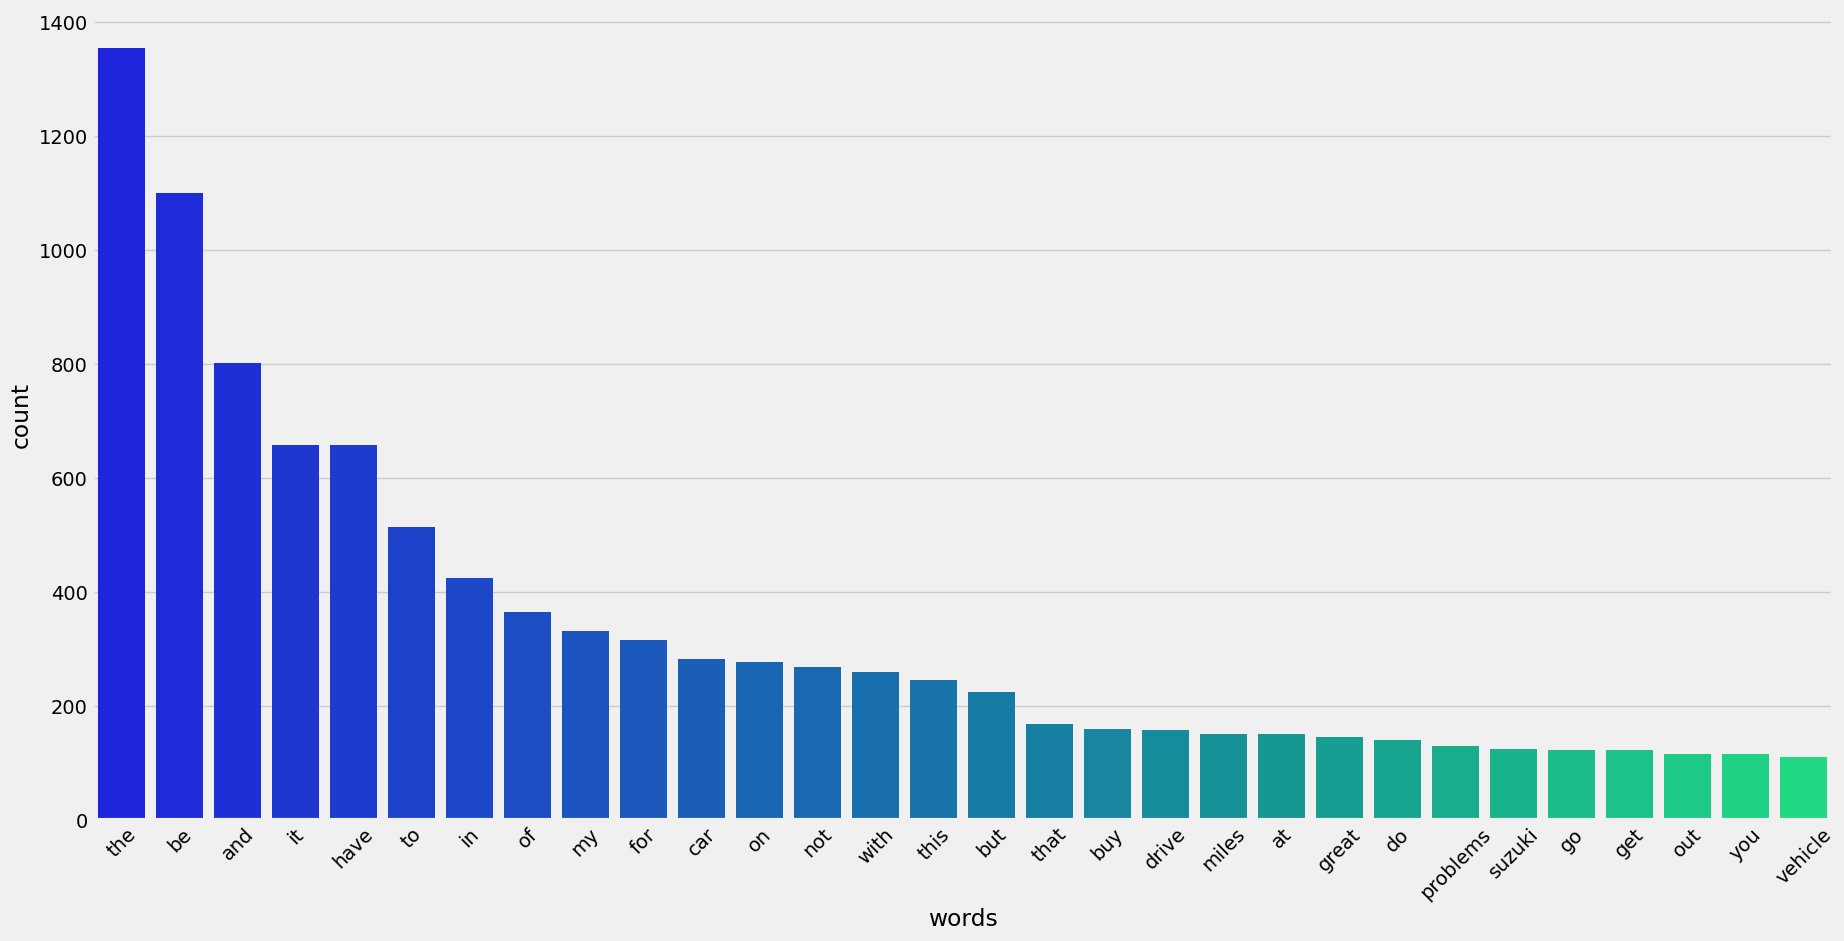

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_suzuki = ','.join(list(df_suzuki_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_suzuki = Counter(review_words_suzuki.split())
most_frequent = Counter_suzuki.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'buy'),
  Text(3, 0, 'miles'),
  Text(4, 0, 'great'),
  Text(5, 0, 'problems'),
  Text(6, 0, 'suzuki'),
  Text(7, 0, 'go'),
  Text(8, 0, 'get'),
  Text(9, 0, 'vehicle'),
  Text(10, 0, 'gas'),
  Text(11, 0, 'good'),
  Text(12, 0, 'xl7'),
  Text(13, 0, 'still'),
  Text(14, 0, 'problem'),
  Text(15, 0, 'one'),
  Text(16, 0, 'handle'),
  Text(17, 0, 'seat'),
  Text(18, 0, 'bad'),
  Text(19, 0, 'door'),
  Text(20, 0, 'engine'),
  Text(21, 0, 'tire'),
  Text(22, 0, 'like'),
  Text(23, 0, 'read'),
  Text(24, 0, 'xl'),
  Text(25, 0, '000'),
  Text(26, 0, 'time'),
  Text(27, 0, 'need'),
  Text(28, 0, 'mileage'),
  Text(29, 0, 'row')])

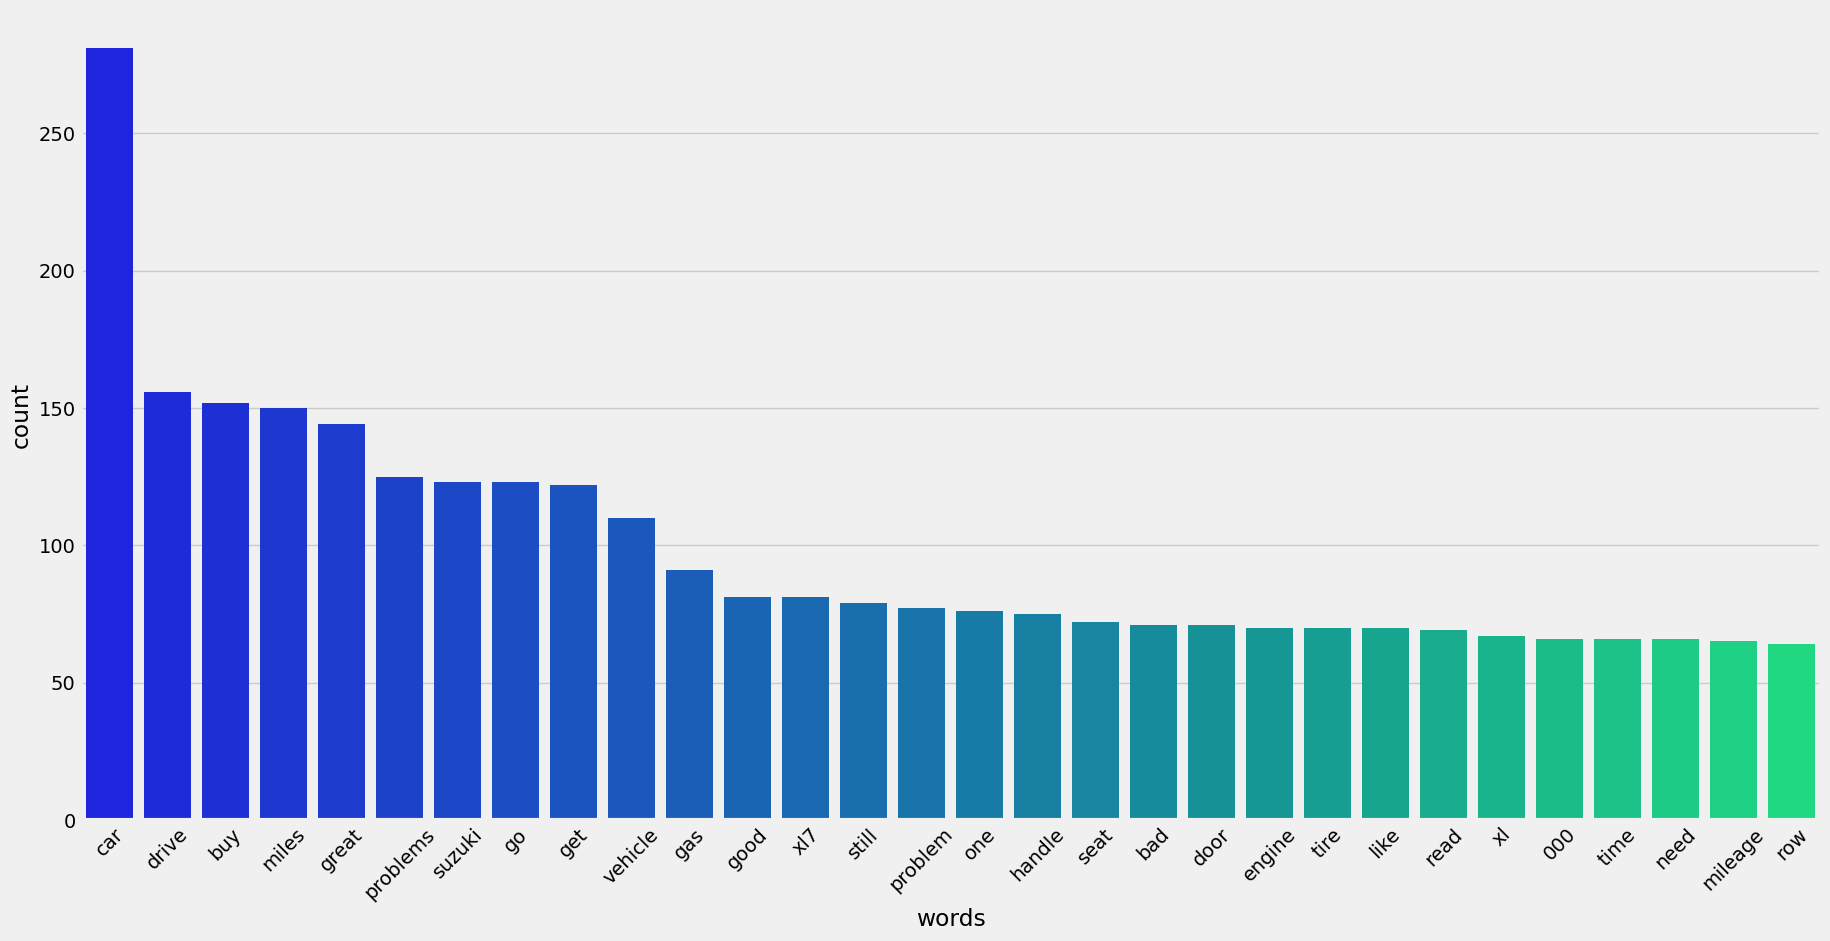

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_suzuki_neg['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_suzuki_neg['Review_Clean_List']]
df_suzuki_neg['Review_Clean'] = list(map(to_string, df_suzuki_neg['Review_Clean_List']))

# Join all word corpus
review_words_suzuki = ','.join(list(df_suzuki_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_suzuki = Counter(review_words_suzuki.split())
most_frequent = Counter_suzuki.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_suzuki_neg

Vehicle_Title  Rating  \
0            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   2.250   
1            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   4.750   
2            2006 Suzuki Reno Hatchback 4dr Hatchback (2.0L 4cyl 4A)   4.500   
3    2006 Suzuki Reno Hatchback Premium 4dr Hatchback (2.0L 4cyl 5M)   1.500   
4      2007 Suzuki Reno Hatchback 4dr Hatchback w/ABS (2.0L 4cyl 5M)   2.500   
..                                                               ...     ...   
232          2002 Suzuki XL-7 SUV Limited 2WD 4dr SUV (2.7L 6cyl 4A)   3.625   
233     2012 Suzuki Kizashi Sedan Sport SLS 4dr Sedan (2.4L 4cyl 6M)   5.000   
234       2011 Suzuki Kizashi Sedan SE 4dr Sedan AWD (2.4L 4cyl CVT)   5.000   
235       2011 Suzuki Kizashi Sedan SE 4dr Sedan AWD (2.4L 4cyl CVT)   4.250   
236      2010 Suzuki Kizashi Sedan GTS 4dr Sedan AWD (2.4L 4cyl CVT)   5.000   

                                                                         Full Review  \
0    The worst car ever! I purchased my vehicle in 2007. I hate it. It only has 3...   
1    Some Quirks To start, let me say I really do love this car.  But, it has had...   
2    Happy so far. We bought a 06 Reno a few years ago and so far has been a reli...   
3    Horrible Experience I bought this car to have a dependable vehicle.  It has ...   
4    Lousy car This car is riddled with electrical and sensor problems. Had to ge...   
..                                                                               ...   
232  Watch out for the air compressor My advice is to do serious research on the ...   
233  Great Car, Company NOT We love our Suzuki Kizashi SLS w/AWD ... great handli...   
234  Wish Suzuki was still making this car Buy this car if you have a chance for ...   
235  Terrible paint and warranty  I bought a 2011 around this time last year.From...   
236  10 out of 10  - Not your typical Suzuki I honestly was looking at Mercedes a...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
232       neg   
233       neg   
234       neg   
235       neg   
236       neg   

                                                                   Review_Clean_List  \
0    [worst, car, ever, purchase, vehicle, 2007, hate, 000, miles, transmission, ...   
1    [quirk, start, let, say, really, love, car, many, problems, make, annoy, tim...   
2    [happy, far, buy, 06, reno, years, ago, far, reliable, car, overall, like, c...   
3    [horrible, experience, buy, car, dependable, vehicle, many, problems, shop, ...   
4    [lousy, car, car, riddle, electrical, sensor, problems, get, replace, headli...   
..                                                                               ...   
232  [watch, air, compressor, advice, serious, research, xl, compressor, serious,...   
233  [great, car, company, love, suzuki, kizashi, sls, awd, great, handle, great,...   
234  [wish, suzuki, still, make, car, buy, car, chance, good, one, car, years, on...   
235  [terrible, paint, warranty, buy, 2011, around, time, last, year, mechanical,...   
236  [10, 10, typical, suzuki, honestly, look, mercedes, audi, c300, sport, a4, t...   

                                                                        Review_Clean  
0    worst car ever purchase vehicle 2007 hate 000 miles transmission fail air ba...  
1    quirk start let say really love car many problems make annoy time problem st...  
2    happy far buy 06 reno years ago far reliable car overall like car around 2is...  
3    horrible experience buy car dependable vehicle many problems shop transmissi...  
4    lousy car car riddle electrical sensor problems get replace headlights bad a...  
..                                                                               ...  
232  watch air compressor advice serious research xl compressor serious habit fre...  
233  great car company love suzuki kizashi sls awd great handle great radio com

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_suzuki_neg = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_suzuki_neg.fit_transform(df_suzuki_neg['Review_Clean'])

In [ ]:
topic_model_suzuki_neg.get_topic_info()

Topic  Count                             Name
0      0    153             0_car_get_suzuki_buy
1      1     19           1_xl7_minivan_3rd_snow
2      2     18  2_fenders_happen_vehicle_things
3      3     17          3_months_lemon_115_4300
4      4     15      4_compressor_serious_go_b04
5      5     15               5_38k_run_years_xl

In [ ]:
topic_model_suzuki_neg.get_topic(0)

[('car', 0.06642482185480604),
 ('get', 0.035911667393318907),
 ('suzuki', 0.03438722925817133),
 ('buy', 0.030974148537019294),
 ('drive', 0.03022901827994856),
 ('problems', 0.028807678502419037),
 ('great', 0.028291682905190785),
 ('go', 0.02711950264530928),
 ('miles', 0.023256478463351746),
 ('engine', 0.023070898470789136)]

In [ ]:
# Visualize top topic keywords
topic_model_suzuki_neg.visualize_barchart()

In [ ]:
topic_model_suzuki_neg.visualize_topics()

In [ ]:
topic_model_suzuki_neg.visualize_hierarchy()

In [ ]:
topic_model_suzuki_neg.visualize_heatmap()

# Toyota

## neg

In [ ]:
#toyota

In [ ]:
df_toyota_neg = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/toyota_neg.csv')

In [ ]:
df_toyota_neg

Review_Date        Author_Name  \
0      on 05/23/18 06:57 AM (PDT)      Bill From MI    
1      on 01/14/17 22:18 PM (PST)               Dan    
2      on 03/13/16 17:37 PM (PDT)           William    
3      on 02/25/10 08:13 AM (PST)              Mike    
4      on 10/29/08 17:41 PM (PDT)            sstred    
...                           ...                ...   
1656   on 12/02/06 08:09 AM (PST)            driver    
1657   on 10/04/05 13:49 PM (PDT)              Paul    
1658   on 06/23/02 00:00 AM (PDT)            Shekar    
1659   on 09/10/04 00:00 AM (PDT)  Celica fan in DC    
1660   on 08/17/07 13:02 PM (PDT)        cowgirlz07    

                                                       Vehicle_Title  \
0          2007 Toyota Avalon Sedan Touring 4dr Sedan (3.5L 6cyl 5A)   
1              2007 Toyota Avalon Sedan XLS 4dr Sedan (3.5L 6cyl 5A)   
2               2007 Toyota Avalon Sedan XL 4dr Sedan (3.5L 6cyl 5A)   
3          2007 Toyota Avalon Sedan Touring 4dr Sedan (3.5L 6cyl 5A)   
4          2007 Toyota Avalon Sedan Limited 4dr Sedan (3.5L 6cyl 5A)   
...                                                              ...   
1656  2001 Toyota Celica Hatchback GT-S 2dr Hatchback (1.8L 4cyl 6M)   
1657    2001 Toyota Celica Hatchback GT 2dr Hatchback (1.8L 4cyl 5M)   
1658    2001 Toyota Celica Hatchback GT 2dr Hatchback (1.8L 4cyl 5M)   
1659               1997 Toyota Celica Convertible GT 2dr Convertible   
1660                   1999 Toyota Celica Hatchback GT 2dr Hatchback   

                       Review_Title  \
0     280K MIles and Very Relieable   
1             Where's the old cars?   
2                          Nice car   
3                     steaming pile   
4                     2007 Limited    
...                             ...   
1656           Generally a nice car   
1657                Fun little car-   
1658                       The BEST   
1659                 Almost perfect   
1660                Wonderful Car!!   

                                                                               Review  \
0      I have owned a 2007 Touring model for 3 years.  I purchased with 180K miles...   
1      Where to begin.. I'm just a joe who likes to save money so forgive me for m...   
2                                                    Fun to drive. Have very problems   
3      This is the most disappointing car I've ever owned. Although it's comfortab...   
4      Had my Avalon about a year now.  Same problem as others with the window was...   
...                                                                               ...   
1656   All around this is a fun car to own.  Sometimes it's hard to find the right...   
1657   I bought this as my second car when my '95 Nissan Altima proved to be too m...   
1658   Well..  This is my first car, but I have\rdriven many others.  This one is ...   
1659   I finally settled on this car after a \ryear of shopping and have been happ...   
1660   I have always wanted a Celica. When I finally got one, I was so excited. Un...   

      Rating  \
0      5.000   
1      3.000   
2      5.000   
3      3.375   
4      4.750   
...      ...   
1656   4.000   
1657   4.750   
1658   5.000   
1659   4.750   
1660   4.875   

                                                                          Full Review  \
0     280K MIles and Very Relieable I have owned a 2007 Touring model for 3 years....   
1     Where's the old cars? Where to begin.. I'm just a joe who likes to save mone...   
2                                           Nice car Fun to drive. Have very problems   
3     steaming pile This is the most disappointing car I've ever owned. Although i...   
4     2007 Limited  Had my Avalon about a year now.  Same problem as others with t...   
...                                                                               ...   
1656  Generally a nice car All around this is a fun car to own.  Sometimes it's ha...   
1657  Fun little car- I bought this as my

In [ ]:
df_toyota_neg.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_toyota_neg

Vehicle_Title  Rating  \
0          2007 Toyota Avalon Sedan Touring 4dr Sedan (3.5L 6cyl 5A)   5.000   
1              2007 Toyota Avalon Sedan XLS 4dr Sedan (3.5L 6cyl 5A)   3.000   
2               2007 Toyota Avalon Sedan XL 4dr Sedan (3.5L 6cyl 5A)   5.000   
3          2007 Toyota Avalon Sedan Touring 4dr Sedan (3.5L 6cyl 5A)   3.375   
4          2007 Toyota Avalon Sedan Limited 4dr Sedan (3.5L 6cyl 5A)   4.750   
...                                                              ...     ...   
1656  2001 Toyota Celica Hatchback GT-S 2dr Hatchback (1.8L 4cyl 6M)   4.000   
1657    2001 Toyota Celica Hatchback GT 2dr Hatchback (1.8L 4cyl 5M)   4.750   
1658    2001 Toyota Celica Hatchback GT 2dr Hatchback (1.8L 4cyl 5M)   5.000   
1659               1997 Toyota Celica Convertible GT 2dr Convertible   4.750   
1660                   1999 Toyota Celica Hatchback GT 2dr Hatchback   4.875   

                                                                          Full Review  \
0     280K MIles and Very Relieable I have owned a 2007 Touring model for 3 years....   
1     Where's the old cars? Where to begin.. I'm just a joe who likes to save mone...   
2                                           Nice car Fun to drive. Have very problems   
3     steaming pile This is the most disappointing car I've ever owned. Although i...   
4     2007 Limited  Had my Avalon about a year now.  Same problem as others with t...   
...                                                                               ...   
1656  Generally a nice car All around this is a fun car to own.  Sometimes it's ha...   
1657  Fun little car- I bought this as my second car when my '95 Nissan Altima pro...   
1658  The BEST Well..  This is my first car, but I have\rdriven many others.  This...   
1659  Almost perfect I finally settled on this car after a \ryear of shopping and ...   
1660  Wonderful Car!! I have always wanted a Celica. When I finally got one, I was...   

     sentiment  
0          neg  
1          neg  
2          neg  
3          neg  
4          neg  
...        ...  
1656       neg  
1657       neg  
1658       neg  
1659       neg  
1660       neg  

[1661 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_toyota_neg['Review_Clean_List'] = list(map(text_preprocessing, df_toyota_neg['Full Review']))

# Return to string with to_string function
df_toyota_neg['Review_Clean'] = list(map(to_string, df_toyota_neg['Review_Clean_List']))

In [ ]:
df_toyota_neg

Vehicle_Title  Rating  \
0          2007 Toyota Avalon Sedan Touring 4dr Sedan (3.5L 6cyl 5A)   5.000   
1              2007 Toyota Avalon Sedan XLS 4dr Sedan (3.5L 6cyl 5A)   3.000   
2               2007 Toyota Avalon Sedan XL 4dr Sedan (3.5L 6cyl 5A)   5.000   
3          2007 Toyota Avalon Sedan Touring 4dr Sedan (3.5L 6cyl 5A)   3.375   
4          2007 Toyota Avalon Sedan Limited 4dr Sedan (3.5L 6cyl 5A)   4.750   
...                                                              ...     ...   
1656  2001 Toyota Celica Hatchback GT-S 2dr Hatchback (1.8L 4cyl 6M)   4.000   
1657    2001 Toyota Celica Hatchback GT 2dr Hatchback (1.8L 4cyl 5M)   4.750   
1658    2001 Toyota Celica Hatchback GT 2dr Hatchback (1.8L 4cyl 5M)   5.000   
1659               1997 Toyota Celica Convertible GT 2dr Convertible   4.750   
1660                   1999 Toyota Celica Hatchback GT 2dr Hatchback   4.875   

                                                                          Full Review  \
0     280K MIles and Very Relieable I have owned a 2007 Touring model for 3 years....   
1     Where's the old cars? Where to begin.. I'm just a joe who likes to save mone...   
2                                           Nice car Fun to drive. Have very problems   
3     steaming pile This is the most disappointing car I've ever owned. Although i...   
4     2007 Limited  Had my Avalon about a year now.  Same problem as others with t...   
...                                                                               ...   
1656  Generally a nice car All around this is a fun car to own.  Sometimes it's ha...   
1657  Fun little car- I bought this as my second car when my '95 Nissan Altima pro...   
1658  The BEST Well..  This is my first car, but I have\rdriven many others.  This...   
1659  Almost perfect I finally settled on this car after a \ryear of shopping and ...   
1660  Wonderful Car!! I have always wanted a Celica. When I finally got one, I was...   

     sentiment  \
0          neg   
1          neg   
2          neg   
3          neg   
4          neg   
...        ...   
1656       neg   
1657       neg   
1658       neg   
1659       neg   
1660       neg   

                                                                    Review_Clean_List  \
0     [280k, miles, and, very, relieable, have, own, 2007, tour, model, for, years...   
1     [where, be, the, old, cars, where, to, begin, be, just, joe, who, like, to, ...   
2                                   [nice, car, fun, to, drive, have, very, problems]   
3     [steam, pile, this, be, the, most, disappoint, car, have, ever, own, althoug...   
4     [2007, limit, have, my, avalon, about, year, now, same, problem, as, others,...   
...                                                                               ...   
1656  [generally, nice, car, all, around, this, be, fun, car, to, own, sometimes, ...   
1657  [fun, little, car, buy, this, as, my, second, car, when, my, 95, nissan, alt...   
1658  [the, best, well, this, be, my, first, car, but, have, drive, many, others, ...   
1659  [almost, perfect, finally, settle, on, this, car, after, year, of, shop, and...   
1660  [wonderful, car, have, always, want, celica, when, finally, get, one, be, so...   

                                                                         Review_Clean  
0     280k miles and very relieable have own 2007 tour model for years purchase wi...  
1     where be the old cars where to begin be just joe who like to save money so f...  
2                                            nice car fun to drive have very problems  
3     steam pile this be the most disappoint car have ever own although it be comf...  
4     2007 limit have my avalon about year now same problem as others with the win...  
...                                                                               ...  
1656  generally nice car all around this be fun car to own sometimes it be hard to...  
1657  fun little car buy this as my

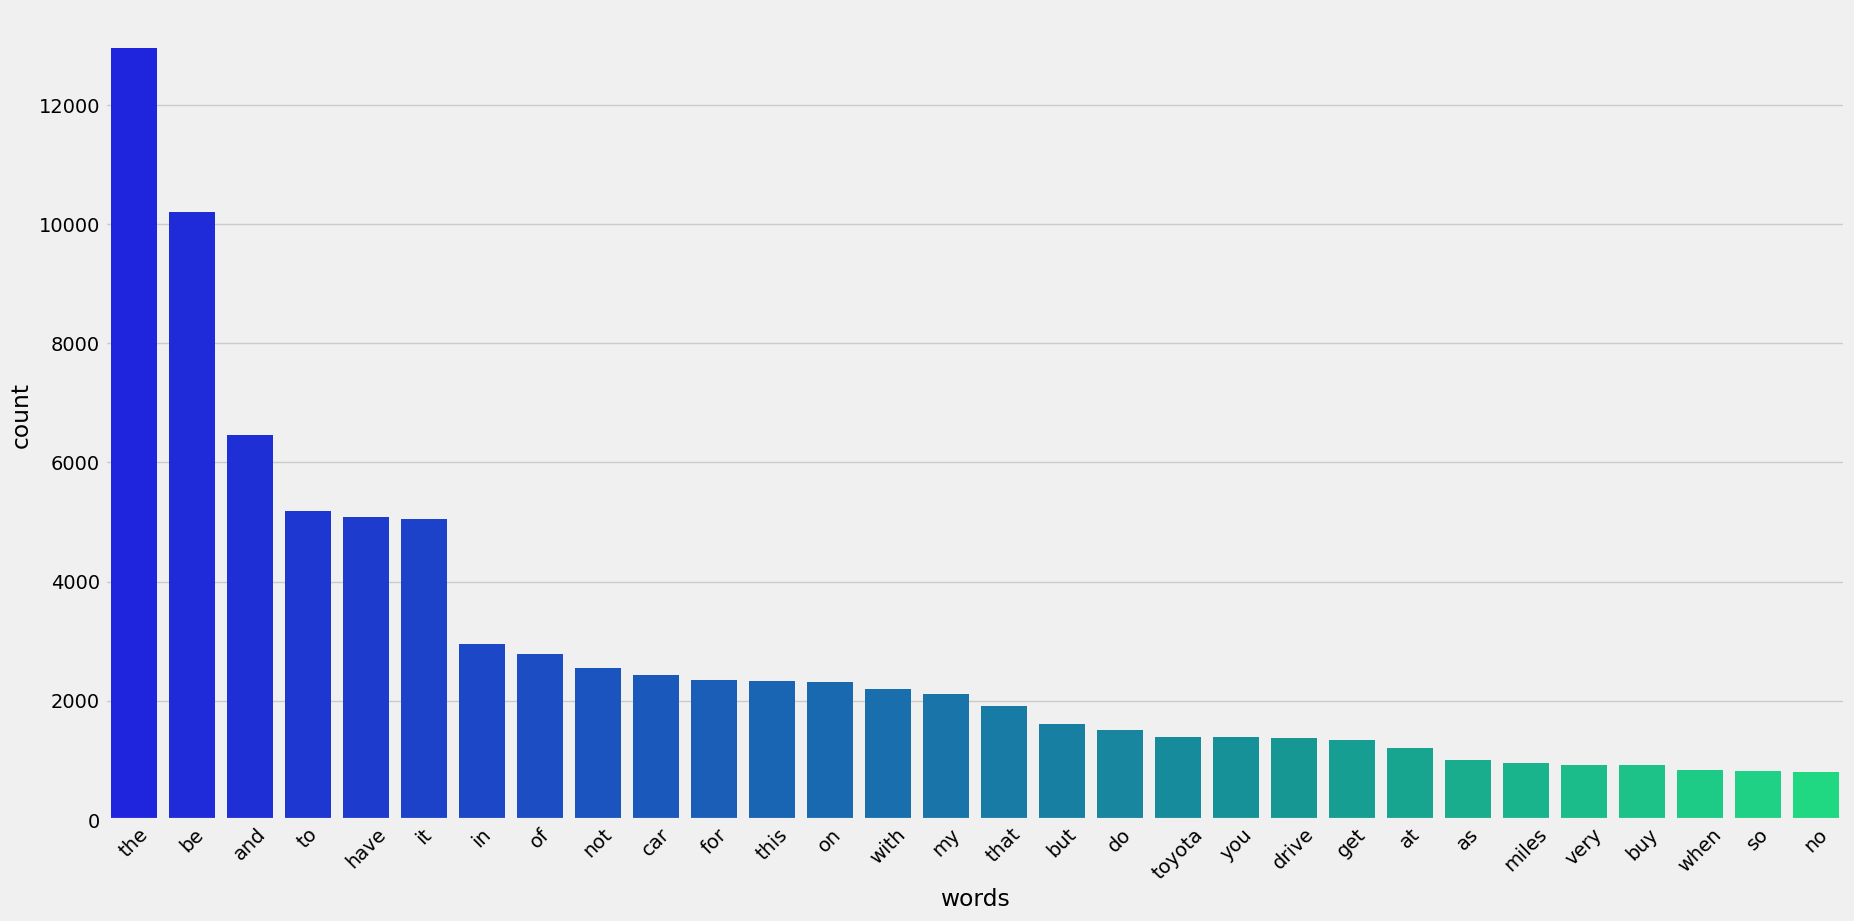

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_toyota = ','.join(list(df_toyota_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_toyota = Counter(review_words_toyota.split())
most_frequent = Counter_toyota.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'get'),
  Text(3, 0, 'miles'),
  Text(4, 0, 'buy'),
  Text(5, 0, 'like'),
  Text(6, 0, 'seat'),
  Text(7, 0, 'truck'),
  Text(8, 0, 'great'),
  Text(9, 0, 'would'),
  Text(10, 0, 'vehicle'),
  Text(11, 0, 'go'),
  Text(12, 0, 'time'),
  Text(13, 0, 'one'),
  Text(14, 0, 'problem'),
  Text(15, 0, 'new'),
  Text(16, 0, '000'),
  Text(17, 0, 'back'),
  Text(18, 0, 'make'),
  Text(19, 0, 'good'),
  Text(20, 0, 'mpg'),
  Text(21, 0, 'use'),
  Text(22, 0, 'tire'),
  Text(23, 0, 'gas'),
  Text(24, 0, 'engine'),
  Text(25, 0, 'mileage'),
  Text(26, 0, 'replace'),
  Text(27, 0, 'look'),
  Text(28, 0, 'still'),
  Text(29, 0, 'problems')])

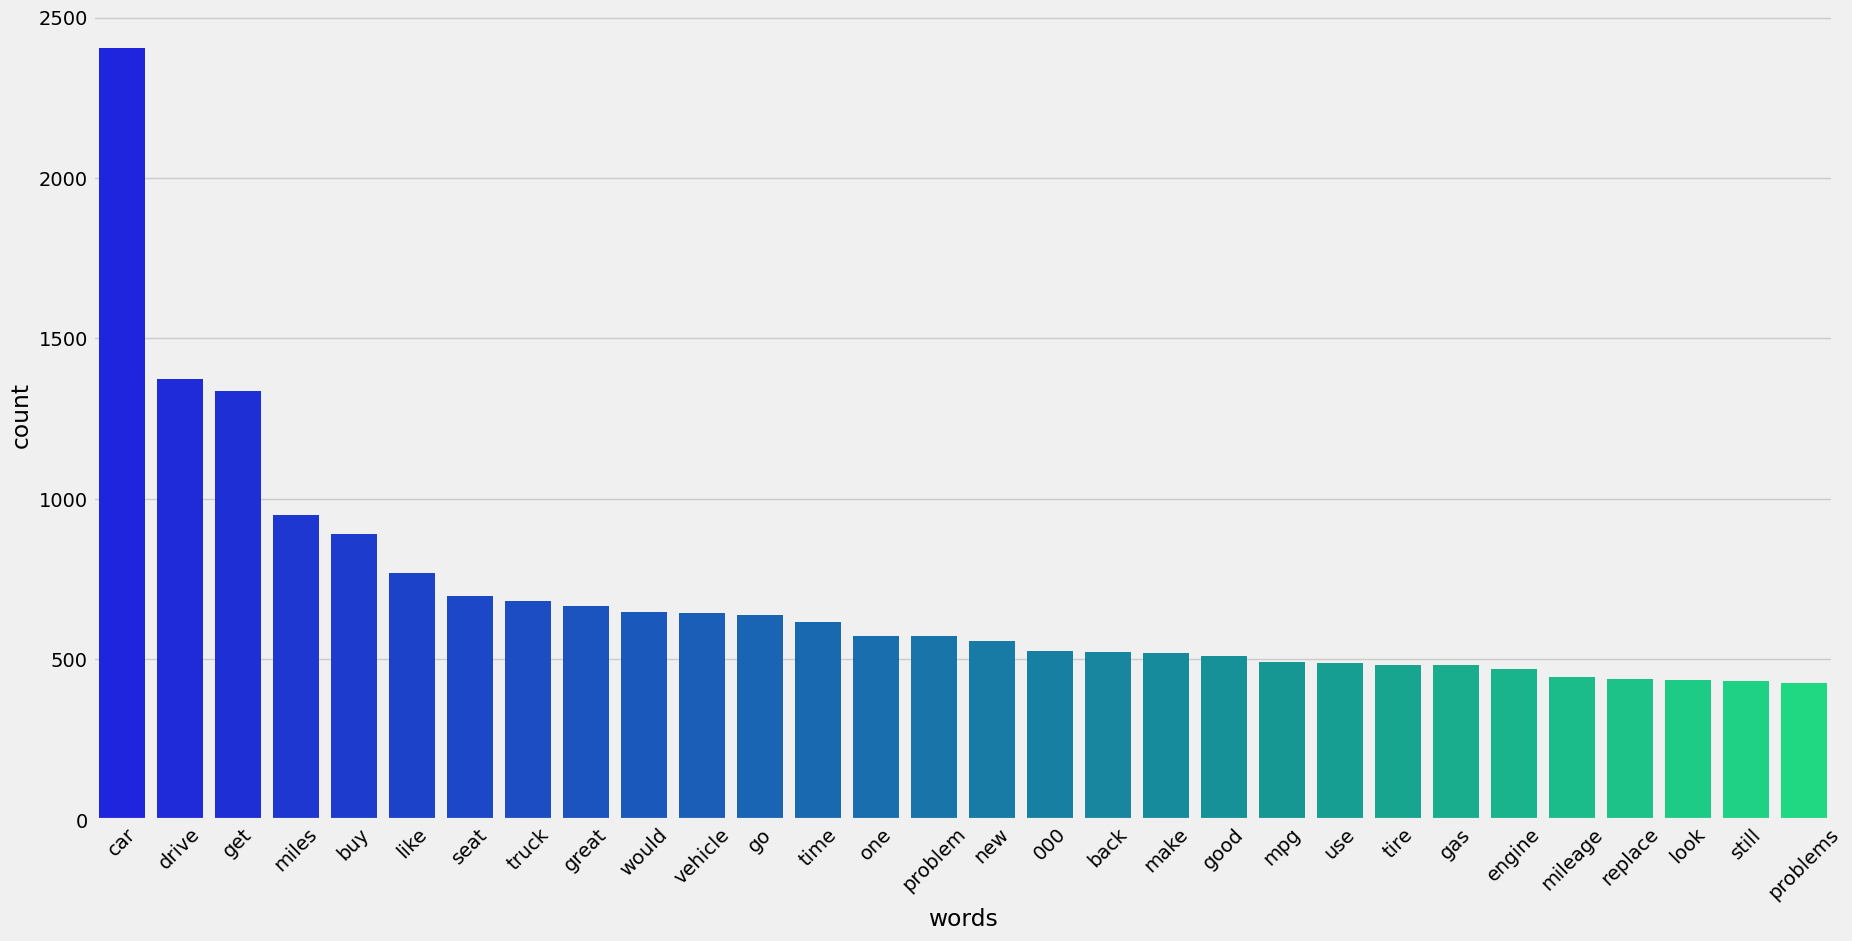

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
stopwords_list.extend(['jaguar','suzuki','toyota'])

df_toyota_neg['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_toyota_neg['Review_Clean_List']]
df_toyota_neg['Review_Clean'] = list(map(to_string, df_toyota_neg['Review_Clean_List']))

# Join all word corpus
review_words_toyota = ','.join(list(df_toyota_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_toyota = Counter(review_words_toyota.split())
most_frequent = Counter_toyota.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_toyota_neg

Vehicle_Title  Rating  \
0          2007 Toyota Avalon Sedan Touring 4dr Sedan (3.5L 6cyl 5A)   5.000   
1              2007 Toyota Avalon Sedan XLS 4dr Sedan (3.5L 6cyl 5A)   3.000   
2               2007 Toyota Avalon Sedan XL 4dr Sedan (3.5L 6cyl 5A)   5.000   
3          2007 Toyota Avalon Sedan Touring 4dr Sedan (3.5L 6cyl 5A)   3.375   
4          2007 Toyota Avalon Sedan Limited 4dr Sedan (3.5L 6cyl 5A)   4.750   
...                                                              ...     ...   
1656  2001 Toyota Celica Hatchback GT-S 2dr Hatchback (1.8L 4cyl 6M)   4.000   
1657    2001 Toyota Celica Hatchback GT 2dr Hatchback (1.8L 4cyl 5M)   4.750   
1658    2001 Toyota Celica Hatchback GT 2dr Hatchback (1.8L 4cyl 5M)   5.000   
1659               1997 Toyota Celica Convertible GT 2dr Convertible   4.750   
1660                   1999 Toyota Celica Hatchback GT 2dr Hatchback   4.875   

                                                                          Full Review  \
0     280K MIles and Very Relieable I have owned a 2007 Touring model for 3 years....   
1     Where's the old cars? Where to begin.. I'm just a joe who likes to save mone...   
2                                           Nice car Fun to drive. Have very problems   
3     steaming pile This is the most disappointing car I've ever owned. Although i...   
4     2007 Limited  Had my Avalon about a year now.  Same problem as others with t...   
...                                                                               ...   
1656  Generally a nice car All around this is a fun car to own.  Sometimes it's ha...   
1657  Fun little car- I bought this as my second car when my '95 Nissan Altima pro...   
1658  The BEST Well..  This is my first car, but I have\rdriven many others.  This...   
1659  Almost perfect I finally settled on this car after a \ryear of shopping and ...   
1660  Wonderful Car!! I have always wanted a Celica. When I finally got one, I was...   

     sentiment  \
0          neg   
1          neg   
2          neg   
3          neg   
4          neg   
...        ...   
1656       neg   
1657       neg   
1658       neg   
1659       neg   
1660       neg   

                                                                    Review_Clean_List  \
0     [280k, miles, relieable, 2007, tour, model, years, purchase, 180k, miles, le...   
1     [old, cars, begin, joe, like, save, money, forgive, rant, stop, read, part, ...   
2                                                   [nice, car, fun, drive, problems]   
3     [steam, pile, disappoint, car, ever, although, comfortable, quiet, roomy, gr...   
4     [2007, limit, avalon, year, problem, others, window, washer, fluid, problems...   
...                                                                               ...   
1656  [generally, nice, car, around, fun, car, sometimes, hard, find, right, gear,...   
1657  [fun, little, car, buy, second, car, 95, nissan, altima, prove, much, lemon,...   
1658  [best, well, first, car, drive, many, others, one, best, steer, smooth, cont...   
1659  [almost, perfect, finally, settle, car, year, shop, happy, ever, since, cock...   
1660  [wonderful, car, always, want, celica, finally, get, one, excite, unfortunat...   

                                                                         Review_Clean  
0     280k miles relieable 2007 tour model years purchase 180k miles lexus ls430 t...  
1     old cars begin joe like save money forgive rant stop read part buy car 20 00...  
2                                                         nice car fun drive problems  
3     steam pile disappoint car ever although comfortable quiet roomy great stereo...  
4     2007 limit avalon year problem others window washer fluid problems except pa...  
...                                                                               ...  
1656  generally nice car around fun car sometimes hard find right gear shift enoug...  
1657  fun little car buy second car

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_toyota_neg = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_toyota_neg.fit_transform(df_toyota_neg['Review_Clean'])

In [ ]:
topic_model_toyota_neg.get_topic_info()

Topic  Count                                  Name
0      -1    759                -1_car_drive_get_miles
1       0     87                   0_camry_car_buy_get
2       1     65                 1_corolla_car_buy_cvt
3       2     64                2_avalon_car_ride_year
4       3     58                3_rav4_noise_rav_sound
5       4     56         4_highlander_seat_vehicle_row
6       5     51           5_sienna_door_slide_minivan
7       6     50                6_prius_hybrid_car_get
8       7     49                   7_car_drive_get_one
9       8     38             8_truck_great_best_tacoma
10      9     25                9_tundra_truck_tow_cab
11     10     23                10_light_car_good_nice
12     11     23    11_seat_uncomfortable_back_cushion
13     12     23         12_solara_convertible_car_top
14     13     22        13_system_navigation_nav_phone
15     14     21             14_mpg_mileage_drive_city
16     15     21           15_4runner_sr5_2010_vehicle
17     16     19             16_oil_engine_burn_recall
18     17     19                 17_miles_car_100k_000
19     18     17  18_tacoma_transmission_problem_truck
20     19     17           19_start_car_dealer_battery
21     20     16             20_truck_brake_take_miles
22     21     16                21_suv_great_room_seat
23     22     16                22_great_car_hill_good
24     23     16          23_tire_bridgestone_flat_put
25     24     15             24_truck_key_tacoma_shift
26     25     15                25_fj_road_vehicle_get
27     26     14                 26_car_best_echo_ever
28     27     14        27_transmission_gear_rpm_shift
29     28     12                 28_celica_car_gts_fun
30     29     10          29_blind_spot_caravan_safety
31     30     10            30_great_miles_get_highway

In [ ]:
topic_model_toyota_neg.get_topic(2)

[('avalon', 0.08814128472456717),
 ('car', 0.02043399076016192),
 ('ride', 0.019931783193190583),
 ('year', 0.01697770765348994),
 ('drive', 0.01594067054996614),
 ('limit', 0.015670034888363226),
 ('lexus', 0.01545677574636316),
 ('miles', 0.01495687641335994),
 ('000', 0.014695939793609707),
 ('2014', 0.013567297624582773)]

In [ ]:
# Visualize top topic keywords
topic_model_toyota_neg.visualize_barchart()

In [ ]:
topic_model_toyota_neg.visualize_topics()

In [ ]:
topic_model_toyota_neg.visualize_hierarchy()

In [ ]:
topic_model_toyota_neg.visualize_heatmap()

# Volkswagon

## neg

In [ ]:
#volkswagon

In [ ]:
df_vw_neg = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/vw_neg.csv')

In [ ]:
df_vw_neg

Review_Date       Author_Name  \
0      on 07/07/10 05:28 AM (PDT)   carlo frazzano    
1      on 10/19/09 21:41 PM (PDT)  NewBeetleDriver    
2      on 07/19/16 06:27 AM (PDT)           bmccoy    
3      on 09/04/13 12:00 PM (PDT)         eliteboi    
4      on 08/15/09 09:35 AM (PDT)        nlinldsey    
...                           ...               ...   
1041   on 03/26/12 09:38 AM (PDT)           tom365    
1042   on 08/17/16 10:02 AM (PDT)            Brett    
1043   on 05/02/16 01:32 AM (PDT)  Edzel Duquiatan    
1044   on 03/03/16 21:51 PM (PST)             kc45    
1045   on 01/05/16 00:40 AM (PST)            Jason    

                                                                        Vehicle_Title  \
0      2007 Volkswagen New Beetle Convertible 2.5 PZEV 2dr Convertible (2.5L 5cyl 6A)   
1     2007 Volkswagen New Beetle Convertible Triple White PZEV 2dr Convertible (2....   
2               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 6A)   
3               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 5M)   
4               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 6A)   
...                                                                               ...   
1041  2012 Volkswagen Tiguan SUV SEL 4Motion 4dr SUV AWD w/Premium Navigation, Dyn...   
1042                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
1043            2016 Volkswagen Tiguan SUV S 4Motion 4dr SUV AWD (2.0L 4cyl Turbo 6A)   
1044            2016 Volkswagen Tiguan SUV S 4Motion 4dr SUV AWD (2.0L 4cyl Turbo 6A)   
1045                       2016 Volkswagen Tiguan SUV SE 4dr SUV (2.0L 4cyl Turbo 6A)   

                                          Review_Title  \
0                                       Quality Review   
1                                             Adore it   
2                                           yellow bug   
3        My second New Beetle not as good as the first   
4                                             Love it!   
...                                                ...   
1041    Great compact SUV, except for the transmission   
1042                                    Love and Hate.   
1043              More than the Reviews would tell you   
1044  Highly Recommended for travel in snow/icy roads!   
1045                             Quality Over Quantity   

                                                                               Review  \
0      We bought the car new in 2007 and are generally satisfied. Mechanically the...   
1      I adore my New Beetle. Even though I'm a male, I get compliments from my ot...   
2      this is one of the best cars I have owned.  Loads of pep and manuvervabilit...   
3      I previously owned a 2000 New Beetle 1.8T. That car was GREAT. It gave me v...   
4      This was my 2nd Beetle and I absolutely love this car! I recently sold mine...   
...                                                                               ...   
1041   This is an excellent SUV; great build quality, fun to drive, practical, rid...   
1042   I bought the 2016 Tiguan S fwd in November 2015 (9months ago) as my first b...   
1043   I have always driven either a sedan or a hatch all my life. Except for the ...   
1044   I have had this car for about a month now and could not be happier. I had b...   
1045   Smaller dimensions and my driving experience put the Tiguan in a class of i...   

      Rating  \
0      4.375   
1      4.375   
2      5.000   
3      3.125   
4      5.000   
...      ...   
1041   4.250   
1042   3.000   
1043   4.000   
1044   5.000   
1045   5.000   

                                                                          Full Review  \
0     Quality Review We bought the car new in 2007 and are generally satisfied. Me...   
1     Adore it I adore my New Beetle. Even though I'm a male, I get compliments fr...   
2     yellow bug this is one of the best cars I have owned.  Loads

In [ ]:
df_vw_neg.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_vw_neg

Vehicle_Title  \
0      2007 Volkswagen New Beetle Convertible 2.5 PZEV 2dr Convertible (2.5L 5cyl 6A)   
1     2007 Volkswagen New Beetle Convertible Triple White PZEV 2dr Convertible (2....   
2               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 6A)   
3               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 5M)   
4               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 6A)   
...                                                                               ...   
1041  2012 Volkswagen Tiguan SUV SEL 4Motion 4dr SUV AWD w/Premium Navigation, Dyn...   
1042                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
1043            2016 Volkswagen Tiguan SUV S 4Motion 4dr SUV AWD (2.0L 4cyl Turbo 6A)   
1044            2016 Volkswagen Tiguan SUV S 4Motion 4dr SUV AWD (2.0L 4cyl Turbo 6A)   
1045                       2016 Volkswagen Tiguan SUV SE 4dr SUV (2.0L 4cyl Turbo 6A)   

      Rating  \
0      4.375   
1      4.375   
2      5.000   
3      3.125   
4      5.000   
...      ...   
1041   4.250   
1042   3.000   
1043   4.000   
1044   5.000   
1045   5.000   

                                                                          Full Review  \
0     Quality Review We bought the car new in 2007 and are generally satisfied. Me...   
1     Adore it I adore my New Beetle. Even though I'm a male, I get compliments fr...   
2     yellow bug this is one of the best cars I have owned.  Loads of pep and manu...   
3     My second New Beetle not as good as the first I previously owned a 2000 New ...   
4     Love it! This was my 2nd Beetle and I absolutely love this car! I recently s...   
...                                                                               ...   
1041  Great compact SUV, except for the transmission This is an excellent SUV; gre...   
1042  Love and Hate. I bought the 2016 Tiguan S fwd in November 2015 (9months ago)...   
1043  More than the Reviews would tell you I have always driven either a sedan or ...   
1044  Highly Recommended for travel in snow/icy roads! I have had this car for abo...   
1045  Quality Over Quantity Smaller dimensions and my driving experience put the T...   

     sentiment  
0          neg  
1          neg  
2          neg  
3          neg  
4          neg  
...        ...  
1041       neg  
1042       neg  
1043       neg  
1044       neg  
1045       neg  

[1046 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_vw_neg['Review_Clean_List'] = list(map(text_preprocessing, df_vw_neg['Full Review']))

# Return to string with to_string function
df_vw_neg['Review_Clean'] = list(map(to_string, df_vw_neg['Review_Clean_List']))

In [ ]:
df_vw_neg

Vehicle_Title  \
0      2007 Volkswagen New Beetle Convertible 2.5 PZEV 2dr Convertible (2.5L 5cyl 6A)   
1     2007 Volkswagen New Beetle Convertible Triple White PZEV 2dr Convertible (2....   
2               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 6A)   
3               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 5M)   
4               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 6A)   
...                                                                               ...   
1041  2012 Volkswagen Tiguan SUV SEL 4Motion 4dr SUV AWD w/Premium Navigation, Dyn...   
1042                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
1043            2016 Volkswagen Tiguan SUV S 4Motion 4dr SUV AWD (2.0L 4cyl Turbo 6A)   
1044            2016 Volkswagen Tiguan SUV S 4Motion 4dr SUV AWD (2.0L 4cyl Turbo 6A)   
1045                       2016 Volkswagen Tiguan SUV SE 4dr SUV (2.0L 4cyl Turbo 6A)   

      Rating  \
0      4.375   
1      4.375   
2      5.000   
3      3.125   
4      5.000   
...      ...   
1041   4.250   
1042   3.000   
1043   4.000   
1044   5.000   
1045   5.000   

                                                                          Full Review  \
0     Quality Review We bought the car new in 2007 and are generally satisfied. Me...   
1     Adore it I adore my New Beetle. Even though I'm a male, I get compliments fr...   
2     yellow bug this is one of the best cars I have owned.  Loads of pep and manu...   
3     My second New Beetle not as good as the first I previously owned a 2000 New ...   
4     Love it! This was my 2nd Beetle and I absolutely love this car! I recently s...   
...                                                                               ...   
1041  Great compact SUV, except for the transmission This is an excellent SUV; gre...   
1042  Love and Hate. I bought the 2016 Tiguan S fwd in November 2015 (9months ago)...   
1043  More than the Reviews would tell you I have always driven either a sedan or ...   
1044  Highly Recommended for travel in snow/icy roads! I have had this car for abo...   
1045  Quality Over Quantity Smaller dimensions and my driving experience put the T...   

     sentiment  \
0          neg   
1          neg   
2          neg   
3          neg   
4          neg   
...        ...   
1041       neg   
1042       neg   
1043       neg   
1044       neg   
1045       neg   

                                                                    Review_Clean_List  \
0     [quality, review, we, buy, the, car, new, in, 2007, and, be, generally, sati...   
1     [adore, it, adore, my, new, beetle, even, though, be, male, get, compliment,...   
2     [yellow, bug, this, be, one, of, the, best, cars, have, own, load, of, pep, ...   
3     [my, second, new, beetle, not, as, good, as, the, first, previously, own, 20...   
4     [love, it, this, be, my, 2nd, beetle, and, absolutely, love, this, car, rece...   
...                                                                               ...   
1041  [great, compact, suv, except, for, the, transmission, this, be, an, excellen...   
1042  [love, and, hate, buy, the, 2016, tiguan, fwd, in, november, 2015, 9months, ...   
1043  [more, than, the, review, would, tell, you, have, always, drive, either, sed...   
1044  [highly, recommend, for, travel, in, snow, icy, roads, have, have, this, car...   
1045  [quality, over, quantity, smaller, dimension, and, my, drive, experience, pu...   

                                                                         Review_Clean  
0     quality review we buy the car new in 2007 and be generally satisfy mechanica...  
1     adore it adore my new beetle even though be male get compliment from my othe...  
2     yellow bug this be one of the best cars have own load of pep and manuvervabi...  
3     my second new beetle not as good as the first previously own 2000 new beetle...  
4     love it t

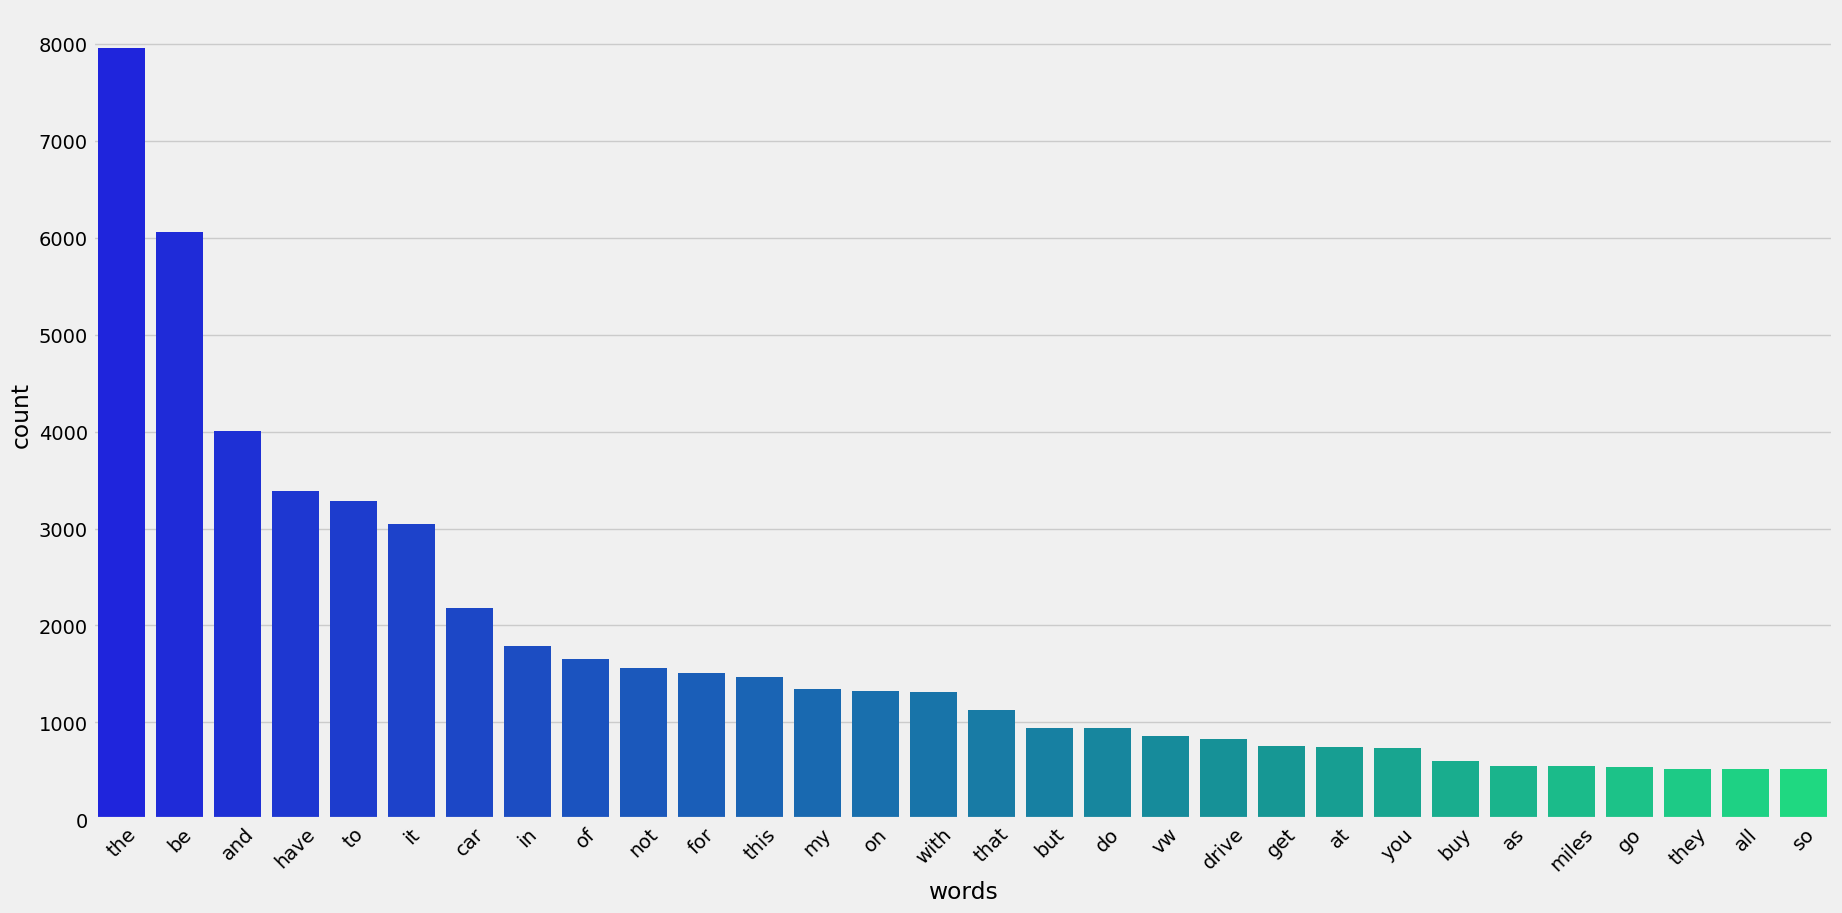

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_vw = ','.join(list(df_vw_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_vw = Counter(review_words_vw.split())
most_frequent = Counter_vw.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'vw'),
  Text(2, 0, 'drive'),
  Text(3, 0, 'get'),
  Text(4, 0, 'buy'),
  Text(5, 0, 'miles'),
  Text(6, 0, 'go'),
  Text(7, 0, 'problems'),
  Text(8, 0, 'time'),
  Text(9, 0, 'engine'),
  Text(10, 0, 'replace'),
  Text(11, 0, 'great'),
  Text(12, 0, 'one'),
  Text(13, 0, 'like'),
  Text(14, 0, 'would'),
  Text(15, 0, 'seat'),
  Text(16, 0, 'problem'),
  Text(17, 0, '000'),
  Text(18, 0, 'new'),
  Text(19, 0, 'love'),
  Text(20, 0, 'back'),
  Text(21, 0, 'dealer'),
  Text(22, 0, 'light'),
  Text(23, 0, 'make'),
  Text(24, 0, 'good'),
  Text(25, 0, 'look'),
  Text(26, 0, 'use'),
  Text(27, 0, 'take'),
  Text(28, 0, 'break'),
  Text(29, 0, 'first')])

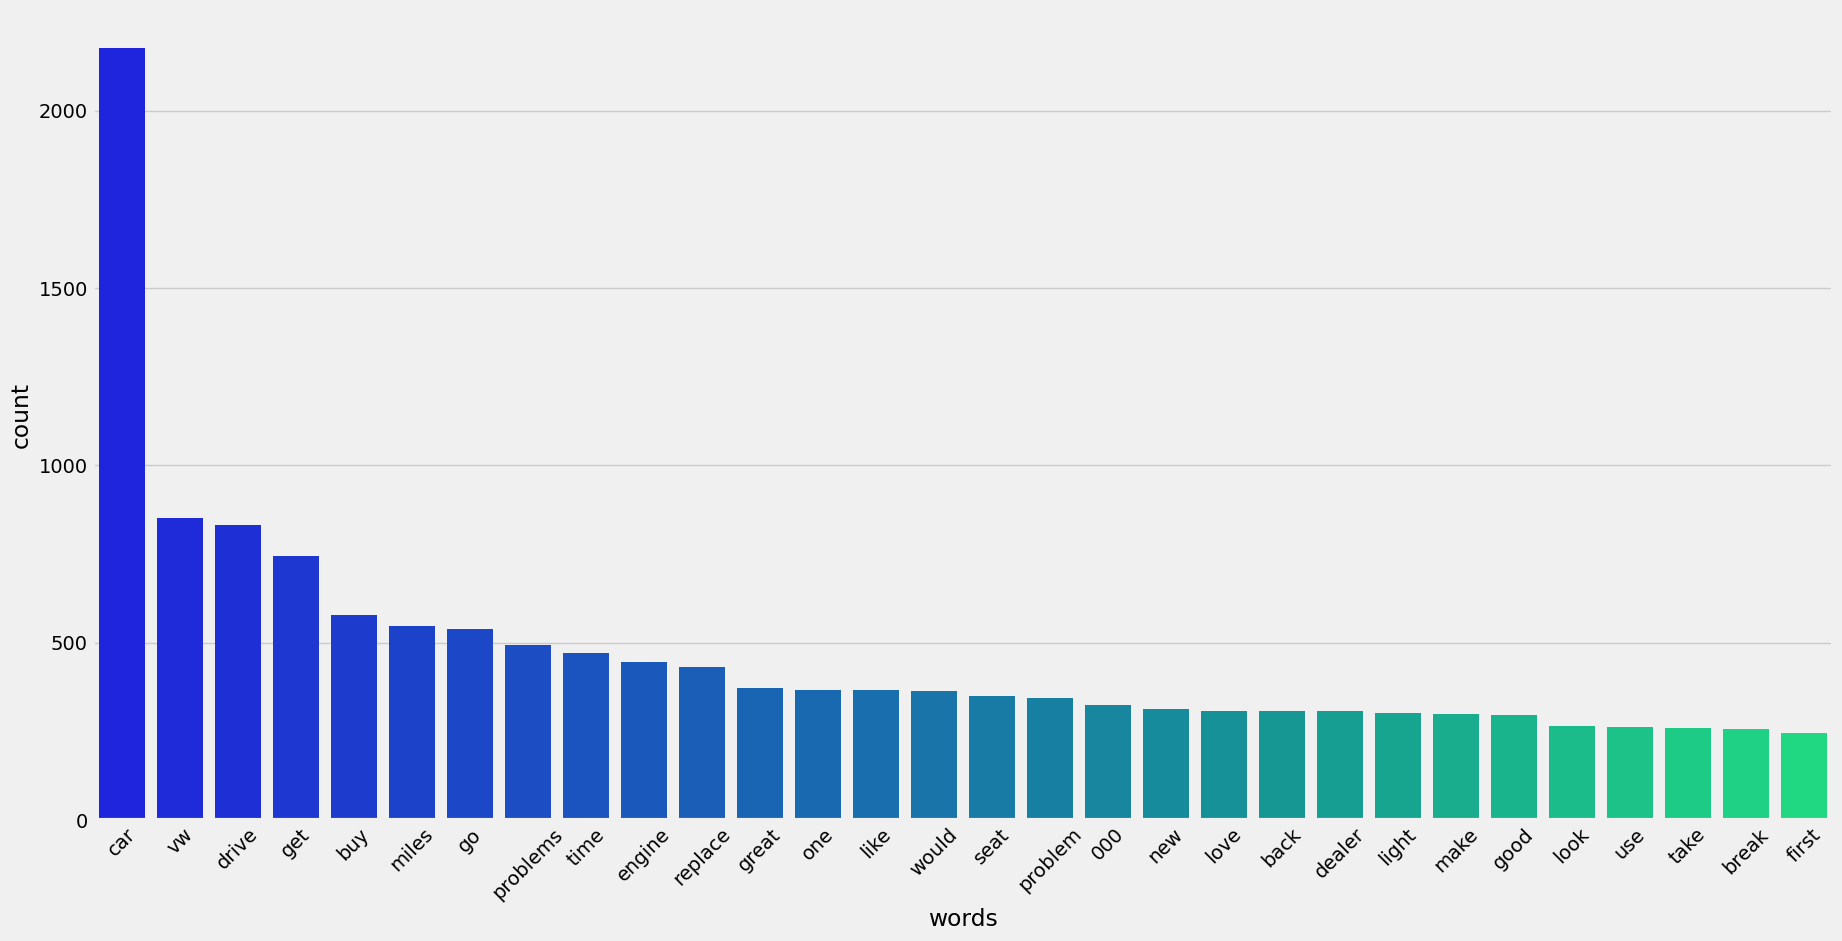

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_vw_neg['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_vw_neg['Review_Clean_List']]
df_vw_neg['Review_Clean'] = list(map(to_string, df_vw_neg['Review_Clean_List']))

# Join all word corpus
review_words_vw = ','.join(list(df_vw_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_vw = Counter(review_words_vw.split())
most_frequent = Counter_vw.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_vw_neg

Vehicle_Title  \
0      2007 Volkswagen New Beetle Convertible 2.5 PZEV 2dr Convertible (2.5L 5cyl 6A)   
1     2007 Volkswagen New Beetle Convertible Triple White PZEV 2dr Convertible (2....   
2               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 6A)   
3               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 5M)   
4               2007 Volkswagen New Beetle Hatchback 2.5 2dr Hatchback (2.5L 5cyl 6A)   
...                                                                               ...   
1041  2012 Volkswagen Tiguan SUV SEL 4Motion 4dr SUV AWD w/Premium Navigation, Dyn...   
1042                        2016 Volkswagen Tiguan SUV S 4dr SUV (2.0L 4cyl Turbo 6A)   
1043            2016 Volkswagen Tiguan SUV S 4Motion 4dr SUV AWD (2.0L 4cyl Turbo 6A)   
1044            2016 Volkswagen Tiguan SUV S 4Motion 4dr SUV AWD (2.0L 4cyl Turbo 6A)   
1045                       2016 Volkswagen Tiguan SUV SE 4dr SUV (2.0L 4cyl Turbo 6A)   

      Rating  \
0      4.375   
1      4.375   
2      5.000   
3      3.125   
4      5.000   
...      ...   
1041   4.250   
1042   3.000   
1043   4.000   
1044   5.000   
1045   5.000   

                                                                          Full Review  \
0     Quality Review We bought the car new in 2007 and are generally satisfied. Me...   
1     Adore it I adore my New Beetle. Even though I'm a male, I get compliments fr...   
2     yellow bug this is one of the best cars I have owned.  Loads of pep and manu...   
3     My second New Beetle not as good as the first I previously owned a 2000 New ...   
4     Love it! This was my 2nd Beetle and I absolutely love this car! I recently s...   
...                                                                               ...   
1041  Great compact SUV, except for the transmission This is an excellent SUV; gre...   
1042  Love and Hate. I bought the 2016 Tiguan S fwd in November 2015 (9months ago)...   
1043  More than the Reviews would tell you I have always driven either a sedan or ...   
1044  Highly Recommended for travel in snow/icy roads! I have had this car for abo...   
1045  Quality Over Quantity Smaller dimensions and my driving experience put the T...   

     sentiment  \
0          neg   
1          neg   
2          neg   
3          neg   
4          neg   
...        ...   
1041       neg   
1042       neg   
1043       neg   
1044       neg   
1045       neg   

                                                                    Review_Clean_List  \
0     [quality, review, buy, car, new, 2007, generally, satisfy, mechanically, car...   
1     [adore, adore, new, beetle, even, though, male, get, compliment, guy, friend...   
2     [yellow, bug, one, best, cars, load, pep, manuvervability, downsize, number,...   
3     [second, new, beetle, good, first, previously, 2000, new, beetle, 8t, car, g...   
4     [love, 2nd, beetle, absolutely, love, car, recently, sell, mine, since, fami...   
...                                                                               ...   
1041  [great, compact, suv, except, transmission, excellent, suv, great, build, qu...   
1042  [love, hate, buy, 2016, tiguan, fwd, november, 2015, 9months, ago, first, br...   
1043  [review, would, tell, always, drive, either, sedan, hatch, life, except, hig...   
1044  [highly, recommend, travel, snow, icy, roads, car, month, could, happier, se...   
1045  [quality, quantity, smaller, dimension, drive, experience, put, tiguan, clas...   

                                                                         Review_Clean  
0     quality review buy car new 2007 generally satisfy mechanically car good buil...  
1     adore adore new beetle even though male get compliment guy friends especiall...  
2     yellow bug one best cars load pep manuvervability downsize number vehicles r...  
3     second new beetle good first previously 2000 new beetle 8t car great give pr...  
4     love 2nd 

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=12,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_vw_neg = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_vw_neg.fit_transform(df_vw_neg['Review_Clean'])

In [ ]:
topic_model_vw_neg.get_topic_info()

Topic  Count                             Name
0      -1    499                -1_car_vw_buy_get
1       0     77           0_drive_car_seat_great
2       1     65             1_car_drive_seat_get
3       2     59            2_tdi_mpg_diesel_fuel
4       3     58        3_beetle_bug_car_problems
5       4     31  4_jetta_problems_buy_electrical
6       5     29              5_gti_vr6_dsg_drive
7       6     27             6_go_buy_car_replace
8       7     27                7_car_bad_time_go
9       8     27        8_transmission_vw_dsg_car
10      9     25    9_vw_problems_replace_problem
11     10     22              10_car_bmw_good_buy
12     11     19      11_passat_vw_car_volkswagen
13     12     18        12_german_engineer_car_vw
14     13     15     13_rabbit_city_bunny_mileage
15     14     14        14_replace_break_part_new
16     15     12       15_system_camera_sound_car
17     16     12    16_jetta_quality_price_wipers
18     17     10   17_customer_service_vw_problem

In [ ]:
topic_model_vw_neg.get_topic(0)

[('drive', 0.03404687600035779),
 ('car', 0.03366335971123355),
 ('seat', 0.030844267172936275),
 ('great', 0.028162706292437202),
 ('good', 0.021630016065142758),
 ('get', 0.019332047621152985),
 ('fun', 0.018715334505674447),
 ('nice', 0.018292978164994953),
 ('wagon', 0.01738058688609597),
 ('like', 0.016999100003360152)]

In [ ]:
# Visualize top topic keywords
topic_model_vw_neg.visualize_barchart()

In [ ]:
topic_model_vw_neg.visualize_topics()

In [ ]:
topic_model_vw_neg.visualize_hierarchy()

In [ ]:
topic_model_vw_neg.visualize_heatmap()

In [ ]:
# BMW

In [ ]:
#bmw

#BMW

## neg

In [ ]:
df_bmw_neg = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/bmw_neg.csv')

In [ ]:
df_bmw_neg

Review_Date   Author_Name  \
0     on 06/21/14 09:02 AM (PDT)      abmwfan    
1     on 08/12/16 09:59 AM (PDT)  Peter Ghosh    
2     on 04/28/16 10:36 AM (PDT)     KennethZ    
3     on 03/14/15 21:01 PM (PDT)     ozarksf6    
4     on 01/07/17 19:45 PM (PST)        Harry    
..                           ...           ...   
623   on 03/26/02 00:00 AM (PST)      rcl4668    
624   on 03/07/02 20:10 PM (PST)     Skyhawks    
625   on 07/09/03 00:00 AM (PDT)     thegooch    
626   on 01/28/10 17:36 PM (PST)        Craig    
627   on 07/14/09 15:02 PM (PDT)       Mach 5    

                                                  Vehicle_Title  \
0    2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   
1    2016 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   
2    2016 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   
3    2015 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   
4    2017 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   
..                                                          ...   
623                  2002 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   
624                  2002 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   
625                  2001 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   
626                                 2000 BMW M5 Sedan 4dr Sedan   
627                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   

                                           Review_Title  \
0            A BMW from the good old days of BMW design   
1    Significant improvement from the prev. generation!   
2                             It's a little/BIG SUV/SAV   
3                        Still satisfied but not amazed   
4                                             First BMW   
..                                                  ...   
623                                  2002 BMW M5 Review   
624                                               Sweet   
625                                   Loving every mile   
626                            A few issues with the M5   
627                                            M5 rules   

                                                                              Review  \
0     I bought this X1 because it's a dying breed of BMW from times before BMW we...   
1     I had a 2014 X1 (prev generation) that was my favorite car ever, but was co...   
2     I was cross shopping the Audi Q5, Mercedes GLC, BMW X3, and Volkswagen GTI....   
3     After 30,000  miles in good and bad weather, I would say I'm satisfied but ...   
4     We shopped around for quite some time looking for a small/midsize crossover...   
..                                                                               ...   
623   Just an amazing all around car.  Sports car performance with five passenger...   
624   Pretty good but I prefer the M3.\rIts not worth the price, but wicked handling   
625   I was hesitant when I first drove the \rcar when I bought it.  Very soon \r...   
626   Well, I got the M5 in 2009 on a dealer trade with 160k.  The car runs a dri...   
627   I studied and drove everything available in the 50-60K range. This car has ...   

     Rating  \
0     4.750   
1     5.000   
2     5.000   
3     4.000   
4     4.000   
..      ...   
623   4.625   
624   4.125   
625   4.500   
626   4.375   
627   4.250   

                                                                         Full Review  \
0    A BMW from the good old days of BMW design I bought this X1 because it's a d...   
1    Significant improvement from the prev. generation! I had a 2014 X1 (prev gen...   
2    It's a little/BIG SUV/SAV I was cross shopping the Audi Q5, Mercedes GLC, BM...   
3    Still satisfied but not amazed After 30,000  miles in good and bad weather, ...   
4    First BMW We shopped around for quite some time looking for a small/midsize ...   
..                                                                               ...   
623  2002 BMW M5 Review Just an amazing all around c

In [ ]:
df_bmw_neg.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_bmw_neg

Vehicle_Title  Rating  \
0    2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   4.750   
1    2016 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   5.000   
2    2016 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   5.000   
3    2015 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   4.000   
4    2017 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   4.000   
..                                                          ...     ...   
623                  2002 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   4.625   
624                  2002 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   4.125   
625                  2001 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   4.500   
626                                 2000 BMW M5 Sedan 4dr Sedan   4.375   
627                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.250   

                                                                         Full Review  \
0    A BMW from the good old days of BMW design I bought this X1 because it's a d...   
1    Significant improvement from the prev. generation! I had a 2014 X1 (prev gen...   
2    It's a little/BIG SUV/SAV I was cross shopping the Audi Q5, Mercedes GLC, BM...   
3    Still satisfied but not amazed After 30,000  miles in good and bad weather, ...   
4    First BMW We shopped around for quite some time looking for a small/midsize ...   
..                                                                               ...   
623  2002 BMW M5 Review Just an amazing all around car.  Sports car performance w...   
624  Sweet Pretty good but I prefer the M3.\rIts not worth the price, but wicked ...   
625  Loving every mile I was hesitant when I first drove the \rcar when I bought ...   
626  A few issues with the M5 Well, I got the M5 in 2009 on a dealer trade with 1...   
627  M5 rules I studied and drove everything available in the 50-60K range. This ...   

    sentiment  
0         neg  
1         neg  
2         neg  
3         neg  
4         neg  
..        ...  
623       neg  
624       neg  
625       neg  
626       neg  
627       neg  

[628 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_bmw_neg['Review_Clean_List'] = list(map(text_preprocessing, df_bmw_neg['Full Review']))

# Return to string with to_string function
df_bmw_neg['Review_Clean'] = list(map(to_string, df_bmw_neg['Review_Clean_List']))

In [ ]:
df_bmw_neg

Vehicle_Title  Rating  \
0    2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   4.750   
1    2016 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   5.000   
2    2016 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   5.000   
3    2015 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   4.000   
4    2017 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   4.000   
..                                                          ...     ...   
623                  2002 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   4.625   
624                  2002 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   4.125   
625                  2001 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   4.500   
626                                 2000 BMW M5 Sedan 4dr Sedan   4.375   
627                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.250   

                                                                         Full Review  \
0    A BMW from the good old days of BMW design I bought this X1 because it's a d...   
1    Significant improvement from the prev. generation! I had a 2014 X1 (prev gen...   
2    It's a little/BIG SUV/SAV I was cross shopping the Audi Q5, Mercedes GLC, BM...   
3    Still satisfied but not amazed After 30,000  miles in good and bad weather, ...   
4    First BMW We shopped around for quite some time looking for a small/midsize ...   
..                                                                               ...   
623  2002 BMW M5 Review Just an amazing all around car.  Sports car performance w...   
624  Sweet Pretty good but I prefer the M3.\rIts not worth the price, but wicked ...   
625  Loving every mile I was hesitant when I first drove the \rcar when I bought ...   
626  A few issues with the M5 Well, I got the M5 in 2009 on a dealer trade with 1...   
627  M5 rules I studied and drove everything available in the 50-60K range. This ...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
623       neg   
624       neg   
625       neg   
626       neg   
627       neg   

                                                                   Review_Clean_List  \
0    [bmw, from, the, good, old, days, of, bmw, design, buy, this, x1, because, i...   
1    [significant, improvement, from, the, prev, generation, have, 2014, x1, prev...   
2    [it, be, little, big, suv, sav, be, cross, shop, the, audi, q5, mercedes, gl...   
3    [still, satisfy, but, not, amaze, after, 30, 000, miles, in, good, and, bad,...   
4    [first, bmw, we, shop, around, for, quite, some, time, look, for, small, mid...   
..                                                                               ...   
623  [2002, bmw, m5, review, just, an, amaze, all, around, car, sport, car, perfo...   
624  [sweet, pretty, good, but, prefer, the, m3, its, not, worth, the, price, but...   
625  [love, every, mile, be, hesitant, when, first, drive, the, car, when, buy, i...   
626  [few, issue, with, the, m5, well, get, the, m5, in, 2009, on, dealer, trade,...   
627  [m5, rule, study, and, drive, everything, available, in, the, 50, 60k, range...   

                                                                        Review_Clean  
0    bmw from the good old days of bmw design buy this x1 because it be die breed...  
1    significant improvement from the prev generation have 2014 x1 prev generatio...  
2    it be little big suv sav be cross shop the audi q5 mercedes glc bmw x3 and v...  
3    still satisfy but not amaze after 30 000 miles in good and bad weather would...  
4    first bmw we shop around for quite some time look for small midsize crossove...  
..                                                                               ...  
623  2002 bmw m5 review just an amaze all around car sport car performance with f...  
624    sweet pretty good but prefer the m3 its not worth the price but wicked handle  
625  love every mile be hesitant when first dri

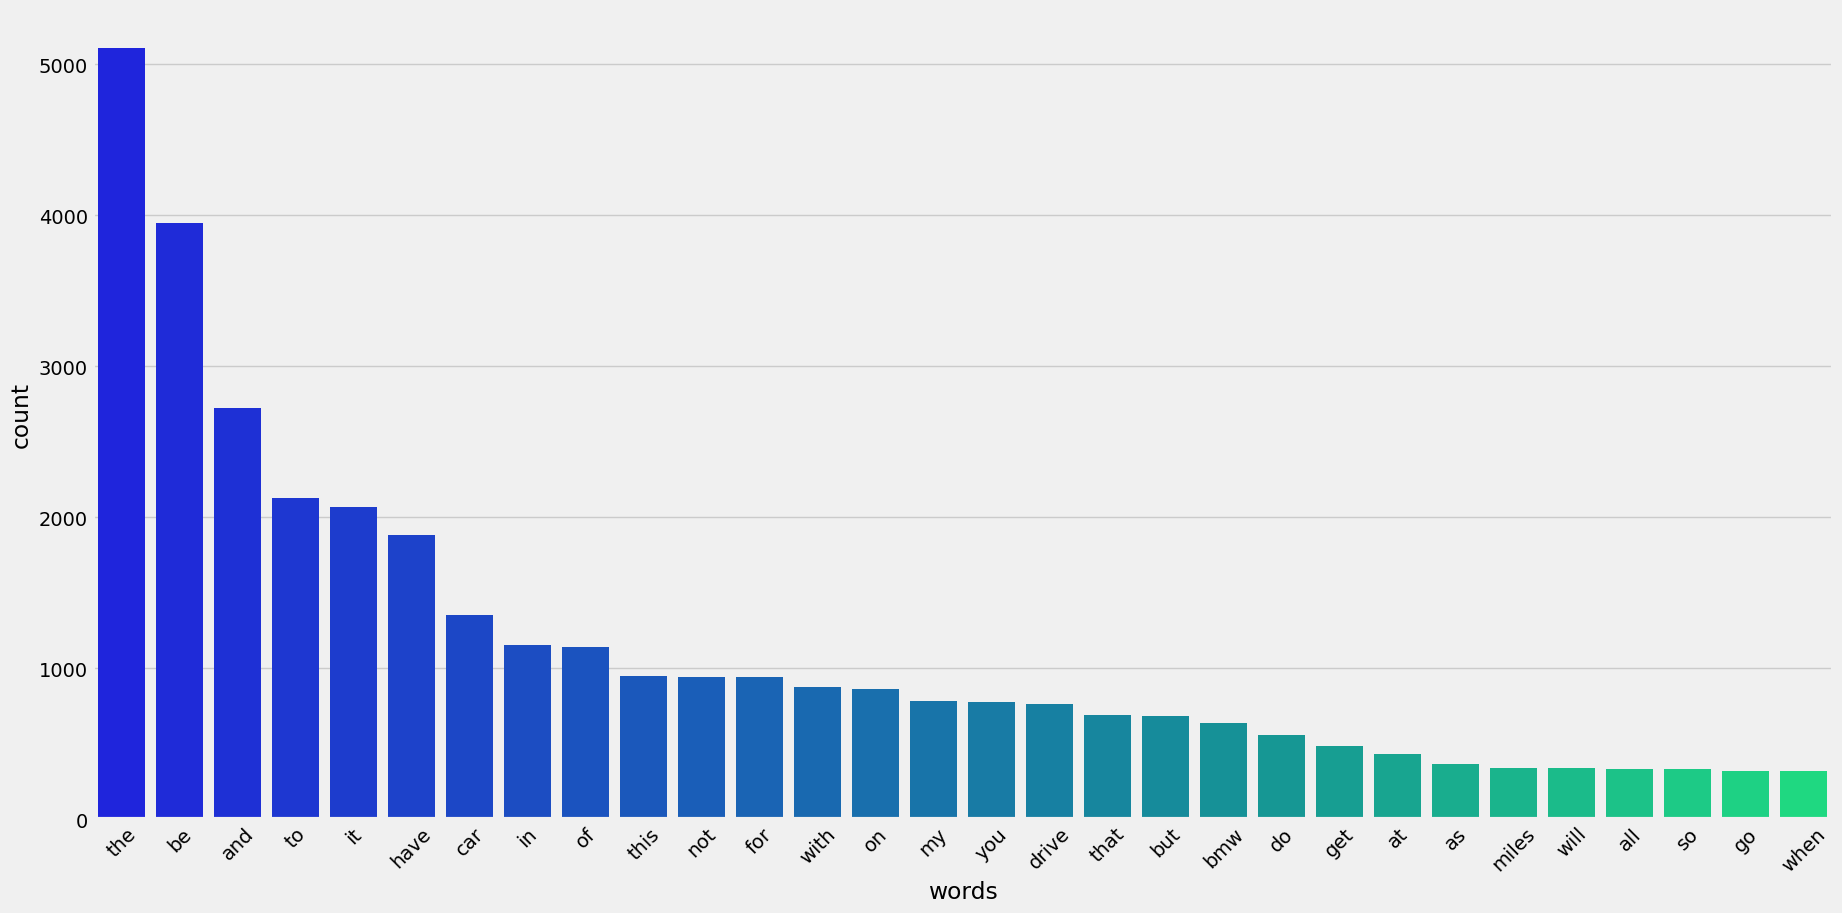

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_bmw = ','.join(list(df_bmw_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_bmw = Counter(review_words_bmw.split())
most_frequent = Counter_bmw.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'get'),
  Text(4, 0, 'miles'),
  Text(5, 0, 'go'),
  Text(6, 0, 'buy'),
  Text(7, 0, 'like'),
  Text(8, 0, 'great'),
  Text(9, 0, 'time'),
  Text(10, 0, 'one'),
  Text(11, 0, 'replace'),
  Text(12, 0, 'seat'),
  Text(13, 0, 'use'),
  Text(14, 0, 'would'),
  Text(15, 0, 'problems'),
  Text(16, 0, 'problem'),
  Text(17, 0, 'tire'),
  Text(18, 0, 'vehicle'),
  Text(19, 0, '000'),
  Text(20, 0, 'engine'),
  Text(21, 0, 'new'),
  Text(22, 0, 'sport'),
  Text(23, 0, 'love'),
  Text(24, 0, 'back'),
  Text(25, 0, 'handle'),
  Text(26, 0, 'take'),
  Text(27, 0, 'first'),
  Text(28, 0, 'look'),
  Text(29, 0, 'make')])

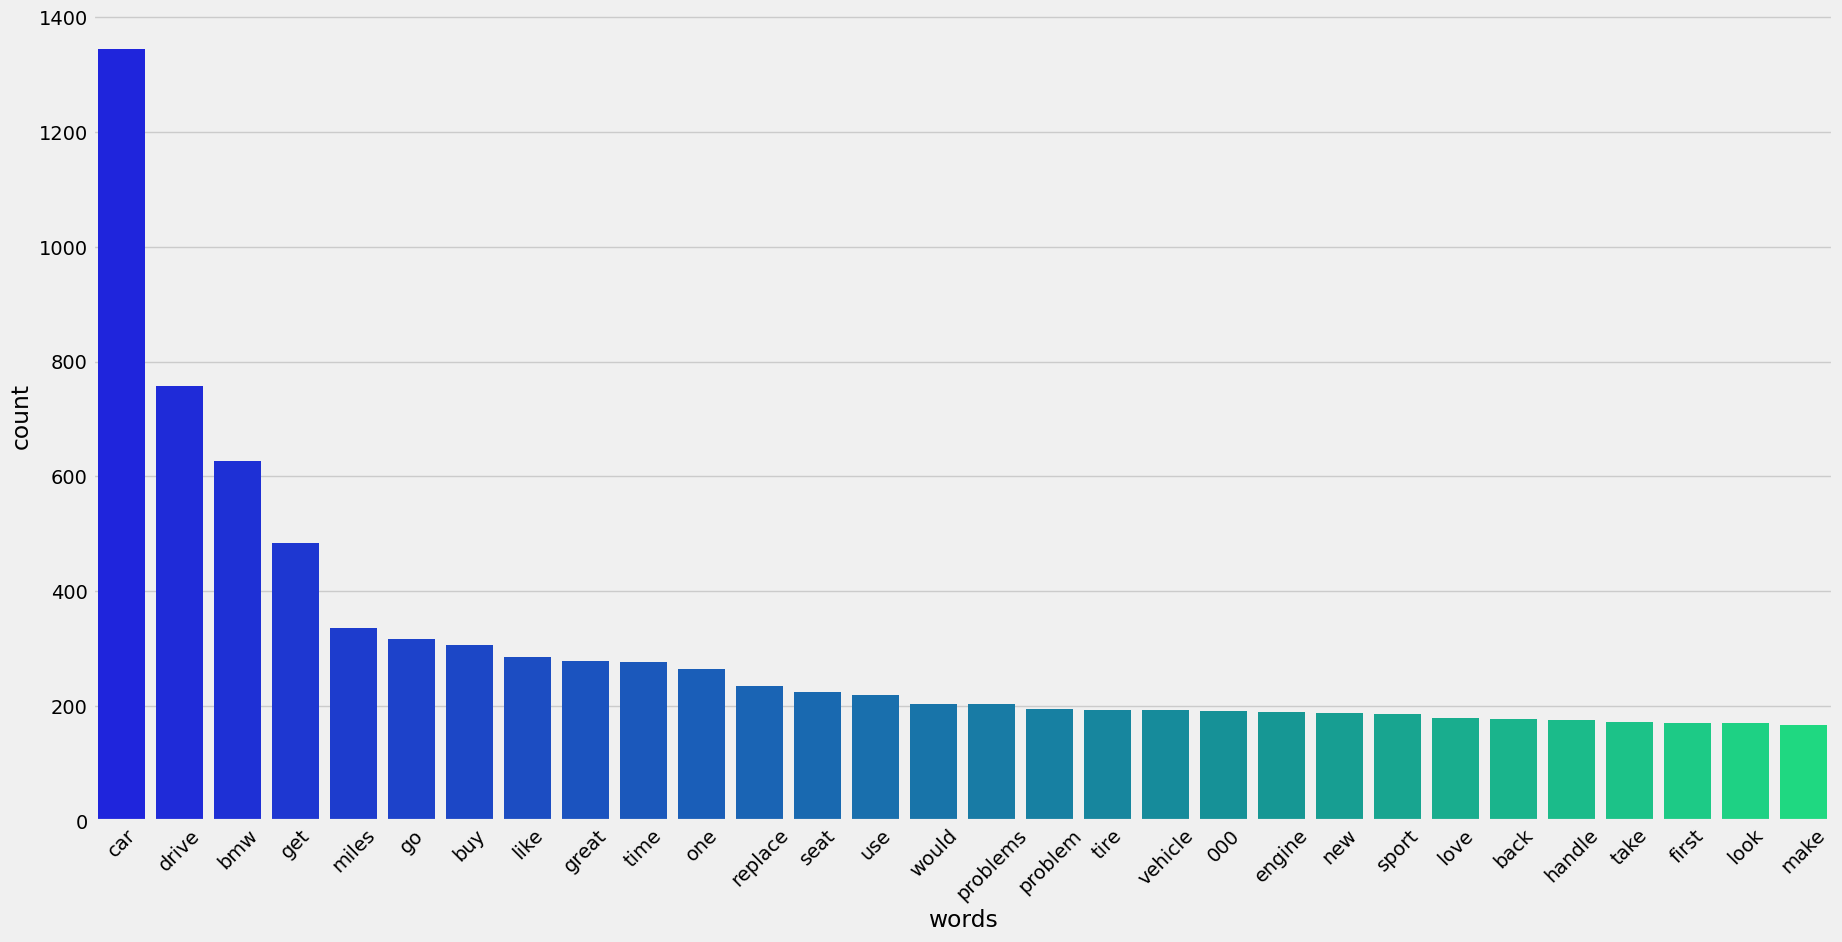

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_bmw_neg['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_bmw_neg['Review_Clean_List']]
df_bmw_neg['Review_Clean'] = list(map(to_string, df_bmw_neg['Review_Clean_List']))

# Join all word corpus
review_words_bmw = ','.join(list(df_bmw_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_bmw = Counter(review_words_bmw.split())
most_frequent = Counter_bmw.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_bmw_neg

Vehicle_Title  Rating  \
0    2014 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   4.750   
1    2016 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   5.000   
2    2016 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   5.000   
3    2015 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   4.000   
4    2017 BMW X1 SUV xDrive28i 4dr SUV AWD (2.0L 4cyl Turbo 8A)   4.000   
..                                                          ...     ...   
623                  2002 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   4.625   
624                  2002 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   4.125   
625                  2001 BMW M5 Sedan 4dr Sedan (4.9L 8cyl 6M)   4.500   
626                                 2000 BMW M5 Sedan 4dr Sedan   4.375   
627                2006 BMW M5 Sedan 4dr Sedan (5.0L 10cyl 7AM)   4.250   

                                                                         Full Review  \
0    A BMW from the good old days of BMW design I bought this X1 because it's a d...   
1    Significant improvement from the prev. generation! I had a 2014 X1 (prev gen...   
2    It's a little/BIG SUV/SAV I was cross shopping the Audi Q5, Mercedes GLC, BM...   
3    Still satisfied but not amazed After 30,000  miles in good and bad weather, ...   
4    First BMW We shopped around for quite some time looking for a small/midsize ...   
..                                                                               ...   
623  2002 BMW M5 Review Just an amazing all around car.  Sports car performance w...   
624  Sweet Pretty good but I prefer the M3.\rIts not worth the price, but wicked ...   
625  Loving every mile I was hesitant when I first drove the \rcar when I bought ...   
626  A few issues with the M5 Well, I got the M5 in 2009 on a dealer trade with 1...   
627  M5 rules I studied and drove everything available in the 50-60K range. This ...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
623       neg   
624       neg   
625       neg   
626       neg   
627       neg   

                                                                   Review_Clean_List  \
0    [bmw, good, old, days, bmw, design, buy, x1, die, breed, bmw, time, bmw, go,...   
1    [significant, improvement, prev, generation, 2014, x1, prev, generation, fav...   
2    [little, big, suv, sav, cross, shop, audi, q5, mercedes, glc, bmw, x3, volks...   
3    [still, satisfy, amaze, 30, 000, miles, good, bad, weather, would, say, sati...   
4    [first, bmw, shop, around, quite, time, look, small, midsize, crossover, tes...   
..                                                                               ...   
623  [2002, bmw, m5, review, amaze, around, car, sport, car, performance, five, p...   
624                  [sweet, pretty, good, prefer, m3, worth, price, wicked, handle]   
625  [love, every, mile, hesitant, first, drive, car, buy, soon, though, come, re...   
626  [issue, m5, well, get, m5, 2009, dealer, trade, 160k, car, run, drive, great...   
627  [m5, rule, study, drive, everything, available, 50, 60k, range, car, everyth...   

                                                                        Review_Clean  
0    bmw good old days bmw design buy x1 die breed bmw time bmw go soft heavy los...  
1    significant improvement prev generation 2014 x1 prev generation favorite car...  
2    little big suv sav cross shop audi q5 mercedes glc bmw x3 volkswagen gti saw...  
3    still satisfy amaze 30 000 miles good bad weather would say satisfy amaze x1...  
4    first bmw shop around quite time look small midsize crossover test drive lit...  
..                                                                               ...  
623  2002 bmw m5 review amaze around car sport car performance five passenger sea...  
624                            sweet pretty good prefer m3 worth price wicked handle  
625  love every mile hesitant first drive car b

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_bmw_neg = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_bmw_neg.fit_transform(df_bmw_neg['Review_Clean'])

In [ ]:
topic_model_bmw_neg.get_topic_info()

Topic  Count                        Name
0     -1    258        -1_car_drive_bmw_get
1      0    141       0_car_drive_get_great
2      1     89  1_bmw_car_problem_problems
3      2     52      2_car_miles_repair_buy
4      3     43         3_car_drive_bmw_get
5      4     27          4_x5_suv_sport_bmw
6      5     18        5_bmw_car_paint_seat

In [ ]:
topic_model_bmw_neg.get_topic(0)

[('car', 0.05445082139723133),
 ('drive', 0.051832010131801325),
 ('get', 0.03328414351114586),
 ('great', 0.031572063180215514),
 ('sport', 0.030478505663598873),
 ('love', 0.029890101164604044),
 ('handle', 0.027637863712190423),
 ('like', 0.023243005139536577),
 ('one', 0.02314261132908215),
 ('fun', 0.022693029556352492)]

In [ ]:
# Visualize top topic keywords
topic_model_bmw_neg.visualize_barchart()

In [ ]:
topic_model_bmw_neg.visualize_topics()

In [ ]:
topic_model_bmw_neg.visualize_hierarchy()

In [ ]:
topic_model_bmw_neg.visualize_heatmap()

In [ ]:
# Volvo

In [ ]:
#volvo

# Volvo

## neg

In [ ]:
df_volvo_neg = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/volvo_neg.csv')

In [ ]:
df_volvo_neg

Review_Date            Author_Name  \
0     on 11/21/08 18:11 PM (PST)               lordway    
1     on 01/04/08 21:20 PM (PST)         Sheldon Rabin    
2     on 11/14/06 10:58 AM (PST)  Everything I wanted     
3     on 11/05/06 22:50 PM (PST)               FastCar    
4     on 08/06/05 19:37 PM (PDT)                  TTRx    
..                           ...                    ...   
460   on 09/11/07 10:31 AM (PDT)                  Anna    
461   on 04/15/18 18:02 PM (PDT)                Joey o    
462   on 09/11/14 20:34 PM (PDT)        coloradocarnut    
463   on 05/13/13 07:27 AM (PDT)                djd123    
464   on 06/21/16 09:26 AM (PDT)                Mike C    

                                                                  Vehicle_Title  \
0                      2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
1                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
2                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
3                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
4                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
..                                                                          ...   
460  2008 Volvo C30 Hatchback T5 Version 1.0 2dr Hatchback (2.5L 5cyl Turbo 6M)   
461     2013 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
462              2013 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   
463     2013 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
464              2009 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   

                                         Review_Title  \
0                                   Relability Stinks   
1                                    Volvo S60R, 2006   
2                                 Everything I wanted   
3                                        Discreet Fun   
4                         Wow Fast Euro on the Cheap.   
..                                                ...   
460                                           Awesome   
461                           I wonât get rid of it   
462                 C30: rare, beautiful, comfortable   
463                               Style and Substance   
464  A car that makes me smile every time I drive it.   

                                                                              Review  \
0     I liked this car a lot when I first bought it. Now I regret my purchase. It...   
1     This S60R has had chronic suspension and alignment problems such that all 4...   
2     This car turned out to be all that and then some. A coworker owned one, but...   
3     I looked at BMW, Audi, and MB, and by far the best power/quality/features c...   
4     300 HP with a very stealth look.  Makes the Nissan 265 HP Commercial look s...   
..                                                                               ...   
460   I love this car.  It flys on the highway and responds at the low speeds too...   
461   I love this car. I have looked for one for years the way I wanted it option...   
462   This is really a lovely car.  We purchased the last '13 new in July'14.  Au...   
463   Have owned for 3 weeks now, and the smiles keep coming.This car is very wel...   
464   I bought my 2009 C30 used and have now owned it for 3 years. I had test dro...   

     Rating  \
0     1.875   
1     3.875   
2     4.750   
3     4.750   
4     4.375   
..      ...   
460   4.625   
461   5.000   
462   5.000   
463   4.250   
464   5.000   

                                                                         Full Review  \
0    Relability Stinks I liked this car a lot when I first bought it. Now I regre...   
1    Volvo S60R, 2006 This S60R has had chronic suspension and alignment problems...   
2    Everything I wanted This car turned out to be all that and then some. A cowo...   
3    Discreet Fun I looked at BMW, Audi,

In [ ]:
df_volvo_neg.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_volvo_neg

Vehicle_Title  \
0                      2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
1                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
2                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
3                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
4                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
..                                                                          ...   
460  2008 Volvo C30 Hatchback T5 Version 1.0 2dr Hatchback (2.5L 5cyl Turbo 6M)   
461     2013 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
462              2013 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   
463     2013 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
464              2009 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   

     Rating  \
0     1.875   
1     3.875   
2     4.750   
3     4.750   
4     4.375   
..      ...   
460   4.625   
461   5.000   
462   5.000   
463   4.250   
464   5.000   

                                                                         Full Review  \
0    Relability Stinks I liked this car a lot when I first bought it. Now I regre...   
1    Volvo S60R, 2006 This S60R has had chronic suspension and alignment problems...   
2    Everything I wanted This car turned out to be all that and then some. A cowo...   
3    Discreet Fun I looked at BMW, Audi, and MB, and by far the best power/qualit...   
4    Wow Fast Euro on the Cheap. 300 HP with a very stealth look.  Makes the Niss...   
..                                                                               ...   
460  Awesome I love this car.  It flys on the highway and responds at the low spe...   
461  I wonât get rid of it I love this car. I have looked for one for years the...   
462  C30: rare, beautiful, comfortable This is really a lovely car.  We purchased...   
463  Style and Substance Have owned for 3 weeks now, and the smiles keep coming.T...   
464  A car that makes me smile every time I drive it. I bought my 2009 C30 used a...   

    sentiment  
0         neg  
1         neg  
2         neg  
3         neg  
4         neg  
..        ...  
460       neg  
461       neg  
462       neg  
463       neg  
464       neg  

[465 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_volvo_neg['Review_Clean_List'] = list(map(text_preprocessing, df_volvo_neg['Full Review']))

# Return to string with to_string function
df_volvo_neg['Review_Clean'] = list(map(to_string, df_volvo_neg['Review_Clean_List']))

In [ ]:
df_volvo_neg

Vehicle_Title  \
0                      2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
1                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
2                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
3                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
4                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
..                                                                          ...   
460  2008 Volvo C30 Hatchback T5 Version 1.0 2dr Hatchback (2.5L 5cyl Turbo 6M)   
461     2013 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
462              2013 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   
463     2013 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
464              2009 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   

     Rating  \
0     1.875   
1     3.875   
2     4.750   
3     4.750   
4     4.375   
..      ...   
460   4.625   
461   5.000   
462   5.000   
463   4.250   
464   5.000   

                                                                         Full Review  \
0    Relability Stinks I liked this car a lot when I first bought it. Now I regre...   
1    Volvo S60R, 2006 This S60R has had chronic suspension and alignment problems...   
2    Everything I wanted This car turned out to be all that and then some. A cowo...   
3    Discreet Fun I looked at BMW, Audi, and MB, and by far the best power/qualit...   
4    Wow Fast Euro on the Cheap. 300 HP with a very stealth look.  Makes the Niss...   
..                                                                               ...   
460  Awesome I love this car.  It flys on the highway and responds at the low spe...   
461  I wonât get rid of it I love this car. I have looked for one for years the...   
462  C30: rare, beautiful, comfortable This is really a lovely car.  We purchased...   
463  Style and Substance Have owned for 3 weeks now, and the smiles keep coming.T...   
464  A car that makes me smile every time I drive it. I bought my 2009 C30 used a...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
460       neg   
461       neg   
462       neg   
463       neg   
464       neg   

                                                                   Review_Clean_List  \
0    [relability, stink, like, this, car, lot, when, first, buy, it, now, regret,...   
1    [volvo, s60r, 2006, this, s60r, have, have, chronic, suspension, and, alignm...   
2    [everything, want, this, car, turn, out, to, be, all, that, and, then, some,...   
3    [discreet, fun, look, at, bmw, audi, and, mb, and, by, far, the, best, power...   
4    [wow, fast, euro, on, the, cheap, 300, hp, with, very, stealth, look, make, ...   
..                                                                               ...   
460  [awesome, love, this, car, it, fly, on, the, highway, and, respond, at, the,...   
461  [wonâ, , get, rid, of, it, love, this, car, have, look, for, one, for, yea...   
462  [c30, rare, beautiful, comfortable, this, be, really, lovely, car, we, purch...   
463  [style, and, substance, have, own, for, weeks, now, and, the, smile, keep, c...   
464  [car, that, make, me, smile, every, time, drive, it, buy, my, 2009, c30, use...   

                                                                        Review_Clean  
0    relability stink like this car lot when first buy it now regret my purchase ...  
1    volvo s60r 2006 this s60r have have chronic suspension and alignment problem...  
2    everything want this car turn out to be all that and then some coworker own ...  
3    discreet fun look at bmw audi and mb and by far the best power quality featu...  
4    wow fast euro on the cheap 300 hp with very stealth look make the nissan 265...  
..                                             

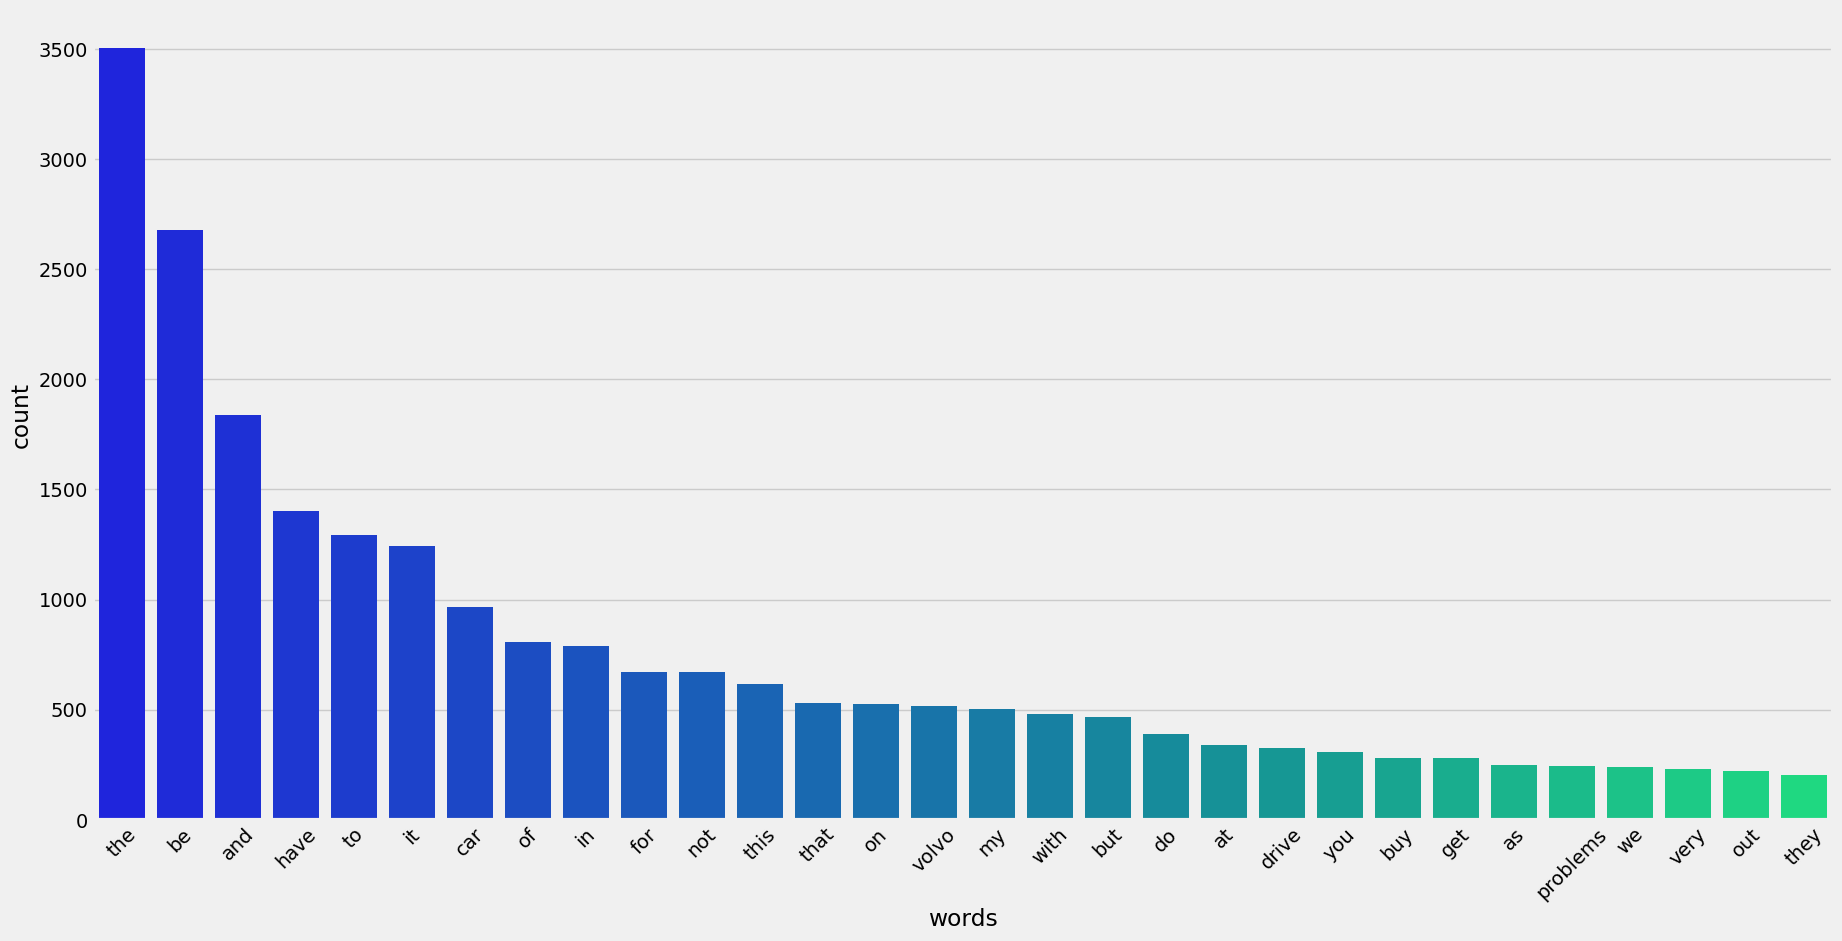

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_volvo = ','.join(list(df_volvo_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_volvo = Counter(review_words_volvo.split())
most_frequent = Counter_volvo.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'volvo'),
  Text(2, 0, 'drive'),
  Text(3, 0, 'get'),
  Text(4, 0, 'buy'),
  Text(5, 0, 'problems'),
  Text(6, 0, 'miles'),
  Text(7, 0, 'go'),
  Text(8, 0, 'replace'),
  Text(9, 0, 'great'),
  Text(10, 0, 'seat'),
  Text(11, 0, 'time'),
  Text(12, 0, 'would'),
  Text(13, 0, 'look'),
  Text(14, 0, 'like'),
  Text(15, 0, 'one'),
  Text(16, 0, 'engine'),
  Text(17, 0, 'new'),
  Text(18, 0, '000'),
  Text(19, 0, 'problem'),
  Text(20, 0, 'dealer'),
  Text(21, 0, 'love'),
  Text(22, 0, 'years'),
  Text(23, 0, 'make'),
  Text(24, 0, 'issue'),
  Text(25, 0, 'back'),
  Text(26, 0, 'good'),
  Text(27, 0, 'repair'),
  Text(28, 0, 'light'),
  Text(29, 0, 'use')])

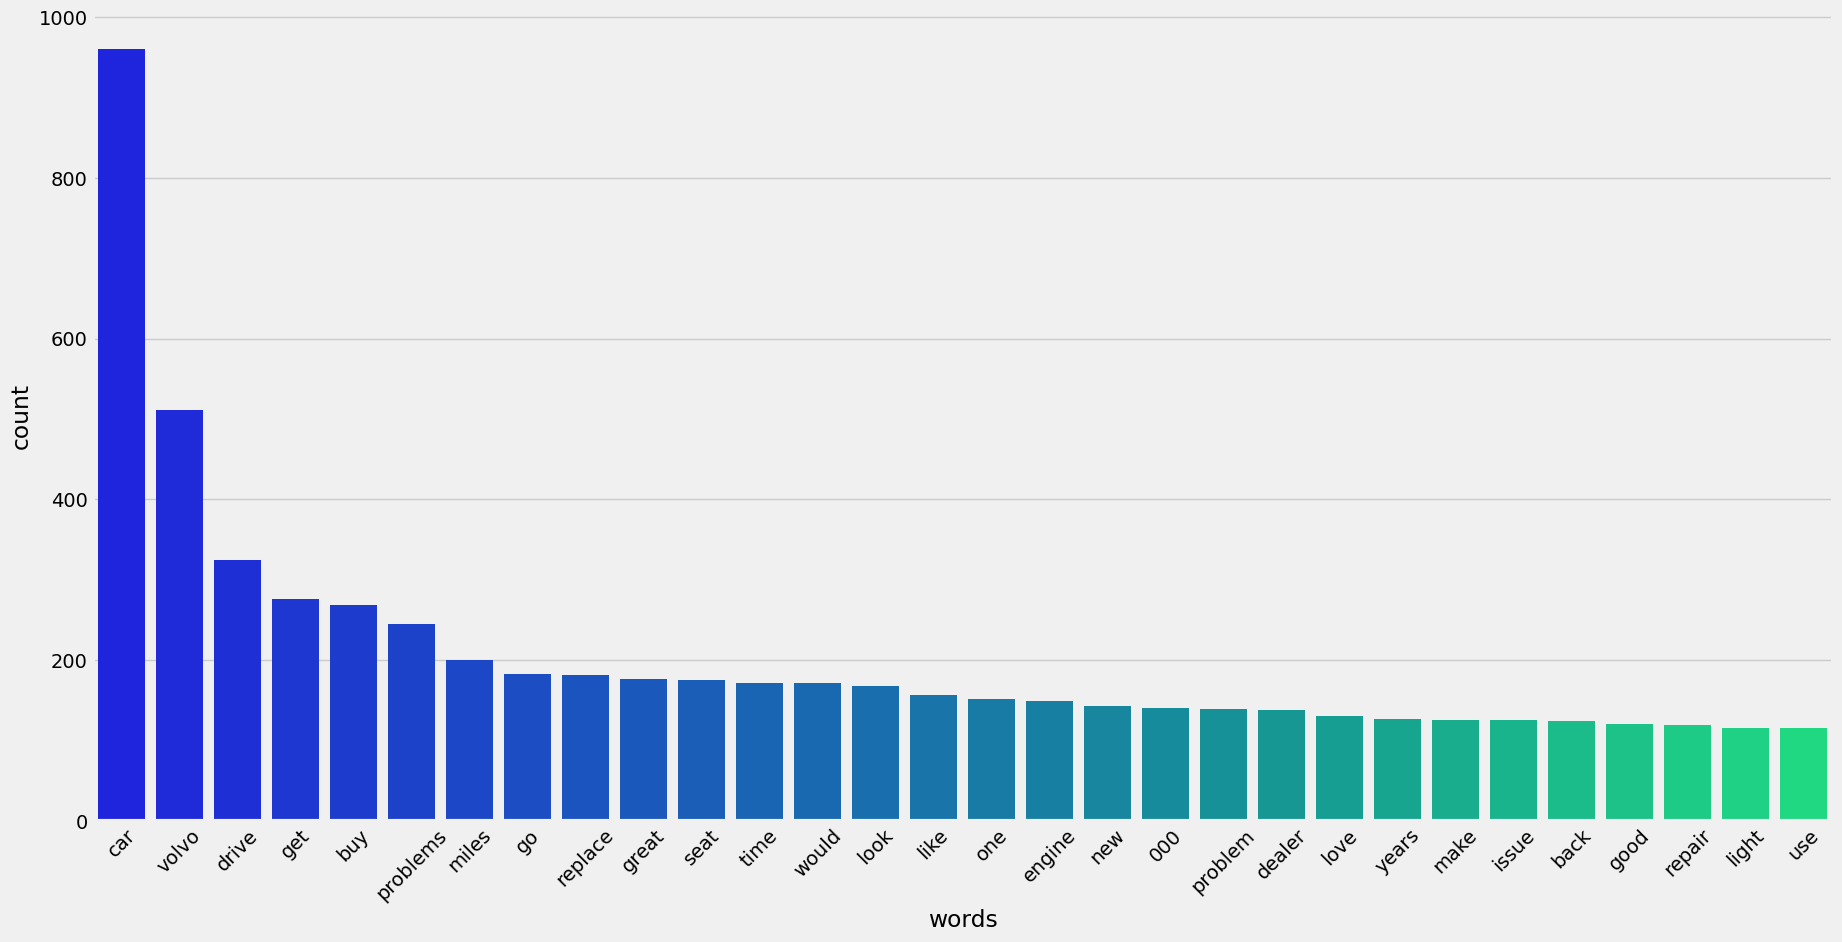

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_volvo_neg['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_volvo_neg['Review_Clean_List']]
df_volvo_neg['Review_Clean'] = list(map(to_string, df_volvo_neg['Review_Clean_List']))

# Join all word corpus
review_words_volvo = ','.join(list(df_volvo_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_volvo = Counter(review_words_volvo.split())
most_frequent = Counter_volvo.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_volvo_neg

Vehicle_Title  \
0                      2008 Volvo S60 Sedan 2.5T 4dr Sedan (2.5L 5cyl Turbo 5A)   
1                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
2                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
3                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
4                         2006 Volvo S60 R R 4dr Sedan AWD (2.5L 5cyl Turbo 6M)   
..                                                                          ...   
460  2008 Volvo C30 Hatchback T5 Version 1.0 2dr Hatchback (2.5L 5cyl Turbo 6M)   
461     2013 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
462              2013 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   
463     2013 Volvo C30 Hatchback T5 R-Design 2dr Hatchback (2.5L 5cyl Turbo 6M)   
464              2009 Volvo C30 Hatchback T5 2dr Hatchback (2.5L 5cyl Turbo 6M)   

     Rating  \
0     1.875   
1     3.875   
2     4.750   
3     4.750   
4     4.375   
..      ...   
460   4.625   
461   5.000   
462   5.000   
463   4.250   
464   5.000   

                                                                         Full Review  \
0    Relability Stinks I liked this car a lot when I first bought it. Now I regre...   
1    Volvo S60R, 2006 This S60R has had chronic suspension and alignment problems...   
2    Everything I wanted This car turned out to be all that and then some. A cowo...   
3    Discreet Fun I looked at BMW, Audi, and MB, and by far the best power/qualit...   
4    Wow Fast Euro on the Cheap. 300 HP with a very stealth look.  Makes the Niss...   
..                                                                               ...   
460  Awesome I love this car.  It flys on the highway and responds at the low spe...   
461  I wonât get rid of it I love this car. I have looked for one for years the...   
462  C30: rare, beautiful, comfortable This is really a lovely car.  We purchased...   
463  Style and Substance Have owned for 3 weeks now, and the smiles keep coming.T...   
464  A car that makes me smile every time I drive it. I bought my 2009 C30 used a...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
460       neg   
461       neg   
462       neg   
463       neg   
464       neg   

                                                                   Review_Clean_List  \
0    [relability, stink, like, car, lot, first, buy, regret, purchase, small, nor...   
1    [volvo, s60r, 2006, s60r, chronic, suspension, alignment, problems, tire, cu...   
2    [everything, want, car, turn, coworker, one, saw, titanium, metallic, buy, d...   
3    [discreet, fun, look, bmw, audi, mb, far, best, power, quality, feature, com...   
4    [wow, fast, euro, cheap, 300, hp, stealth, look, make, nissan, 265, hp, comm...   
..                                                                               ...   
460  [awesome, love, car, fly, highway, respond, low, speed, sales, guy, hang, de...   
461  [wonâ, , get, rid, love, car, look, one, years, way, want, optioned, get, ...   
462  [c30, rare, beautiful, comfortable, really, lovely, car, purchase, last, 13,...   
463  [style, substance, weeks, smile, keep, come, car, well, put, together, look,...   
464  [car, make, smile, every, time, drive, buy, 2009, c30, use, years, test, dri...   

                                                                        Review_Clean  
0    relability stink like car lot first buy regret purchase small normal size pe...  
1    volvo s60r 2006 s60r chronic suspension alignment problems tire cup 6000 mil...  
2    everything want car turn coworker one saw titanium metallic buy drop dead lo...  
3    discreet fun look bmw audi mb far best power quality feature combination mon...  
4    wow fast euro cheap 300 hp stealth look make nissan 265 hp commercial look s...  
..                                             

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_volvo_neg = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_volvo_neg.fit_transform(df_volvo_neg['Review_Clean'])

In [ ]:
topic_model_volvo_neg.get_topic_info()

Topic  Count                      Name
0     -1    140    -1_car_volvo_drive_buy
1      0    138  0_volvo_car_buy_problems
2      1    121     1_car_drive_great_get
3      2     29    2_volvo_car_drive_love
4      3     24    3_car_volvo_seat_drive
5      4     13        4_s60_000_car_love

In [ ]:
topic_model_volvo_neg.get_topic(4)

[('s60', 0.14481107699624202),
 ('000', 0.06252267404000818),
 ('car', 0.05642023300504162),
 ('love', 0.05361433110271104),
 ('s60r', 0.05288665917860315),
 ('years', 0.04968336908802199),
 ('problems', 0.04672118116434259),
 ('transmission', 0.04597960015825643),
 ('drive', 0.04296880495364955),
 ('best', 0.04213637088953465)]

In [ ]:
# Visualize top topic keywords
topic_model_volvo_neg.visualize_barchart()

In [ ]:
topic_model_volvo_neg.visualize_topics()

In [ ]:
topic_model_volvo_neg.visualize_hierarchy()

In [ ]:
topic_model_volvo_neg.visualize_heatmap()

# Infiniti

## neg

In [ ]:
df_infi_neg = pd.read_csv('/content/drive/MyDrive/Datasets/aoml project nlp/infiniti_neg.csv')

In [ ]:
df_infi_neg

Review_Date      Author_Name  \
0     on 04/19/18 05:08 AM (PDT)           gaboy    
1     on 01/30/17 09:24 AM (PST)             JWK    
2     on 11/28/16 20:07 PM (PST)      Don Finley    
3     on 09/30/15 11:57 AM (PDT)         A Fritz    
4     on 07/17/04 00:00 AM (PDT)     Tom Wilhoit    
..                           ...              ...   
321   on 01/18/11 20:05 PM (PST)         gib2011    
322   on 11/15/10 00:00 AM (PST)          Calico    
323   on 08/18/10 13:26 PM (PDT)  Infiniti Owner    
324   on 01/19/10 23:07 PM (PST)          BigMac    
325   on 02/17/16 00:27 AM (PST)  Kailasa Ishaya    

                                                            Vehicle_Title  \
0                           2017 INFINITI QX70 SUV 4dr SUV (3.7L 6cyl 7A)   
1                       2017 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
2                           2017 INFINITI QX70 SUV 4dr SUV (3.7L 6cyl 7A)   
3                       2015 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
4                        2004 INFINITI I35 Sedan 4dr Sedan (3.5L 6cyl 4A)   
..                                                                    ...   
321          2010 INFINITI G37 Sedan Sedan x 4dr Sedan AWD (3.7L 6cyl 7A)   
322          2010 INFINITI G37 Sedan Sedan x 4dr Sedan AWD (3.7L 6cyl 7A)   
323          2010 INFINITI G37 Sedan Sedan Sport 4dr Sedan (3.7L 6cyl 6M)   
324        2010 INFINITI G37 Sedan Sedan Journey 4dr Sedan (3.7L 6cyl 7A)   
325  2015 INFINITI Q60 Coupe Coupe Sport Limited 2dr Coupe (3.7L 6cyl 7A)   

                                          Review_Title  \
0                           Best deal i've ever gotten   
1                      Meh...not really that impressed   
2                                    2017 QX70 Limited   
3    Great Performance Hampered by Horrible Technology   
4                                            Great Car   
..                                                 ...   
321                                   Heaven on wheels   
322                           Transmission Problematic   
323                                Not what i expected   
324                                Great Car, But.....   
325                            It's ALMOST perfect....   

                                                                              Review  \
0     I have a good friend who has a 2014 version under the old nomenclature, and...   
1     I rented this car and spent 900 miles in it (I got in with 8 miles, returne...   
2     Owned a 2004 FX35, was the best car I've ever owned, had 240K mi when I hit...   
3     I owned three Infiniti FX cars - 2006, 2009, 2012.   Was finalizing purchas...   
4     Great car,fun to drive and very \rdependable. The Bridgestone tires have \r...   
..                                                                               ...   
321   I looked at BMW 3 series, Audi A4 and VWcc in addition to the 2011 Infinti ...   
322   The styling of the car is wonderful.  Have been asked about the car by stra...   
323   4 months have passed since i have owned this car and it is starting to show...   
324   I expected more attention to detail and luxury appointments on the inside. ...   
325   I should probably start this off by saying I am a long-time Nissan fan.My p...   

     Rating  \
0     5.000   
1     3.000   
2     5.000   
3     3.000   
4     5.000   
..      ...   
321   4.875   
322   2.750   
323   3.500   
324   4.625   
325   4.000   

                                                                         Full Review  \
0    Best deal i've ever gotten I have a good friend who has a 2014 version under...   
1    Meh...not really that impressed I rented this car and spent 900 miles in it ...   
2    2017 QX70 Limited Owned a 2004 FX35, was the best car I've ever owned, had 2...   
3    Great Performance Hampered by Horrible Technology I owned three Infiniti FX ...   
4    Great Car Great car,fun to drive and very \rdependable. The Bridgestone tire...

In [ ]:
df_infi_neg.drop(columns=['Review_Date','Author_Name','Review_Title','Review','compound_nouns','aspect_keywords',	'competition'	, 'competition_comp_nouns' ,	'competition_aspects'],inplace=True)

In [ ]:
df_infi_neg

Vehicle_Title  \
0                           2017 INFINITI QX70 SUV 4dr SUV (3.7L 6cyl 7A)   
1                       2017 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
2                           2017 INFINITI QX70 SUV 4dr SUV (3.7L 6cyl 7A)   
3                       2015 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
4                        2004 INFINITI I35 Sedan 4dr Sedan (3.5L 6cyl 4A)   
..                                                                    ...   
321          2010 INFINITI G37 Sedan Sedan x 4dr Sedan AWD (3.7L 6cyl 7A)   
322          2010 INFINITI G37 Sedan Sedan x 4dr Sedan AWD (3.7L 6cyl 7A)   
323          2010 INFINITI G37 Sedan Sedan Sport 4dr Sedan (3.7L 6cyl 6M)   
324        2010 INFINITI G37 Sedan Sedan Journey 4dr Sedan (3.7L 6cyl 7A)   
325  2015 INFINITI Q60 Coupe Coupe Sport Limited 2dr Coupe (3.7L 6cyl 7A)   

     Rating  \
0     5.000   
1     3.000   
2     5.000   
3     3.000   
4     5.000   
..      ...   
321   4.875   
322   2.750   
323   3.500   
324   4.625   
325   4.000   

                                                                         Full Review  \
0    Best deal i've ever gotten I have a good friend who has a 2014 version under...   
1    Meh...not really that impressed I rented this car and spent 900 miles in it ...   
2    2017 QX70 Limited Owned a 2004 FX35, was the best car I've ever owned, had 2...   
3    Great Performance Hampered by Horrible Technology I owned three Infiniti FX ...   
4    Great Car Great car,fun to drive and very \rdependable. The Bridgestone tire...   
..                                                                               ...   
321  Heaven on wheels I looked at BMW 3 series, Audi A4 and VWcc in addition to t...   
322  Transmission Problematic The styling of the car is wonderful.  Have been ask...   
323  Not what i expected 4 months have passed since i have owned this car and it ...   
324  Great Car, But..... I expected more attention to detail and luxury appointme...   
325  It's ALMOST perfect.... I should probably start this off by saying I am a lo...   

    sentiment  
0         neg  
1         neg  
2         neg  
3         neg  
4         neg  
..        ...  
321       neg  
322       neg  
323       neg  
324       neg  
325       neg  

[326 rows x 4 columns]

In [ ]:

# Create a list of review by applying text_preprocessing function
df_infi_neg['Review_Clean_List'] = list(map(text_preprocessing, df_infi_neg['Full Review']))

# Return to string with to_string function
df_infi_neg['Review_Clean'] = list(map(to_string, df_infi_neg['Review_Clean_List']))

In [ ]:
df_infi_neg

Vehicle_Title  \
0                           2017 INFINITI QX70 SUV 4dr SUV (3.7L 6cyl 7A)   
1                       2017 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
2                           2017 INFINITI QX70 SUV 4dr SUV (3.7L 6cyl 7A)   
3                       2015 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
4                        2004 INFINITI I35 Sedan 4dr Sedan (3.5L 6cyl 4A)   
..                                                                    ...   
321          2010 INFINITI G37 Sedan Sedan x 4dr Sedan AWD (3.7L 6cyl 7A)   
322          2010 INFINITI G37 Sedan Sedan x 4dr Sedan AWD (3.7L 6cyl 7A)   
323          2010 INFINITI G37 Sedan Sedan Sport 4dr Sedan (3.7L 6cyl 6M)   
324        2010 INFINITI G37 Sedan Sedan Journey 4dr Sedan (3.7L 6cyl 7A)   
325  2015 INFINITI Q60 Coupe Coupe Sport Limited 2dr Coupe (3.7L 6cyl 7A)   

     Rating  \
0     5.000   
1     3.000   
2     5.000   
3     3.000   
4     5.000   
..      ...   
321   4.875   
322   2.750   
323   3.500   
324   4.625   
325   4.000   

                                                                         Full Review  \
0    Best deal i've ever gotten I have a good friend who has a 2014 version under...   
1    Meh...not really that impressed I rented this car and spent 900 miles in it ...   
2    2017 QX70 Limited Owned a 2004 FX35, was the best car I've ever owned, had 2...   
3    Great Performance Hampered by Horrible Technology I owned three Infiniti FX ...   
4    Great Car Great car,fun to drive and very \rdependable. The Bridgestone tire...   
..                                                                               ...   
321  Heaven on wheels I looked at BMW 3 series, Audi A4 and VWcc in addition to t...   
322  Transmission Problematic The styling of the car is wonderful.  Have been ask...   
323  Not what i expected 4 months have passed since i have owned this car and it ...   
324  Great Car, But..... I expected more attention to detail and luxury appointme...   
325  It's ALMOST perfect.... I should probably start this off by saying I am a lo...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
321       neg   
322       neg   
323       neg   
324       neg   
325       neg   

                                                                   Review_Clean_List  \
0    [best, deal, have, ever, get, have, good, friend, who, have, 2014, version, ...   
1    [meh, not, really, that, impress, rent, this, car, and, spend, 900, miles, i...   
2    [2017, qx70, limit, own, 2004, fx35, be, the, best, car, have, ever, own, ha...   
3    [great, performance, hamper, by, horrible, technology, own, three, infiniti,...   
4    [great, car, great, car, fun, to, drive, and, very, dependable, the, bridges...   
..                                                                               ...   
321  [heaven, on, wheel, look, at, bmw, series, audi, a4, and, vwcc, in, addition...   
322  [transmission, problematic, the, style, of, the, car, be, wonderful, have, b...   
323  [not, what, expect, months, have, pass, since, have, own, this, car, and, it...   
324  [great, car, but, expect, more, attention, to, detail, and, luxury, appointm...   
325  [it, be, almost, perfect, should, probably, start, this, off, by, say, be, l...   

                                                                        Review_Clean  
0    best deal have ever get have good friend who have 2014 version under the old...  
1    meh not really that impress rent this car and spend 900 miles in it get in w...  
2    2017 qx70 limit own 2004 fx35 be the best car have ever own have 240k mi whe...  
3    great performance hamper by horrible technology own three infiniti fx cars 2...  
4    great car great car fun to drive and very dependable the bridgestone tire ha...  
..                                                                               ...  
321  heaven on wheel look 

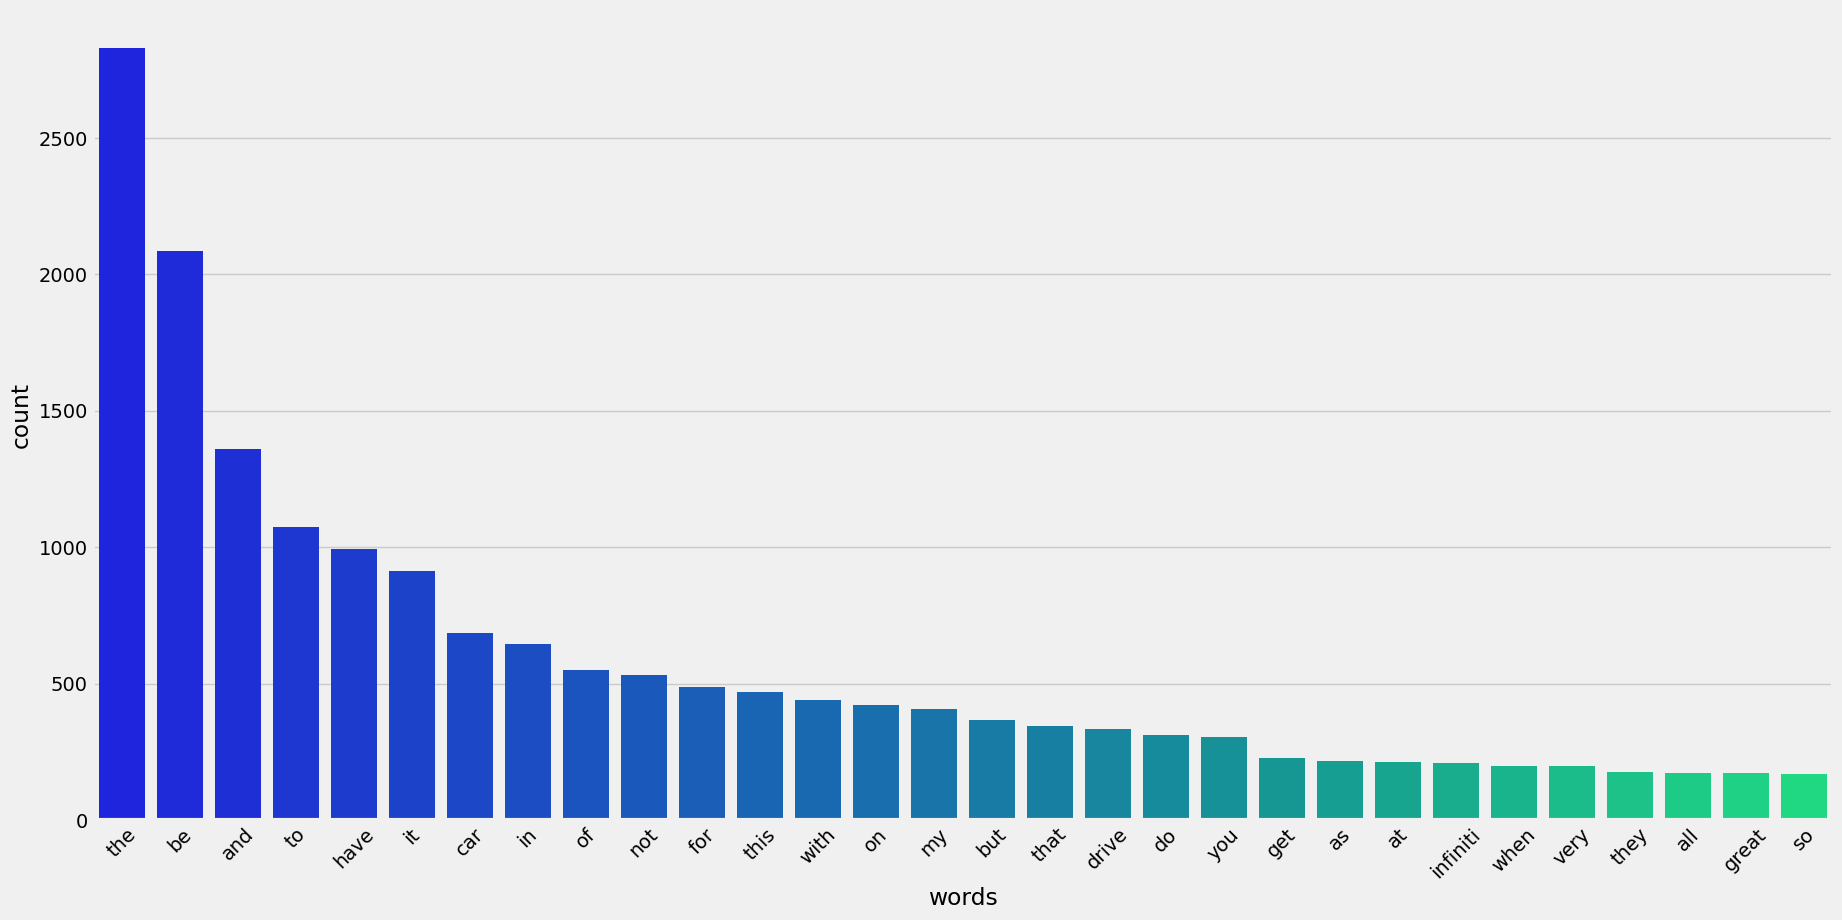

In [ ]:



# Import Counter
from collections import Counter

# Join all word corpus
review_words_infi = ','.join(list(df_infi_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_infi = Counter(review_words_infi.split())
most_frequent = Counter_infi.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'drive'),
  Text(2, 0, 'get'),
  Text(3, 0, 'infiniti'),
  Text(4, 0, 'great'),
  Text(5, 0, 'like'),
  Text(6, 0, 'look'),
  Text(7, 0, 'go'),
  Text(8, 0, 'miles'),
  Text(9, 0, 'buy'),
  Text(10, 0, 'vehicle'),
  Text(11, 0, 'seat'),
  Text(12, 0, 'would'),
  Text(13, 0, 'time'),
  Text(14, 0, 'one'),
  Text(15, 0, 'problem'),
  Text(16, 0, 'feel'),
  Text(17, 0, 'make'),
  Text(18, 0, 'love'),
  Text(19, 0, 'good'),
  Text(20, 0, 'use'),
  Text(21, 0, 'sport'),
  Text(22, 0, 'brake'),
  Text(23, 0, 'engine'),
  Text(24, 0, 'back'),
  Text(25, 0, 'steer'),
  Text(26, 0, 'issue'),
  Text(27, 0, 'problems'),
  Text(28, 0, 'even'),
  Text(29, 0, 'system')])

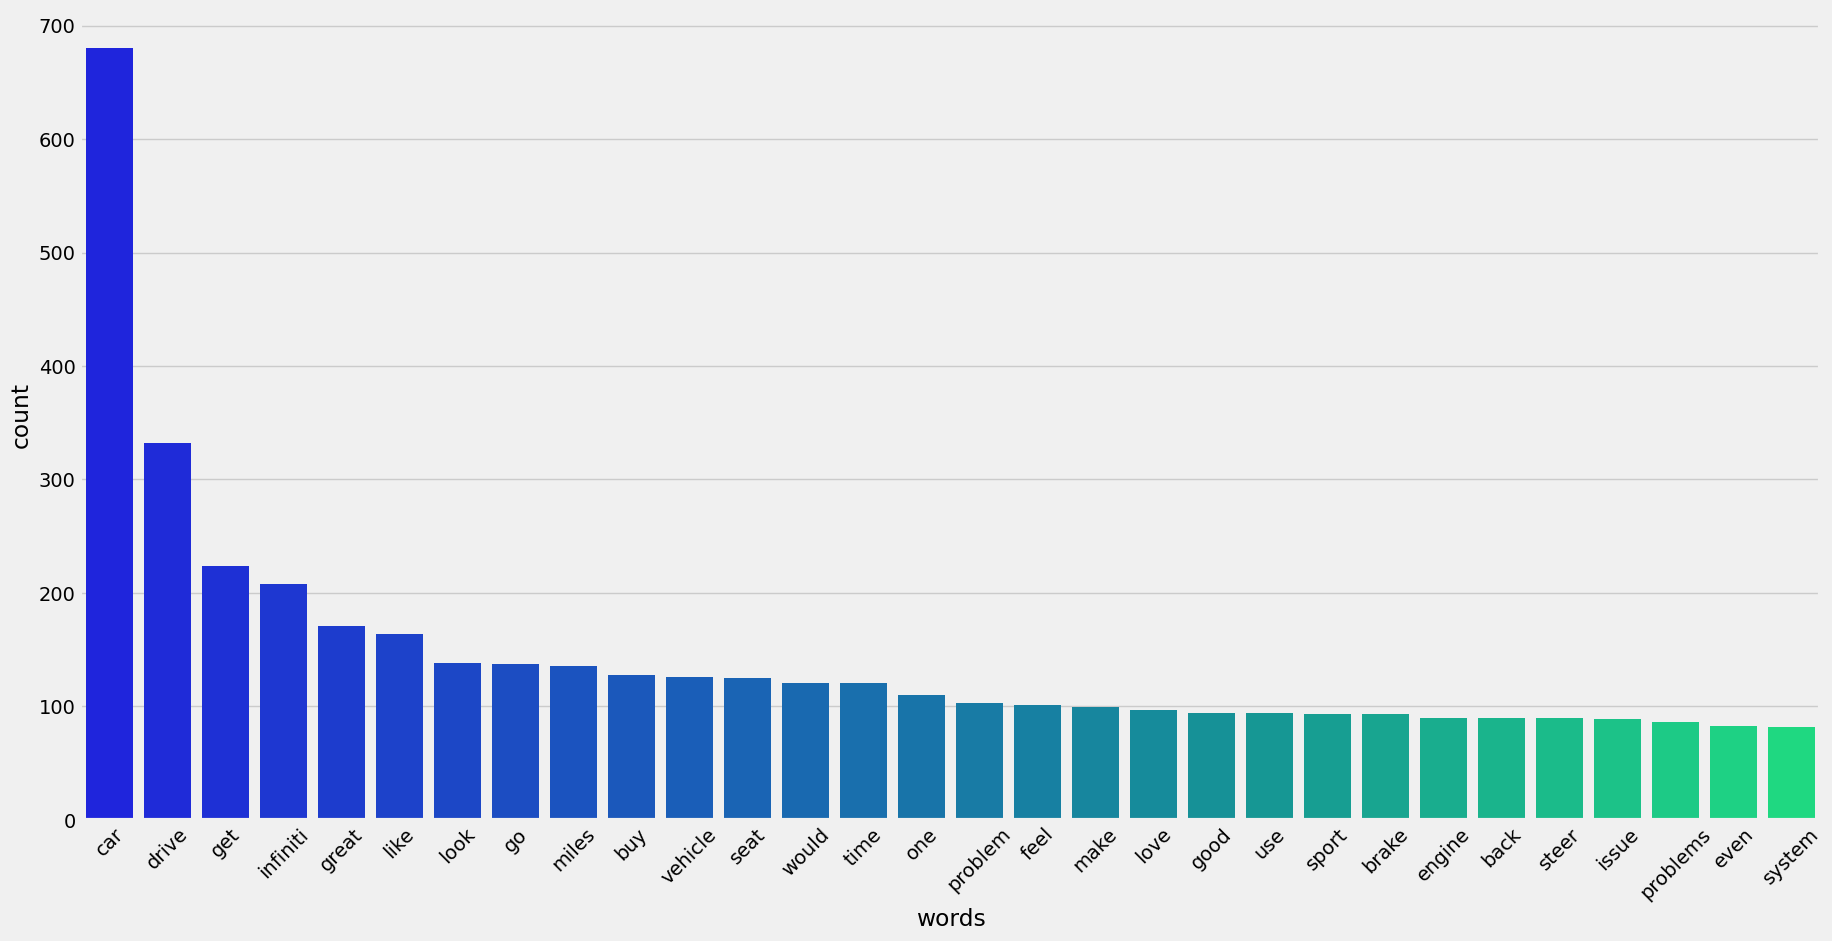

In [ ]:
# Load the list of stopwords
# nltk.download('stopwords')
from collections import Counter
# stopwords_list = stopwords.words('english')
# stopwords_list.extend(['jaguar'])

df_infi_neg['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] for line in df_infi_neg['Review_Clean_List']]
df_infi_neg['Review_Clean'] = list(map(to_string, df_infi_neg['Review_Clean_List']))

# Join all word corpus
review_words_infi = ','.join(list(df_infi_neg['Review_Clean'].values))

# Count and find the 30 most frequent
Counter_infi = Counter(review_words_infi.split())
most_frequent = Counter_infi.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45)

In [ ]:
df_infi_neg

Vehicle_Title  \
0                           2017 INFINITI QX70 SUV 4dr SUV (3.7L 6cyl 7A)   
1                       2017 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
2                           2017 INFINITI QX70 SUV 4dr SUV (3.7L 6cyl 7A)   
3                       2015 INFINITI QX70 SUV 4dr SUV AWD (3.7L 6cyl 7A)   
4                        2004 INFINITI I35 Sedan 4dr Sedan (3.5L 6cyl 4A)   
..                                                                    ...   
321          2010 INFINITI G37 Sedan Sedan x 4dr Sedan AWD (3.7L 6cyl 7A)   
322          2010 INFINITI G37 Sedan Sedan x 4dr Sedan AWD (3.7L 6cyl 7A)   
323          2010 INFINITI G37 Sedan Sedan Sport 4dr Sedan (3.7L 6cyl 6M)   
324        2010 INFINITI G37 Sedan Sedan Journey 4dr Sedan (3.7L 6cyl 7A)   
325  2015 INFINITI Q60 Coupe Coupe Sport Limited 2dr Coupe (3.7L 6cyl 7A)   

     Rating  \
0     5.000   
1     3.000   
2     5.000   
3     3.000   
4     5.000   
..      ...   
321   4.875   
322   2.750   
323   3.500   
324   4.625   
325   4.000   

                                                                         Full Review  \
0    Best deal i've ever gotten I have a good friend who has a 2014 version under...   
1    Meh...not really that impressed I rented this car and spent 900 miles in it ...   
2    2017 QX70 Limited Owned a 2004 FX35, was the best car I've ever owned, had 2...   
3    Great Performance Hampered by Horrible Technology I owned three Infiniti FX ...   
4    Great Car Great car,fun to drive and very \rdependable. The Bridgestone tire...   
..                                                                               ...   
321  Heaven on wheels I looked at BMW 3 series, Audi A4 and VWcc in addition to t...   
322  Transmission Problematic The styling of the car is wonderful.  Have been ask...   
323  Not what i expected 4 months have passed since i have owned this car and it ...   
324  Great Car, But..... I expected more attention to detail and luxury appointme...   
325  It's ALMOST perfect.... I should probably start this off by saying I am a lo...   

    sentiment  \
0         neg   
1         neg   
2         neg   
3         neg   
4         neg   
..        ...   
321       neg   
322       neg   
323       neg   
324       neg   
325       neg   

                                                                   Review_Clean_List  \
0    [best, deal, ever, get, good, friend, 2014, version, old, nomenclature, orig...   
1    [meh, really, impress, rent, car, spend, 900, miles, get, miles, return, 908...   
2    [2017, qx70, limit, 2004, fx35, best, car, ever, 240k, mi, hit, deer, square...   
3    [great, performance, hamper, horrible, technology, three, infiniti, fx, cars...   
4    [great, car, great, car, fun, drive, dependable, bridgestone, tire, real, pr...   
..                                                                               ...   
321  [heaven, wheel, look, bmw, series, audi, a4, vwcc, addition, 2011, infinti, ...   
322  [transmission, problematic, style, car, wonderful, ask, car, strangers, coup...   
323  [expect, months, pass, since, car, start, show, ugly, traits, car, rattle, w...   
324  [great, car, expect, attention, detail, luxury, appointments, inside, listen...   
325  [almost, perfect, probably, start, say, long, time, nissan, fan, previous, c...   

                                                                        Review_Clean  
0    best deal ever get good friend 2014 version old nomenclature originally thin...  
1    meh really impress rent car spend 900 miles get miles return 908 overall exp...  
2    2017 qx70 limit 2004 fx35 best car ever 240k mi hit deer squarely front cent...  
3    great performance hamper horrible technology three infiniti fx cars 2006 200...  
4    great car great car fun drive dependable bridgestone tire real problem hard ...  
..                                                                               ...  
321  heaven wheel look bmw

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model_infi_neg = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model_infi_neg.fit_transform(df_infi_neg['Review_Clean'])

In [ ]:
topic_model_infi_neg.get_topic_info()

Topic  Count                                 Name
0     -1     38           -1_car_drive_infiniti_look
1      0    241             0_car_drive_get_infiniti
2      1     35                1_car_g35_drive_great
3      2     12  2_transmission_car_shift_accelerate

In [ ]:
topic_model_infi_neg.get_topic(0)

[('car', 0.06235540883605542),
 ('drive', 0.04046915270943235),
 ('get', 0.031253094704740046),
 ('infiniti', 0.029098900896173445),
 ('great', 0.027468417656929568),
 ('miles', 0.023584701424991108),
 ('like', 0.023039406915196903),
 ('vehicle', 0.021357130880132403),
 ('go', 0.02111530657664166),
 ('buy', 0.020501255270379746)]

In [ ]:
# Visualize top topic keywords
topic_model_infi_neg.visualize_barchart()

In [ ]:
topic_model_infi_neg.visualize_topics()

/usr/local/lib/python3.9/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: ignored

In [ ]:
topic_model_infi_neg.visualize_hierarchy()

In [ ]:
topic_model_infi_neg.visualize_heatmap()